# Sentiment Analysis of IMDB Movie Reviews

In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

## Importing the training dataset

In [2]:
imdb_data = pd.read_csv('datasets/IMDB Dataset.csv')
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Exploratory data analysis

In [3]:
# Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
# Sentiment count
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

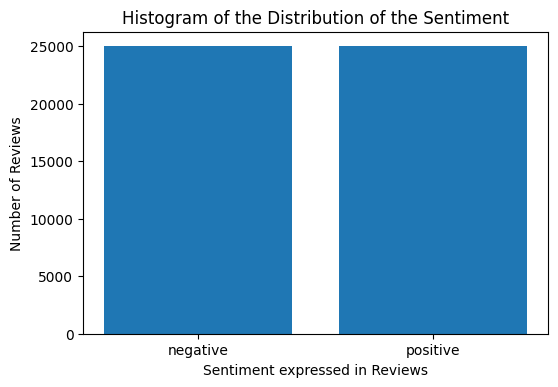

In [5]:
# Plotting above counts
Index = [1, 2]

fig = plt.figure(dpi = 100)

plt.bar(Index, imdb_data['sentiment'].value_counts())
plt.xticks(Index, ['negative', 'positive'])
plt.title('Histogram of the Distribution of the Sentiment')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

fig.savefig('graphs/Histogram.png')

## Data preprocessing and normalization

In [6]:
# Importing necesasry libraries
import nltk
import re, string, unicodedata
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelBinarizer
from bs4 import BeautifulSoup

### Removing html strips and noise from the text

In [7]:
# This function removes the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [8]:
# This function removes the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [9]:
# This function removes the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [10]:
# Applying above function on review column
imdb_data['review'] = imdb_data['review'].apply(denoise_text)

In [11]:
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Removing special characters

In [12]:
# This function removes special characters
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

In [13]:
# Applying above function on review column
imdb_data['review'] = imdb_data['review'].apply(remove_special_characters)

In [14]:
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


### Final preprocessing of the text and its normalization

In [15]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\praab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
stops = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [17]:
# This function pre-process the text with lemmatization, stopwords removal and punctuatuin removal
def text_prep(text):
    no_punct = [char for char in text if char not in string.punctuation]
    text = "".join(no_punct)
    text = [lemma.lemmatize(text, pos = 'v') for text in text.lower().split() if text not in stops] 
    text = " ".join(text)
    return text

In [18]:
# Applying above function on review column
imdb_data['review'] = imdb_data['review'].apply(text_prep)

In [19]:
imdb_data

,review,sentiment
0,one reviewers mention watch 1 oz episode youll...,positive
1,wonderful little production film technique una...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically theres family little boy jake think ...,negative
4,petter matteis love time money visually stun f...,positive
...,...,...
49995,think movie right good job wasnt creative orig...,positive
49996,bad plot bad dialogue bad act idiotic direct a...,negative
49997,catholic teach parochial elementary school nun...,negative
49998,im go disagree previous comment side maltin on...,negative


### Saving the final preprocessed and normalized IMDB dataset as csv file

In [280]:
imdb_data.to_csv('imdb_data.csv', index = False)

## Splitting the normalized reviews text and sentiment in dataset

In [20]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

### Labeling the sentiment text before splitting

In [21]:
# Labeling the sentiment data
lb = LabelBinarizer()

# Transformed sentiment data
sentiment_data = lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [22]:
print(sentiment_data)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


### Splitting the dataset

In [23]:
X_train_reviews, X_test_reviews, y_train_sentiments, y_test_sentiments = train_test_split(
    imdb_data['review'], sentiment_data, test_size = 0.20, random_state = 42)

In [24]:
print(X_train_reviews)
print(y_train_sentiments)

39087    thats keep ask many fight scream match swear g...
30893    watch entire movie could watch entire movie st...
45278    touch love story reminiscent mood love draw he...
16398    latterday fulci schlocker totally abysmal conc...
13653    first firmly believe norwegian movies continua...
                               ...                        
11284    shadow magic recapture joy amazement first mov...
44732    find movie quite enjoyable fairly entertain go...
38158    avoid one terrible movie excite pointless murd...
860      production quite surprise absolutely love obsc...
15795    decent movie although little bite short time p...
Name: review, Length: 40000, dtype: object
[[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [1]]


In [25]:
print(X_test_reviews)
print(y_test_sentiments)

33553    really like summerslam due look arena curtain ...
9427     many television show appeal quite many differe...
199      film quickly get major chase scene ever increa...
12447    jane austen would definitely approve onegwynet...
39489    expectations somewhat high go see movie think ...
                               ...                        
28567    although casper van dien michael rooker genera...
25079    like movie wasnt really sure start watch enjoy...
18707    yes nonsingaporeans cant see whats big deal fi...
15200    far film go likable enough entertain character...
5857     saw anatomy years ago dub friends house dont r...
Name: review, Length: 10000, dtype: object
[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]


## Vectorizing the reviews text for both train and test datasets

In [26]:
# Importing the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Bag of Words model or Count Vectorizer
It is used to convert text documents to numerical vectors or bag of words.

In [27]:
# Count vectorizer for bag of words
cv = CountVectorizer(ngram_range = (1,3))

In [28]:
# Transformed train reviews
cv_train_reviews = cv.fit_transform(X_train_reviews)

# Transformed test reviews
cv_test_reviews = cv.transform(X_test_reviews)

In [29]:
print('BOW_cv_train_reviews:', cv_train_reviews.shape)
print('BOW_cv_test_reviews:', cv_test_reviews.shape)

BOW_cv_train_reviews: (40000, 6984669)
BOW_cv_test_reviews: (10000, 6984669)


### Term Frequency - Inverse Document Frequency (TF-IDF) model
It is used to convert text documents to matrix of tfidf features. It is a numerical statistic that is intended to reflect how important a word is to a text document.

In [30]:
# Tfidf vectorizer
tv = TfidfVectorizer(ngram_range = (1,3))

In [31]:
# Transformed train reviews
tv_train_reviews = tv.fit_transform(X_train_reviews)

# Transformed test reviews
tv_test_reviews = tv.transform(X_test_reviews)

In [32]:
print('Tfidf_train_reviews:', tv_train_reviews.shape)
print('Tfidf_test_reviews:', tv_test_reviews.shape)

Tfidf_train_reviews: (40000, 6984669)
Tfidf_test_reviews: (10000, 6984669)


### Serializing vectorizers and train/test data using pickle and saving it for future use

In [277]:
import pickle
pickle.dump(cv, open('pickle/transform_cv.pkl', 'wb'))
pickle.dump(tv, open('pickle/transform_tv.pkl', 'wb'))
pickle.dump(cv_train_reviews, open('pickle/cv_train_reviews.pkl', 'wb'))
pickle.dump(tv_train_reviews, open('pickle/tv_train_reviews.pkl', 'wb'))
pickle.dump(cv_test_reviews, open('pickle/cv_test_reviews.pkl', 'wb'))
pickle.dump(tv_test_reviews, open('pickle/tv_test_reviews.pkl', 'wb'))
pickle.dump(y_train_sentiments, open('pickle/y_train_sentiments.pkl', 'wb'))
pickle.dump(y_test_sentiments, open('pickle/y_test_sentiments.pkl', 'wb'))

# Modelling the dataset

In [34]:
# Importing the necessary libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, average_precision_score, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import time

In [35]:
# Creating dataframe to tabulate the results of evaluation metrics
ml_default_performance_metrics_df = pd.DataFrame(columns = ['Training-time', 'Accuracy', 'ROC-AUC-score', 'F1-score', 'PR-AUC-score'], index = ['LogisticRegressionBow', 'LogisticRegressionTfidf', 'SGDClassifierBow', 'SGDClassifierTfidf', 'SVCbow', 'SVCtfidf', 'NuSVCbow', 'NuSVCtfidf', 'LinearSVCbow', 'LinearSVCtfidf', 'KNeighborsClassifierBow', 'KNeighborsClassifierTfidf', 'MultinomialNBbow', 'MultinomialNBtfidf', 'BernoulliNBbow', 'BernoulliNBtfidf', 'DecisionTreeClassifierBow', 'DecisionTreeClassifierTfidf', 'AdaBoostClassifierBow', 'AdaBoostClassifierTfidf', 'ExtraTreesClassifierBow', 'ExtraTreesClassifierTfidf', 'GradientBoostingClassifierBow', 'GradientBoostingClassifierTfidf', 'RandomForestClassifierBow', 'RandomForestClassifierTfidf', 'LinearDiscriminantAnalysisBow', 'LinearDiscriminantAnalysisTfidf', 'QuadraticDiscriminantAnalysisBow', 'QuadraticDiscriminantAnalysisTfidf'])

## 1. Logistic regression model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model

In [36]:
# Training the Logistic Regression
lr = LogisticRegression(penalty = 'l2', max_iter = 500, C = 1, random_state = 42)

start_time_lr_bow = time.time()

# Fitting the model for Bag of words
lr_bow = lr.fit(cv_train_reviews, y_train_sentiments)
print(lr_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_lr_bow)

start_time_lr_tfidf = time.time()

# Fitting the model for Tfidf features
lr_tfidf = lr.fit(tv_train_reviews, y_train_sentiments)
print(lr_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
Training-time for Bag of Words in seconds:  207.49076986312866
LogisticRegression(C=1, max_iter=500, random_state=42)
Training-time for TF-IDF features in seconds:  89.14664840698242


## Linear Regression model performance on test data

In [37]:
# Predicting the model for Bag of Words
lr_bow_predictions = lr.predict(cv_test_reviews)
print(lr_bow_predictions)

[0 1 0 ... 1 0 1]


In [38]:
# Predicting the model for Tfidf features
lr_tfidf_predictions = lr.predict(tv_test_reviews)
print(lr_tfidf_predictions)

[0 1 0 ... 1 0 1]


### Accuracy of the Logistic Regression model

In [39]:
# Accuracy score for Bag of Words
lr_bow_score = accuracy_score(y_test_sentiments, lr_bow_predictions)
print("lr_bow_score:", lr_bow_score)

lr_bow_score: 0.8583


In [40]:
# Accuracy score for tfidf features
lr_tfidf_score = accuracy_score(y_test_sentiments, lr_tfidf_predictions)
print("lr_tfidf_score:", lr_tfidf_score)

lr_tfidf_score: 0.8852


### ROC AUC

lr_bow_roc_auc_score: 0.8582983988745876
lr_tfidf_roc_auc_score: 0.8850900488785738


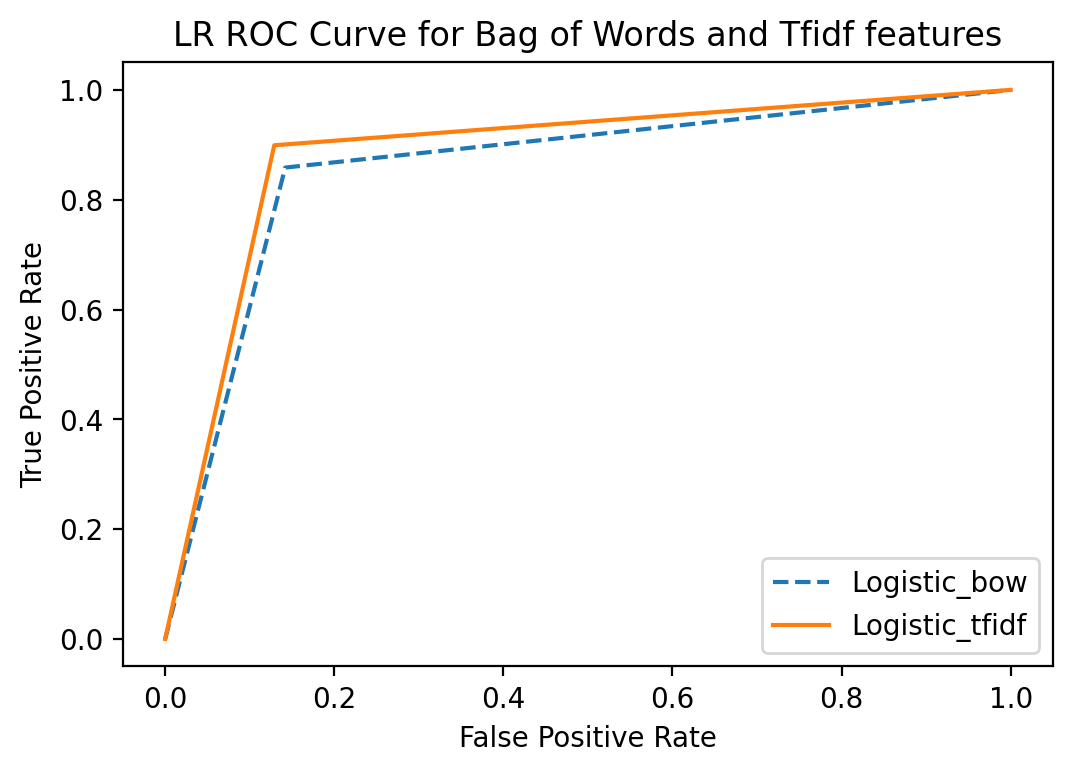

In [41]:
# ROC AUC score for Bag of Words and Tfidf features
lr_bow_roc_auc_score = roc_auc_score(y_test_sentiments, lr_bow_predictions)
lr_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, lr_tfidf_predictions)
print("lr_bow_roc_auc_score:", lr_bow_roc_auc_score)
print("lr_tfidf_roc_auc_score:", lr_tfidf_roc_auc_score)

# Calculating ROC curve
lr_fpr_bow, lr_tpr_bow, _ = roc_curve(y_test_sentiments, lr_bow_predictions)
lr_fpr_tfidf, lr_tpr_tfidf, _ = roc_curve(y_test_sentiments, lr_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(lr_fpr_bow, lr_tpr_bow, linestyle = '--', label = 'Logistic_bow')
plt.plot(lr_fpr_tfidf, lr_tpr_tfidf, linestyle = '-', label = 'Logistic_tfidf')
plt.title('LR ROC Curve for Bag of Words and Tfidf features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/lr_ROC.png')

### Precision, Recall and F1-score of Logistic Regression model

In [42]:
# For Bag of Words
lr_bow_precision_score = precision_score(y_test_sentiments, lr_bow_predictions, average = 'macro')
lr_bow_recall_score = recall_score(y_test_sentiments, lr_bow_predictions, average = 'macro')
lr_bow_f1_score = f1_score(y_test_sentiments, lr_bow_predictions, average = 'macro')

print("lr_bow_precision_score:", lr_bow_precision_score)
print("lr_bow_recall_score:", lr_bow_recall_score)
print("lr_bow_f1_score:", lr_bow_f1_score)

lr_bow_precision_score: 0.8582894984219431
lr_bow_recall_score: 0.8582983988745875
lr_bow_f1_score: 0.8582932533417915


In [43]:
# For Tfidf features
lr_tfidf_precision_score = precision_score(y_test_sentiments, lr_tfidf_predictions, average = 'macro')
lr_tfidf_recall_score = recall_score(y_test_sentiments, lr_tfidf_predictions, average = 'macro')
lr_tfidf_f1_score = f1_score(y_test_sentiments, lr_tfidf_predictions, average = 'macro')

print("lr_tfidf_precision_score:", lr_tfidf_precision_score)
print("lr_tfidf_recall_score:", lr_tfidf_recall_score)
print("lr_tfidf_f1_score:", lr_tfidf_f1_score)

lr_tfidf_precision_score: 0.8855175367316628
lr_tfidf_recall_score: 0.8850900488785738
lr_tfidf_f1_score: 0.8851493508637309


### Printing the classification report of Logistic Regression model

In [44]:
# Classification report for Bag of Words 
lr_bow_report = classification_report(y_test_sentiments, lr_bow_predictions, target_names = ['Positive', 'Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.86      0.86      0.86      4961
    Negative       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [45]:
# Classification report for Tfidf features
lr_tfidf_report = classification_report(y_test_sentiments, lr_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.89      0.87      0.88      4961
    Negative       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Plotting PR AUC curve

lr_bow_pr_auc_score: 0.8949217163973886
lr_tfidf_pr_auc_score: 0.9131095917363805


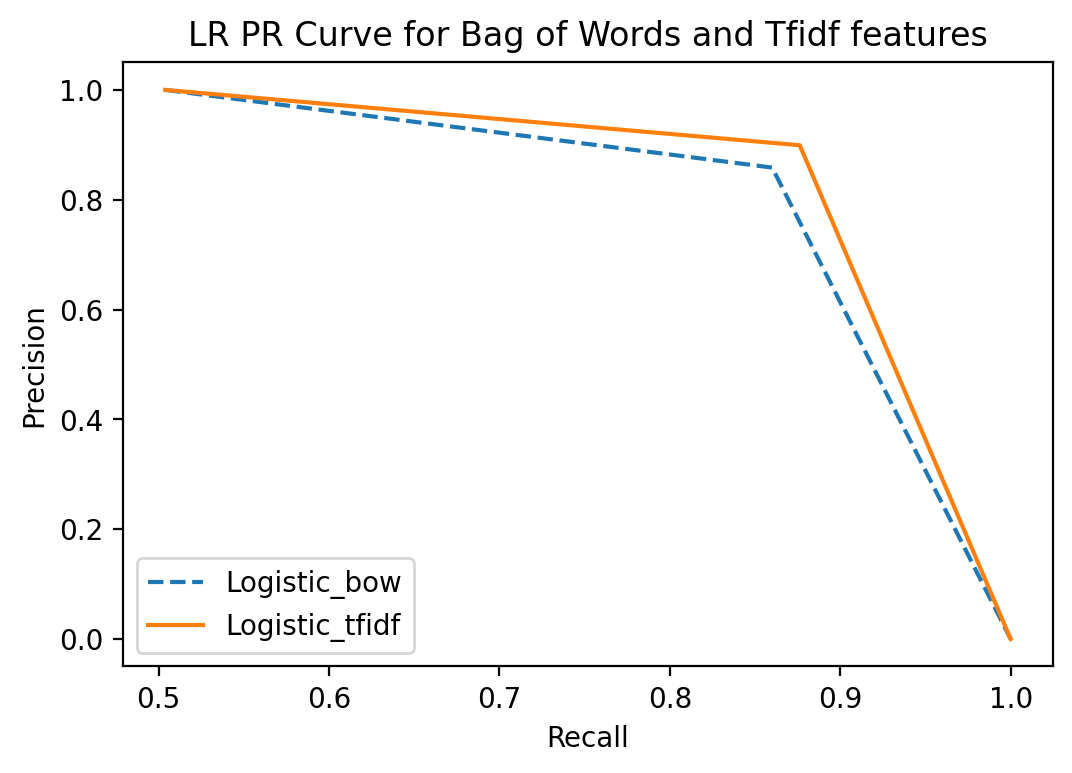

In [46]:
# Calculating PR curve for Bag of Words and Tfidf features
lr_precision_bow, lr_recall_bow, _ = precision_recall_curve(y_test_sentiments, lr_bow_predictions)
lr_precision_tfidf, lr_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, lr_tfidf_predictions)

# Calculating AUC score
lr_bow_pr_auc_score = auc(lr_recall_bow, lr_precision_bow)
lr_tfidf_pr_auc_score = auc(lr_recall_tfidf, lr_precision_tfidf)
print("lr_bow_pr_auc_score:", lr_bow_pr_auc_score)
print("lr_tfidf_pr_auc_score:", lr_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(lr_precision_bow, lr_recall_bow, linestyle = '--', label = 'Logistic_bow')
plt.plot(lr_precision_tfidf, lr_recall_tfidf, linestyle = '-', label = 'Logistic_tfidf')
plt.title('LR PR Curve for Bag of Words and Tfidf features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/lr_PR.png')

### Confusion Matrix for Logistic Regression model 

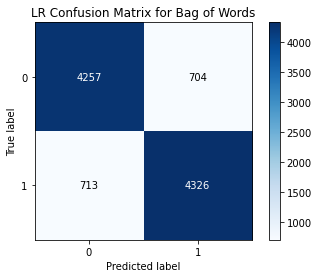

In [47]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, lr_bow_predictions)
plt.title('LR Confusion Matrix for Bag of Words')
plt.savefig('graphs/lr_confusion_matrix_bow.png')

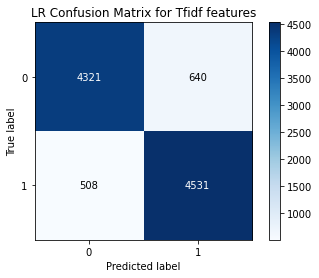

In [48]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, lr_tfidf_predictions)
plt.title('LR Confusion Matrix for Tfidf features')
plt.savefig('graphs/lr_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [49]:
# For Bag of Words
ml_default_performance_metrics_df.loc['LogisticRegressionBow']['Training-time'] = time.time() - start_time_lr_bow
ml_default_performance_metrics_df.loc['LogisticRegressionBow']['Accuracy'] = lr_bow_score
ml_default_performance_metrics_df.loc['LogisticRegressionBow']['ROC-AUC-score'] = lr_bow_roc_auc_score
ml_default_performance_metrics_df.loc['LogisticRegressionBow']['F1-score'] = lr_bow_f1_score
ml_default_performance_metrics_df.loc['LogisticRegressionBow']['PR-AUC-score'] = lr_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['LogisticRegressionTfidf']['Training-time'] = time.time() - start_time_lr_tfidf
ml_default_performance_metrics_df.loc['LogisticRegressionTfidf']['Accuracy'] = lr_tfidf_score
ml_default_performance_metrics_df.loc['LogisticRegressionTfidf']['ROC-AUC-score'] = lr_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['LogisticRegressionTfidf']['F1-score'] = lr_tfidf_f1_score
ml_default_performance_metrics_df.loc['LogisticRegressionTfidf']['PR-AUC-score'] = lr_tfidf_pr_auc_score

## 2. Stochastic Gradient Descent Classifier model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model 

In [50]:
# Training the SGDC
sgdc = SGDClassifier(loss = 'hinge', max_iter = 500, random_state = 42)

start_time_sgdc_bow = time.time()

# Fitting the SGDC for Bag of Words
sgdc_bow = sgdc.fit(cv_train_reviews, y_train_sentiments)
print(sgdc_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_sgdc_bow)

start_time_sgdc_tfidf = time.time()

# Fitting the SGDC for Tfidf features
sgdc_tfidf = sgdc.fit(tv_train_reviews, y_train_sentiments)
print(sgdc_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_sgdc_tfidf)

SGDClassifier(max_iter=500, random_state=42)
Training-time for Bag of Words in seconds:  1.7662181854248047
SGDClassifier(max_iter=500, random_state=42)
Training-time for TF-IDF features in seconds:  1.9637506008148193


## Stochastic Gradient Descent model performance on test data

In [51]:
# Predicting the model for Bag of Words
sgdc_bow_predictions = sgdc.predict(cv_test_reviews)
print(sgdc_bow_predictions)

[0 1 0 ... 1 0 1]


In [52]:
# Predicting the model for Tfidf features
sgdc_tfidf_predictions = sgdc.predict(tv_test_reviews)
print(sgdc_tfidf_predictions)

[0 1 0 ... 1 0 1]


### Accuracy of the Stochastic Gradient Descent model

In [53]:
# Accuracy score for Bag of Words
sgdc_bow_score = accuracy_score(y_test_sentiments, sgdc_bow_predictions)
print("sgdc_bow_score:", sgdc_bow_score)

sgdc_bow_score: 0.8595


In [54]:
# Accuracy score for Tfidf features
sgdc_tfidf_score = accuracy_score(y_test_sentiments, sgdc_tfidf_predictions)
print("sgdc_tfidf_score:", sgdc_tfidf_score)

sgdc_tfidf_score: 0.8848


### ROC AUC 

sgdc_bow_roc_auc_score: 0.8596654020430604
sgdc_tfidf_roc_auc_score: 0.8846666231173503


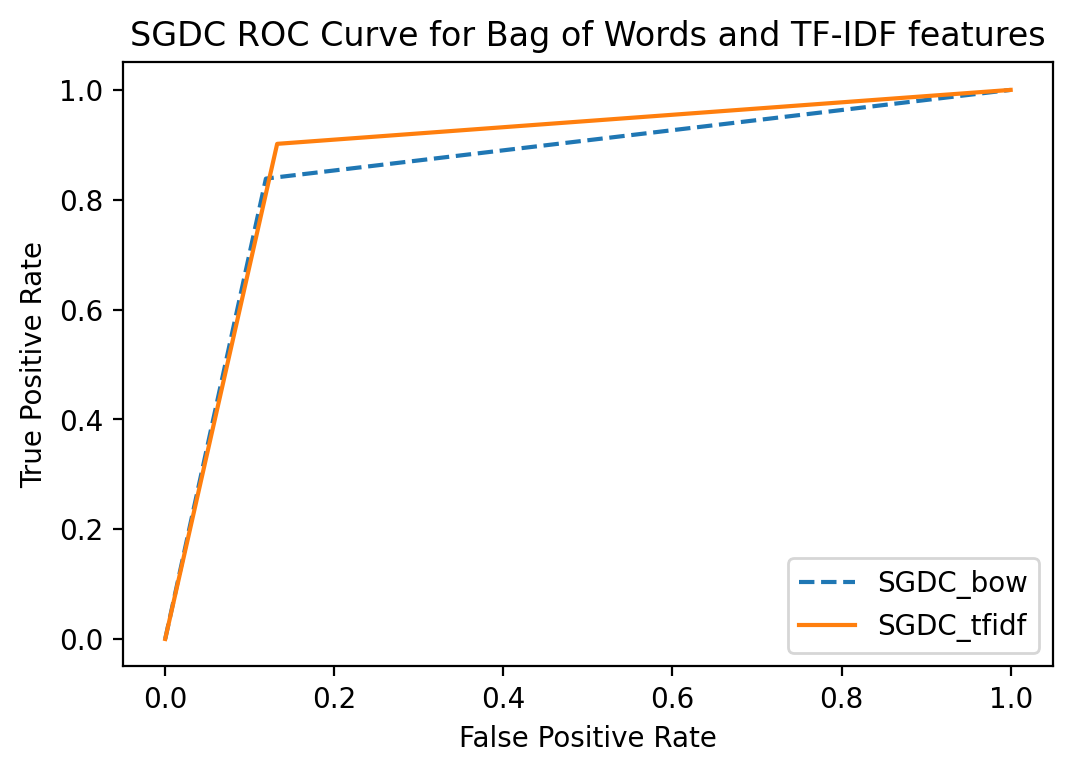

In [55]:
# ROC AUC score for Bag of Words and Tfidf features
sgdc_bow_roc_auc_score = roc_auc_score(y_test_sentiments, sgdc_bow_predictions)
sgdc_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, sgdc_tfidf_predictions)
print("sgdc_bow_roc_auc_score:", sgdc_bow_roc_auc_score)
print("sgdc_tfidf_roc_auc_score:", sgdc_tfidf_roc_auc_score)

# Calculating ROC curve
sgdc_fpr_bow, sgdc_tpr_bow, _ = roc_curve(y_test_sentiments, sgdc_bow_predictions)
sgdc_fpr_tfidf, sgdc_tpr_tfidf, _ = roc_curve(y_test_sentiments, sgdc_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(sgdc_fpr_bow, sgdc_tpr_bow, linestyle = '--', label = 'SGDC_bow')
plt.plot(sgdc_fpr_tfidf, sgdc_tpr_tfidf, linestyle = '-', label = 'SGDC_tfidf')
plt.title('SGDC ROC Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/sgdc_ROC.png')

### Precision, Recall and F1-score of Stochastic Gradient Descent model

In [56]:
# For Bag of Words
sgdc_bow_precision_score = precision_score(y_test_sentiments, sgdc_bow_predictions, average = 'macro')
sgdc_bow_recall_score = recall_score(y_test_sentiments, sgdc_bow_predictions, average = 'macro')
sgdc_bow_f1_score = f1_score(y_test_sentiments, sgdc_bow_predictions, average = 'macro')

print("sgdc_bow_precision_score:", sgdc_bow_precision_score)
print("sgdc_bow_recall_score:", sgdc_bow_recall_score)
print("sgdc_bow_f1_score:", sgdc_bow_f1_score)

sgdc_bow_precision_score: 0.8601312241089374
sgdc_bow_recall_score: 0.8596654020430603
sgdc_bow_f1_score: 0.8594704536628825


In [57]:
# For Tfidf features
sgdc_tfidf_precision_score = precision_score(y_test_sentiments, sgdc_tfidf_predictions, average = 'macro')
sgdc_tfidf_recall_score = recall_score(y_test_sentiments, sgdc_tfidf_predictions, average = 'macro')
sgdc_tfidf_f1_score = f1_score(y_test_sentiments, sgdc_tfidf_predictions, average = 'macro')

print("sgdc_tfidf_precision_score:", sgdc_tfidf_precision_score)
print("sgdc_tfidf_recall_score:", sgdc_tfidf_recall_score)
print("sgdc_tfidf_f1_score:", sgdc_tfidf_f1_score)

sgdc_tfidf_precision_score: 0.8852658249838068
sgdc_tfidf_recall_score: 0.8846666231173506
sgdc_tfidf_f1_score: 0.884733606557377


### Printing the classification report of Stochastic Gradient Descent model 

In [58]:
# Classification report for Bag of Words 
sgdc_bow_report = classification_report(y_test_sentiments, sgdc_bow_predictions, target_names = ['Positive', 'Negative'])
print(sgdc_bow_report)

              precision    recall  f1-score   support

    Positive       0.84      0.88      0.86      4961
    Negative       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [59]:
# Classification report for Tfidf features
sgdc_tfidf_report = classification_report(y_test_sentiments, sgdc_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(sgdc_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.90      0.87      0.88      4961
    Negative       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



### PR AUC

sgdc_bow_pr_auc_score: 0.8985720325316352
sgdc_tfidf_pr_auc_score: 0.9124721811382464


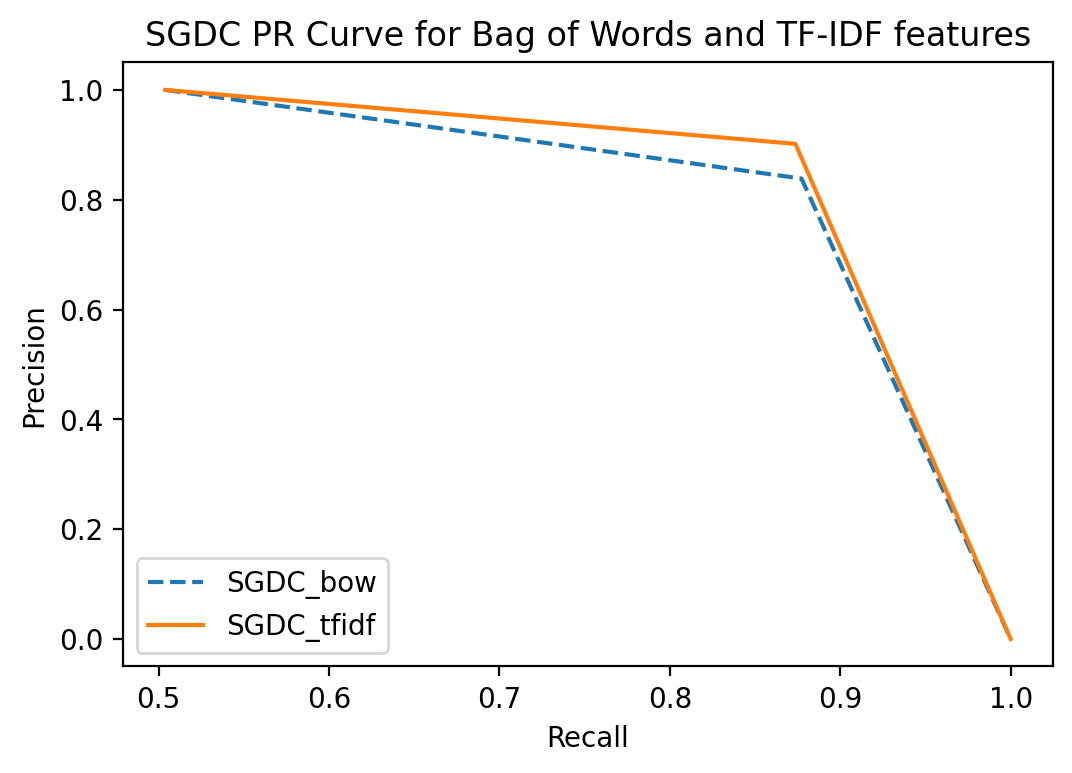

In [60]:
# Calculating PR curve for Bag of Words
sgdc_precision_bow, sgdc_recall_bow, _ = precision_recall_curve(y_test_sentiments, sgdc_bow_predictions)
sgdc_precision_tfidf, sgdc_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, sgdc_tfidf_predictions)

# Calculating AUC score
sgdc_bow_pr_auc_score = auc(sgdc_recall_bow, sgdc_precision_bow)
sgdc_tfidf_pr_auc_score = auc(sgdc_recall_tfidf, sgdc_precision_tfidf)
print("sgdc_bow_pr_auc_score:", sgdc_bow_pr_auc_score)
print("sgdc_tfidf_pr_auc_score:", sgdc_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(sgdc_precision_bow, sgdc_recall_bow, linestyle = '--', label = 'SGDC_bow')
plt.plot(sgdc_precision_tfidf, sgdc_recall_tfidf, linestyle = '-', label = 'SGDC_tfidf')
plt.title('SGDC PR Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/sgdc_PR.png')

### Confusion Matrix for Stochastic Gradient Descent model

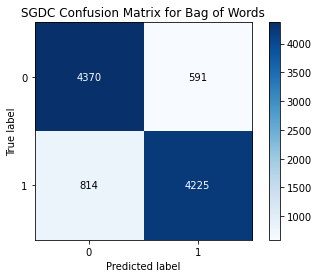

In [61]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, sgdc_bow_predictions)
plt.title('SGDC Confusion Matrix for Bag of Words')
plt.savefig('graphs/sgdc_confusion_matrix_bow.png')

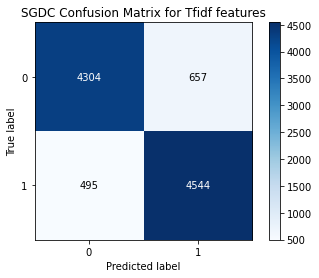

In [62]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, sgdc_tfidf_predictions)
plt.title('SGDC Confusion Matrix for Tfidf features')
plt.savefig('graphs/sgdc_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [63]:
# For Bag of Words
ml_default_performance_metrics_df.loc['SGDClassifierBow']['Training-time'] = time.time() - start_time_sgdc_bow
ml_default_performance_metrics_df.loc['SGDClassifierBow']['Accuracy'] = sgdc_bow_score
ml_default_performance_metrics_df.loc['SGDClassifierBow']['ROC-AUC-score'] = sgdc_bow_roc_auc_score
ml_default_performance_metrics_df.loc['SGDClassifierBow']['F1-score'] = sgdc_bow_f1_score
ml_default_performance_metrics_df.loc['SGDClassifierBow']['PR-AUC-score'] = sgdc_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['SGDClassifierTfidf']['Training-time'] = time.time() - start_time_sgdc_tfidf
ml_default_performance_metrics_df.loc['SGDClassifierTfidf']['Accuracy'] = sgdc_tfidf_score
ml_default_performance_metrics_df.loc['SGDClassifierTfidf']['ROC-AUC-score'] = sgdc_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['SGDClassifierTfidf']['F1-score'] = sgdc_tfidf_f1_score
ml_default_performance_metrics_df.loc['SGDClassifierTfidf']['PR-AUC-score'] = sgdc_tfidf_pr_auc_score

## 3. Support Vector Machine Classifier model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model 

In [64]:
# Training the SVC
svc = SVC(max_iter = 500, random_state = 42)

start_time_svc_bow = time.time()

# Fitting the SVC for Bag of Words
svc_bow = svc.fit(cv_train_reviews, y_train_sentiments)
print(svc_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_svc_bow)

start_time_svc_tfidf = time.time()

# Fitting the SVC for Tfidf features
svc_tfidf = svc.fit(tv_train_reviews, y_train_sentiments)
print(svc_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_svc_tfidf)

SVC(max_iter=500, random_state=42)
Training-time for Bag of Words in seconds:  41.61041831970215
SVC(max_iter=500, random_state=42)
Training-time for TF-IDF features in seconds:  81.96014261245728


## Support Vector Machine Classifier model performance on test data

In [65]:
# Predicting the model for Bag of Words
svc_bow_predictions = svc.predict(cv_test_reviews)
print(svc_bow_predictions)

[0 0 0 ... 0 0 0]


In [66]:
# Predicting the model for Tfidf features
svc_tfidf_predictions = svc.predict(tv_test_reviews)
print(svc_tfidf_predictions)

[1 1 0 ... 0 1 1]


### Accuracy of the Support Vector Machine Classifier model

In [67]:
# Accuracy score for Bag of Words
svc_bow_score = accuracy_score(y_test_sentiments, svc_bow_predictions)
print("svc_bow_score:", svc_bow_score)

svc_bow_score: 0.4961


In [68]:
# Accuracy score for Tfidf features
svc_tfidf_score = accuracy_score(y_test_sentiments, svc_tfidf_predictions)
print("svc_tfidf_score:", svc_tfidf_score)

svc_tfidf_score: 0.7522


### ROC AUC 

svc_bow_roc_auc_score: 0.5
svc_tfidf_roc_auc_score: 0.7520413941984231


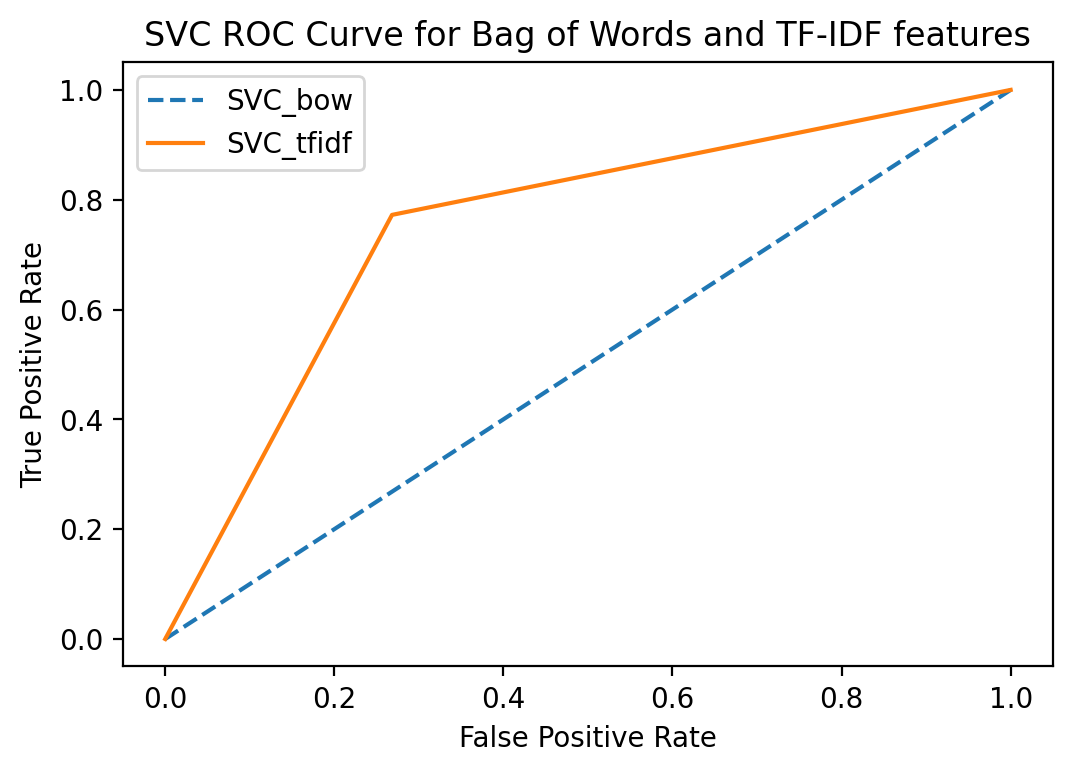

In [69]:
# ROC AUC score for Bag of Words and Tfidf features
svc_bow_roc_auc_score = roc_auc_score(y_test_sentiments, svc_bow_predictions)
svc_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, svc_tfidf_predictions)
print("svc_bow_roc_auc_score:", svc_bow_roc_auc_score)
print("svc_tfidf_roc_auc_score:", svc_tfidf_roc_auc_score)

# Calculating ROC curve
svc_fpr_bow, svc_tpr_bow, _ = roc_curve(y_test_sentiments, svc_bow_predictions)
svc_fpr_tfidf, svc_tpr_tfidf, _ = roc_curve(y_test_sentiments, svc_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(svc_fpr_bow, svc_tpr_bow, linestyle = '--', label = 'SVC_bow')
plt.plot(svc_fpr_tfidf, svc_tpr_tfidf, linestyle = '-', label = 'SVC_tfidf')
plt.title('SVC ROC Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/svc_ROC.png')

### Precision, Recall and F1-score of Support Vector Machine Classifier model

In [70]:
# For Bag of Words
svc_bow_precision_score = precision_score(y_test_sentiments, svc_bow_predictions, average = 'macro')
svc_bow_recall_score = recall_score(y_test_sentiments, svc_bow_predictions, average = 'macro')
svc_bow_f1_score = f1_score(y_test_sentiments, svc_bow_predictions, average = 'macro')

print("svc_bow_precision_score:", svc_bow_precision_score)
print("svc_bow_recall_score:", svc_bow_recall_score)
print("svc_bow_f1_score:", svc_bow_f1_score)

svc_bow_precision_score: 0.24805
svc_bow_recall_score: 0.5
svc_bow_f1_score: 0.3315954815854555


In [71]:
# For Tfidf features
svc_tfidf_precision_score = precision_score(y_test_sentiments, svc_tfidf_predictions, average = 'macro')
svc_tfidf_recall_score = recall_score(y_test_sentiments, svc_tfidf_predictions, average = 'macro')
svc_tfidf_f1_score = f1_score(y_test_sentiments, svc_tfidf_predictions, average = 'macro')

print("svc_tfidf_precision_score:", svc_tfidf_precision_score)
print("svc_tfidf_recall_score:", svc_tfidf_recall_score)
print("svc_tfidf_f1_score:", svc_tfidf_f1_score)

svc_tfidf_precision_score: 0.75252837935107
svc_tfidf_recall_score: 0.752041394198423
svc_tfidf_f1_score: 0.7520297833244652


### Printing the classification report of Support Vector Classifier model 

In [72]:
# Classification report for Bag of Words 
svc_bow_report = classification_report(y_test_sentiments, svc_bow_predictions, target_names = ['Positive', 'Negative'])
print(svc_bow_report)

              precision    recall  f1-score   support

    Positive       0.50      1.00      0.66      4961
    Negative       0.00      0.00      0.00      5039

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



In [73]:
# Classification report for Tfidf features
svc_tfidf_report = classification_report(y_test_sentiments, svc_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(svc_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.76      0.73      0.75      4961
    Negative       0.75      0.77      0.76      5039

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



### PR AUC

svc_bow_pr_auc_score: 0.75195
svc_tfidf_pr_auc_score: 0.8161205424778439


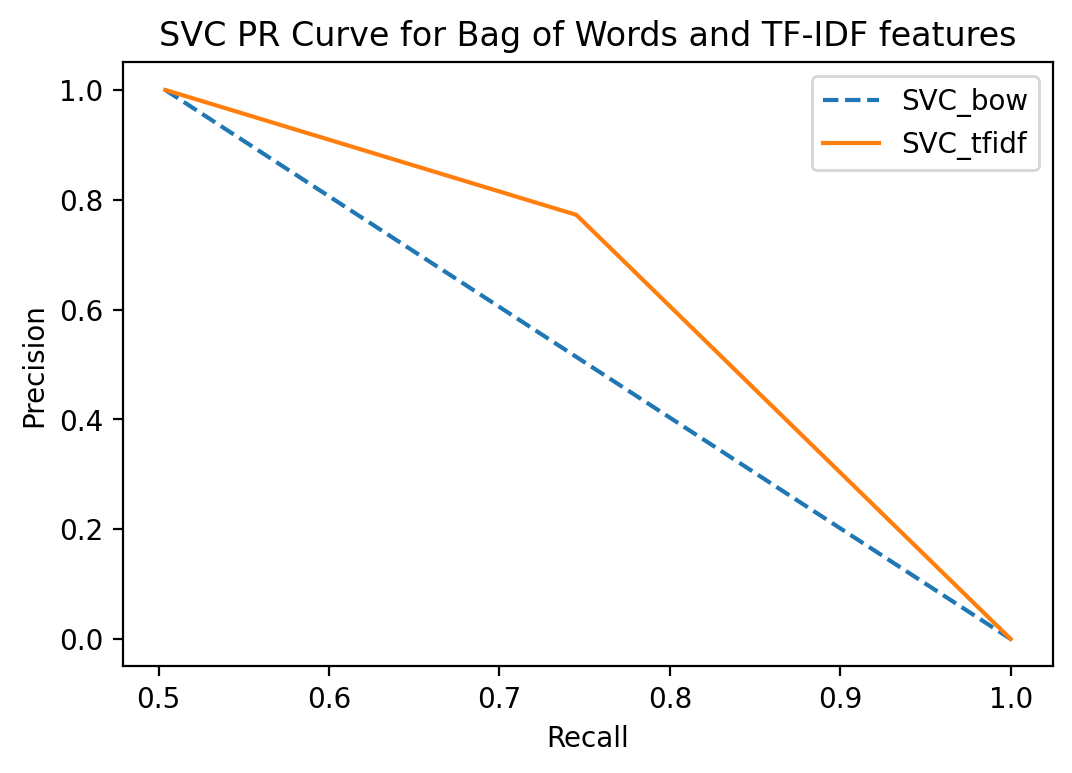

In [74]:
# Calculating PR curve for Bag of Words and Tfidf features
svc_precision_bow, svc_recall_bow, _ = precision_recall_curve(y_test_sentiments, svc_bow_predictions)
svc_precision_tfidf, svc_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, svc_tfidf_predictions)

# Calculating AUC score
svc_bow_pr_auc_score = auc(svc_recall_bow, svc_precision_bow)
svc_tfidf_pr_auc_score = auc(svc_recall_tfidf, svc_precision_tfidf)
print("svc_bow_pr_auc_score:", svc_bow_pr_auc_score)
print("svc_tfidf_pr_auc_score:", svc_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(svc_precision_bow, svc_recall_bow, linestyle = '--', label = 'SVC_bow')
plt.plot(svc_precision_tfidf, svc_recall_tfidf, linestyle = '-', label = 'SVC_tfidf')
plt.title('SVC PR Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/svc_PR.png')

### Confusion Matrix for Support Vector Classifier model

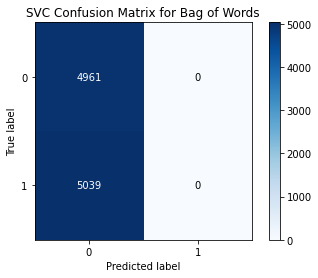

In [75]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, svc_bow_predictions)
plt.title('SVC Confusion Matrix for Bag of Words')
plt.savefig('graphs/svc_confusion_matrix_bow.png')

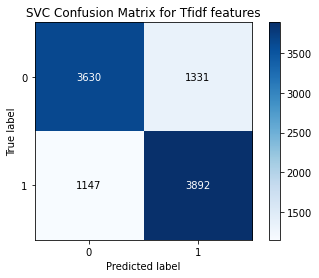

In [76]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, svc_tfidf_predictions)
plt.title('SVC Confusion Matrix for Tfidf features')
plt.savefig('graphs/svc_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [77]:
# For Bag of Words
ml_default_performance_metrics_df.loc['SVCbow']['Training-time'] = time.time() - start_time_svc_bow
ml_default_performance_metrics_df.loc['SVCbow']['Accuracy'] = svc_bow_score
ml_default_performance_metrics_df.loc['SVCbow']['ROC-AUC-score'] = svc_bow_roc_auc_score
ml_default_performance_metrics_df.loc['SVCbow']['F1-score'] = svc_bow_f1_score
ml_default_performance_metrics_df.loc['SVCbow']['PR-AUC-score'] = lr_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['SVCtfidf']['Training-time'] = time.time() - start_time_svc_tfidf
ml_default_performance_metrics_df.loc['SVCtfidf']['Accuracy'] = svc_tfidf_score
ml_default_performance_metrics_df.loc['SVCtfidf']['ROC-AUC-score'] = svc_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['SVCtfidf']['F1-score'] = svc_tfidf_f1_score
ml_default_performance_metrics_df.loc['SVCtfidf']['PR-AUC-score'] = svc_tfidf_pr_auc_score

## 3. Nu-Support Vector Machine Classifier model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model 

In [78]:
# Training the NuSVM Classifier
nusvc = NuSVC(max_iter = 500, random_state = 42)

start_time_nusvc_bow = time.time()

# Fitting the NuSVC for Bag of Words
nusvc_bow = nusvc.fit(cv_train_reviews, y_train_sentiments)
print(nusvc_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_nusvc_bow)

start_time_nusvc_tfidf = time.time()

# Fitting the NuSVC for Tfidf features
nusvc_tfidf = nusvc.fit(tv_train_reviews, y_train_sentiments)
print(nusvc_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_nusvc_tfidf)

NuSVC(max_iter=500, random_state=42)
Training-time for Bag of Words in seconds:  1584.00137925148
NuSVC(max_iter=500, random_state=42)
Training-time for TF-IDF features in seconds:  1599.6749277114868


## Nu-Support Vector Classifier model performance on test data

In [79]:
# Predicting the model for Bag of Words
nusvc_bow_predictions = nusvc.predict(cv_test_reviews)
print(nusvc_bow_predictions)

[1 1 1 ... 1 1 1]


In [80]:
# Predicting the model for Tfidf features
nusvc_tfidf_predictions = nusvc.predict(tv_test_reviews)
print(nusvc_tfidf_predictions)

[0 1 0 ... 1 0 1]


## Nu-Support Vector Classifier model performance on test data

### Accuracy of the Nu-Support Vector Classifier model

In [81]:
# Accuracy score for Bag of Words
nusvc_bow_score = accuracy_score(y_test_sentiments, nusvc_bow_predictions)
print("nusvc_bow_score:", nusvc_bow_score)

nusvc_bow_score: 0.5039


In [82]:
# Accuracy score for Tfidf features
nusvc_tfidf_score = accuracy_score(y_test_sentiments, nusvc_tfidf_predictions)
print("nusvc_tfidf_score:", nusvc_tfidf_score)

nusvc_tfidf_score: 0.8495


### ROC AUC

nusvc_bow_roc_auc_score: 0.5
nusvc_tfidf_roc_auc_score: 0.8493122121549875


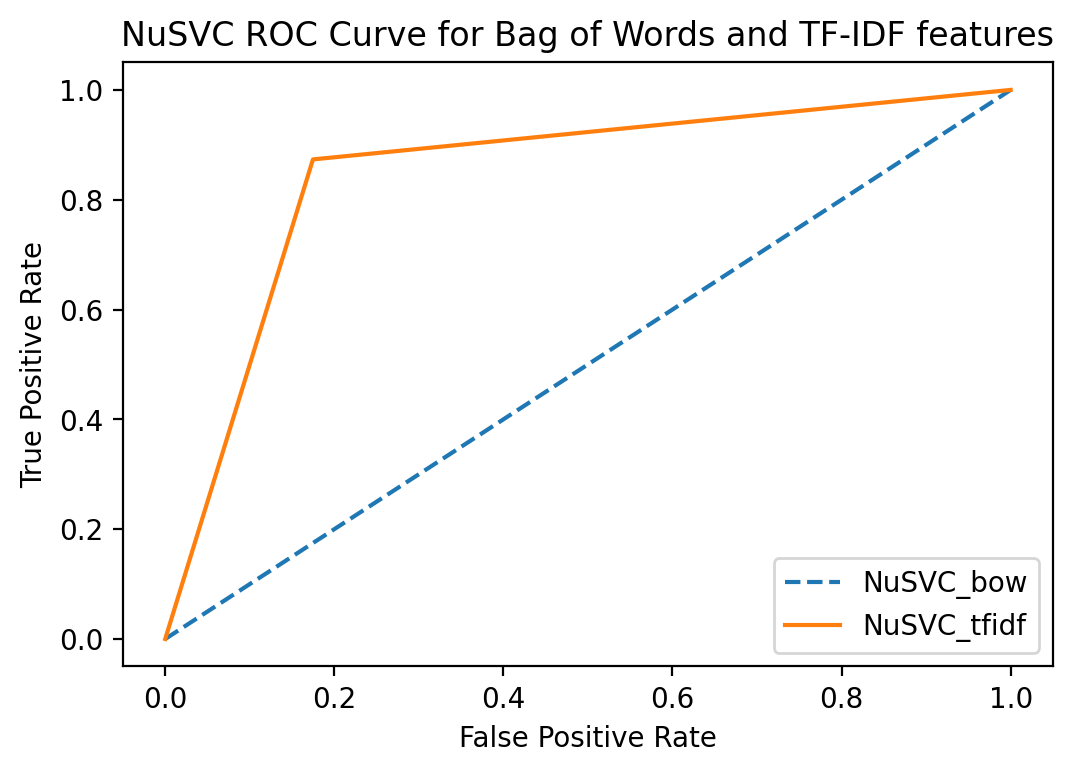

In [83]:
# ROC AUC score for Bag of Words and Tfidf features
nusvc_bow_roc_auc_score = roc_auc_score(y_test_sentiments, nusvc_bow_predictions)
nusvc_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, nusvc_tfidf_predictions)
print("nusvc_bow_roc_auc_score:", nusvc_bow_roc_auc_score)
print("nusvc_tfidf_roc_auc_score:", nusvc_tfidf_roc_auc_score)

# Calculating ROC curve
nusvc_fpr_bow, nusvc_tpr_bow, _ = roc_curve(y_test_sentiments, nusvc_bow_predictions)
nusvc_fpr_tfidf, nusvc_tpr_tfidf, _ = roc_curve(y_test_sentiments, nusvc_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(nusvc_fpr_bow, nusvc_tpr_bow, linestyle = '--', label = 'NuSVC_bow')
plt.plot(nusvc_fpr_tfidf, nusvc_tpr_tfidf, linestyle = '-', label = 'NuSVC_tfidf')
plt.title('NuSVC ROC Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/nusvc_ROC.png')

### Precision, Recall and F1-score of Nu-Support Vector Machine Classifier model

In [84]:
# For Bag of Words
nusvc_bow_precision_score = precision_score(y_test_sentiments, nusvc_bow_predictions, average = 'macro')
nusvc_bow_recall_score = recall_score(y_test_sentiments, nusvc_bow_predictions, average = 'macro')
nusvc_bow_f1_score = f1_score(y_test_sentiments, nusvc_bow_predictions, average = 'macro')

print("nusvc_bow_precision_score:", nusvc_bow_precision_score)
print("nusvc_bow_recall_score:", nusvc_bow_recall_score)
print("nusvc_bow_f1_score:", nusvc_bow_f1_score)

nusvc_bow_precision_score: 0.25195
nusvc_bow_recall_score: 0.5
nusvc_bow_f1_score: 0.3350621716869473


In [85]:
# For Tfidf features
nusvc_tfidf_precision_score = precision_score(y_test_sentiments, nusvc_tfidf_predictions, average = 'macro')
nusvc_tfidf_recall_score = recall_score(y_test_sentiments, nusvc_tfidf_predictions, average = 'macro')
nusvc_tfidf_f1_score = f1_score(y_test_sentiments, nusvc_tfidf_predictions, average = 'macro')

print("nusvc_tfidf_precision_score:", nusvc_tfidf_precision_score)
print("nusvc_tfidf_recall_score:", nusvc_tfidf_recall_score)
print("nusvc_tfidf_f1_score:", nusvc_tfidf_f1_score)

nusvc_tfidf_precision_score: 0.8502973502754474
nusvc_tfidf_recall_score: 0.8493122121549875
nusvc_tfidf_f1_score: 0.8493580214416285


### Printing the classification report of Nu-Support Vector Classifier model 

In [86]:
# Classification report for Bag of Words 
nusvc_bow_report = classification_report(y_test_sentiments, nusvc_bow_predictions, target_names = ['Positive', 'Negative'])
print(nusvc_bow_report)

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      4961
    Negative       0.50      1.00      0.67      5039

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.34     10000
weighted avg       0.25      0.50      0.34     10000



In [87]:
# Classification report for Tfidf features
nusvc_tfidf_report = classification_report(y_test_sentiments, nusvc_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(nusvc_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.87      0.83      0.84      4961
    Negative       0.84      0.87      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### PR AUC

nusvc_bow_pr_auc_score: 0.75195
nusvc_tfidf_pr_auc_score: 0.886304494600431


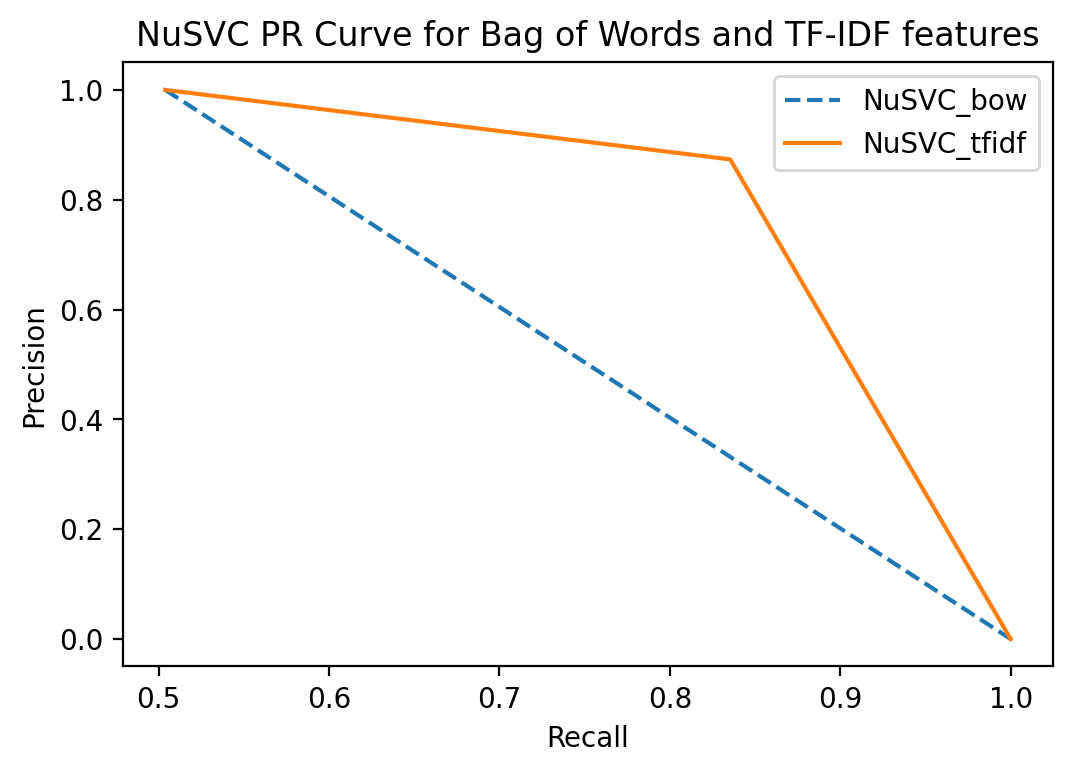

In [88]:
# Calculating PR curve for Bag of Words and Tfidf features
nusvc_precision_bow, nusvc_recall_bow, _ = precision_recall_curve(y_test_sentiments, nusvc_bow_predictions)
nusvc_precision_tfidf, nusvc_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, nusvc_tfidf_predictions)

# Calculating AUC score
nusvc_bow_pr_auc_score = auc(nusvc_recall_bow, nusvc_precision_bow)
nusvc_tfidf_pr_auc_score = auc(nusvc_recall_tfidf, nusvc_precision_tfidf)
print("nusvc_bow_pr_auc_score:", nusvc_bow_pr_auc_score)
print("nusvc_tfidf_pr_auc_score:", nusvc_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(nusvc_precision_bow, nusvc_recall_bow, linestyle = '--', label = 'NuSVC_bow')
plt.plot(nusvc_precision_tfidf, nusvc_recall_tfidf, linestyle = '-', label = 'NuSVC_tfidf')
plt.title('NuSVC PR Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/nusvc_PR.png')

### Confusion Matrix for Nu-Support Vector Classifier model

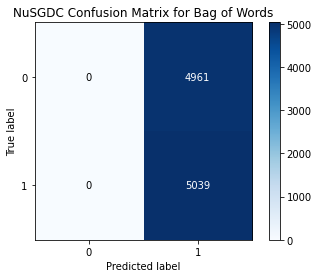

In [89]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, nusvc_bow_predictions)
plt.title('NuSVC Confusion Matrix for Bag of Words')
plt.savefig('graphs/nusvc_confusion_matrix_bow.png')

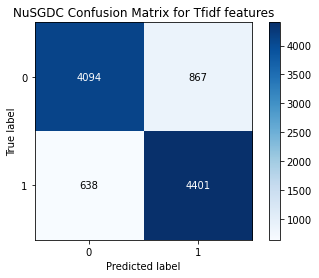

In [90]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, nusvc_tfidf_predictions)
plt.title('NuSVC Confusion Matrix for Tfidf features')
plt.savefig('graphs/nusvc_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [91]:
# For Bag of Words
ml_default_performance_metrics_df.loc['NuSVCbow']['Training-time'] = time.time() - start_time_nusvc_bow
ml_default_performance_metrics_df.loc['NuSVCbow']['Accuracy'] = nusvc_bow_score
ml_default_performance_metrics_df.loc['NuSVCbow']['ROC-AUC-score'] = nusvc_bow_roc_auc_score
ml_default_performance_metrics_df.loc['NuSVCbow']['F1-score'] = nusvc_bow_f1_score
ml_default_performance_metrics_df.loc['NuSVCbow']['PR-AUC-score'] = nusvc_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['NuSVCtfidf']['Training-time'] = time.time() - start_time_nusvc_tfidf
ml_default_performance_metrics_df.loc['NuSVCtfidf']['Accuracy'] = nusvc_tfidf_score
ml_default_performance_metrics_df.loc['NuSVCtfidf']['ROC-AUC-score'] = nusvc_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['NuSVCtfidf']['F1-score'] = nusvc_tfidf_f1_score
ml_default_performance_metrics_df.loc['NuSVCtfidf']['PR-AUC-score'] = nusvc_tfidf_pr_auc_score

## 5. Linear Support Vector Machine Classifier model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model 

In [92]:
# Training the Linear SVM Classifier
lin_svc = LinearSVC(loss = 'squared_hinge', max_iter = 500, random_state = 42)

start_time_lin_svc_bow = time.time()

# Fitting the Linear SVM Classifier for Bag of Words
lin_svc_bow = lin_svc.fit(cv_train_reviews, y_train_sentiments)
print(lin_svc_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_lin_svc_bow)

start_time_lin_svc_tfidf = time.time()

# Fitting the Linear SVM Classifier for Tfidf features
lin_svc_tfidf = lin_svc.fit(tv_train_reviews, y_train_sentiments)
print(lin_svc_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_lin_svc_tfidf)

LinearSVC(max_iter=500, random_state=42)
Training-time for Bag of Words in seconds:  30.927857160568237
LinearSVC(max_iter=500, random_state=42)
Training-time for TF-IDF features in seconds:  4.384463787078857


## Linear Support Vector Machine Classifier model performance on test data

In [93]:
# Predicting the model for Bag of Words
lin_svc_bow_predictions = lin_svc.predict(cv_test_reviews)
print(lin_svc_bow_predictions)

[0 1 0 ... 1 0 1]


In [94]:
# Predicting the model for Tfidf features
lin_svc_tfidf_predictions = lin_svc.predict(tv_test_reviews)
print(lin_svc_tfidf_predictions)

[0 1 0 ... 1 0 1]


### Accuracy of the Linear Support Vector Machine Classifier model

In [95]:
# Accuracy score for Bag of Words
lin_svc_bow_score = accuracy_score(y_test_sentiments, lin_svc_bow_predictions)
print("lin_svc_bow_score:", lin_svc_bow_score)

lin_svc_bow_score: 0.8828


In [96]:
# Accuracy score for Tfidf features
lin_svc_tfidf_score = accuracy_score(y_test_sentiments, lin_svc_tfidf_predictions)
print("lin_svc_tfidf_score:", lin_svc_tfidf_score)

lin_svc_tfidf_score: 0.9033


### ROC AUC

lin_svc_bow_roc_auc_score: 0.8825697755451442
lin_svc_tfidf_roc_auc_score: 0.903163848488542


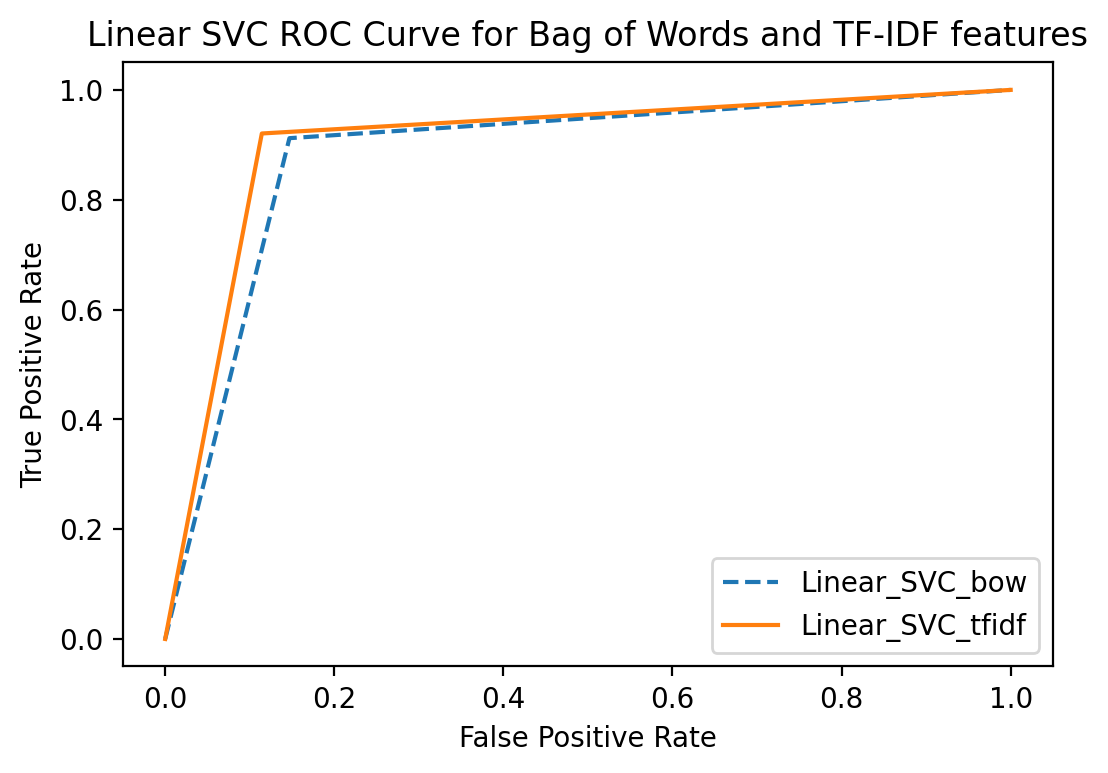

In [97]:
# ROC AUC score for Bag of Words and Tfidf features
lin_svc_bow_roc_auc_score = roc_auc_score(y_test_sentiments, lin_svc_bow_predictions)
lin_svc_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, lin_svc_tfidf_predictions)
print("lin_svc_bow_roc_auc_score:", lin_svc_bow_roc_auc_score)
print("lin_svc_tfidf_roc_auc_score:", lin_svc_tfidf_roc_auc_score)

# Calculating ROC curve
lin_svc_fpr_bow, lin_svc_tpr_bow, _ = roc_curve(y_test_sentiments, lin_svc_bow_predictions)
lin_svc_fpr_tfidf, lin_svc_tpr_tfidf, _ = roc_curve(y_test_sentiments, lin_svc_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(lin_svc_fpr_bow, lin_svc_tpr_bow, linestyle = '--', label = 'Linear_SVC_bow')
plt.plot(lin_svc_fpr_tfidf, lin_svc_tpr_tfidf, linestyle = '-', label = 'Linear_SVC_tfidf')
plt.title('Linear SVC ROC Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/lin_svc_ROC.png')

### Precision, Recall and F1-score of Linear Support Vector Machine Classifier model

In [98]:
# For Bag of Words
lin_svc_bow_precision_score = precision_score(y_test_sentiments, lin_svc_bow_predictions, average = 'macro')
lin_svc_bow_recall_score = recall_score(y_test_sentiments, lin_svc_bow_predictions, average = 'macro')
lin_svc_bow_f1_score = f1_score(y_test_sentiments, lin_svc_bow_predictions, average = 'macro')

print("lin_svc_bow_precision_score:", lin_svc_bow_precision_score)
print("lin_svc_bow_recall_score:",lin_svc_bow_recall_score)
print("lin_svc_bow_f1_score:", lin_svc_bow_f1_score)

lin_svc_bow_precision_score: 0.8841696166302628
lin_svc_bow_recall_score: 0.8825697755451442
lin_svc_bow_f1_score: 0.882644508668205


In [99]:
# For Tfidf features
lin_svc_tfidf_precision_score = precision_score(y_test_sentiments, lin_svc_tfidf_predictions, average = 'macro')
lin_svc_tfidf_recall_score = recall_score(y_test_sentiments, lin_svc_tfidf_predictions, average = 'macro')
lin_svc_tfidf_f1_score = f1_score(y_test_sentiments, lin_svc_tfidf_predictions, average = 'macro')

print("lin_svc_tfidf_precision_score:", lin_svc_tfidf_precision_score)
print("lin_svc_tfidf_recall_score:", lin_svc_tfidf_recall_score)
print("lin_svc_tfidf_f1_score:", lin_svc_tfidf_f1_score)

lin_svc_tfidf_precision_score: 0.9038247883487347
lin_svc_tfidf_recall_score: 0.903163848488542
lin_svc_tfidf_f1_score: 0.903241920963058


### Printing the classification report of Linear Support Vector Machine Classifier model

In [100]:
# Classification report for Bag of Words 
lin_svc_bow_report = classification_report(y_test_sentiments, lin_svc_bow_predictions, target_names = ['Positive', 'Negative'])
print(lin_svc_bow_report)

              precision    recall  f1-score   support

    Positive       0.91      0.85      0.88      4961
    Negative       0.86      0.91      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [101]:
# Classification report for Tfidf features
lin_svc_tfidf_report = classification_report(y_test_sentiments, lin_svc_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(lin_svc_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.92      0.89      0.90      4961
    Negative       0.89      0.92      0.91      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### PR AUC

lin_svc_bow_pr_auc_score: 0.9097421614225939
lin_svc_tfidf_pr_auc_score: 0.9258531887695491


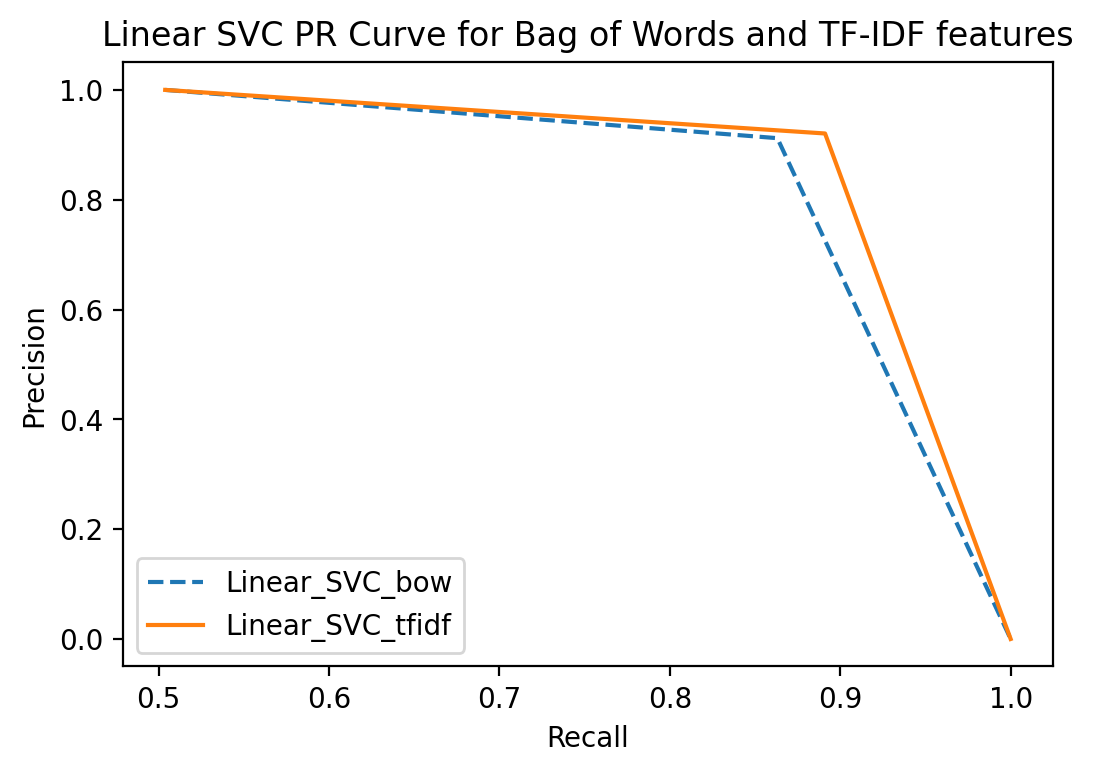

In [102]:
# Calculating PR curve for Bag of Words and Tfidf features
lin_svc_precision_bow, lin_svc_recall_bow, _ = precision_recall_curve(y_test_sentiments, lin_svc_bow_predictions)
lin_svc_precision_tfidf, lin_svc_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, lin_svc_tfidf_predictions)

# Calculating AUC score
lin_svc_bow_pr_auc_score = auc(lin_svc_recall_bow, lin_svc_precision_bow)
lin_svc_tfidf_pr_auc_score = auc(lin_svc_recall_tfidf, lin_svc_precision_tfidf)
print("lin_svc_bow_pr_auc_score:", lin_svc_bow_pr_auc_score)
print("lin_svc_tfidf_pr_auc_score:", lin_svc_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(lin_svc_precision_bow, lin_svc_recall_bow, linestyle = '--', label = 'LinearSVC_bow')
plt.plot(lin_svc_precision_tfidf, lin_svc_recall_tfidf, linestyle = '-', label = 'LinearSVC_tfidf')
plt.title('Linear SVC PR Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/lin_svc_PR.png')

### Confusion Matrix for Linear Support Vector Machine Classifier model

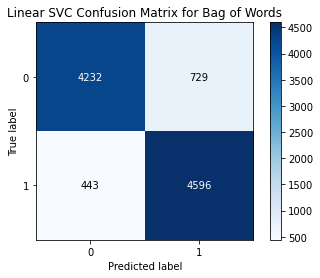

In [103]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, lin_svc_bow_predictions)
plt.title('Linear SVC Confusion Matrix for Bag of Words')
plt.savefig('graphs/lin_svc_confusion_matrix_bow.png')

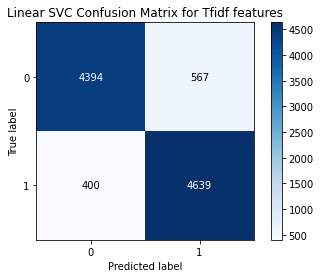

In [104]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, lin_svc_tfidf_predictions)
plt.title('Linear SVC Confusion Matrix for Tfidf features')
plt.savefig('graphs/lin_svc_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [105]:
# For Bag of Words
ml_default_performance_metrics_df.loc['LinearSVCbow']['Training-time'] = time.time() - start_time_lin_svc_bow
ml_default_performance_metrics_df.loc['LinearSVCbow']['Accuracy'] = lin_svc_bow_score
ml_default_performance_metrics_df.loc['LinearSVCbow']['ROC-AUC-score'] = lin_svc_bow_roc_auc_score
ml_default_performance_metrics_df.loc['LinearSVCbow']['F1-score'] = lin_svc_bow_f1_score
ml_default_performance_metrics_df.loc['LinearSVCbow']['PR-AUC-score'] = lin_svc_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['LinearSVCtfidf']['Training-time'] = time.time() - start_time_lin_svc_tfidf
ml_default_performance_metrics_df.loc['LinearSVCtfidf']['Accuracy'] = lin_svc_tfidf_score
ml_default_performance_metrics_df.loc['LinearSVCtfidf']['ROC-AUC-score'] = lin_svc_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['LinearSVCtfidf']['F1-score'] = lin_svc_tfidf_f1_score
ml_default_performance_metrics_df.loc['LinearSVCtfidf']['PR-AUC-score'] = lin_svc_tfidf_pr_auc_score

## 6. K-Nearest Neighbors Classifier model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model 

In [106]:
# Training the KNN Classifier
knn = KNeighborsClassifier()

start_time_knn_bow = time.time()

# Fitting the KNN Classifier for Bag of Words
knn_bow = knn.fit(cv_train_reviews, y_train_sentiments)
print(knn_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_knn_bow)

start_time_knn_tfidf = time.time()

# Fitting the KNN Classifier for Tfidf features
knn_tfidf = knn.fit(tv_train_reviews, y_train_sentiments)
print(knn_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_knn_tfidf)

KNeighborsClassifier()
Training-time for Bag of Words in seconds:  0.04190778732299805
KNeighborsClassifier()
Training-time for TF-IDF features in seconds:  0.07379508018493652


## K-Nearest Neighbors Classifier model performance on test data

In [107]:
# Predicting the model for Bag of Words
knn_bow_predictions = knn.predict(cv_test_reviews)
print(knn_bow_predictions)

[1 1 0 ... 1 1 0]


In [108]:
# Predicting the model for Tfidf features
knn_tfidf_predictions = knn.predict(tv_test_reviews)
print(knn_tfidf_predictions)

[1 1 0 ... 1 1 0]


### Accuracy of the K-Nearest Neighbors Classifier model

In [109]:
# Accuracy score for Bag of Words
knn_bow_score = accuracy_score(y_test_sentiments, knn_bow_predictions)
print("knn_bow_score:", knn_bow_score)

knn_bow_score: 0.7731


In [110]:
# Accuracy score for Tfidf features
knn_tfidf_score = accuracy_score(y_test_sentiments, knn_tfidf_predictions)
print("knn_tfidf_score:", knn_tfidf_score)

knn_tfidf_score: 0.7907


### ROC AUC 

knn_bow_roc_auc_score: 0.772475417404395
knn_tfidf_roc_auc_score: 0.7901934953722585


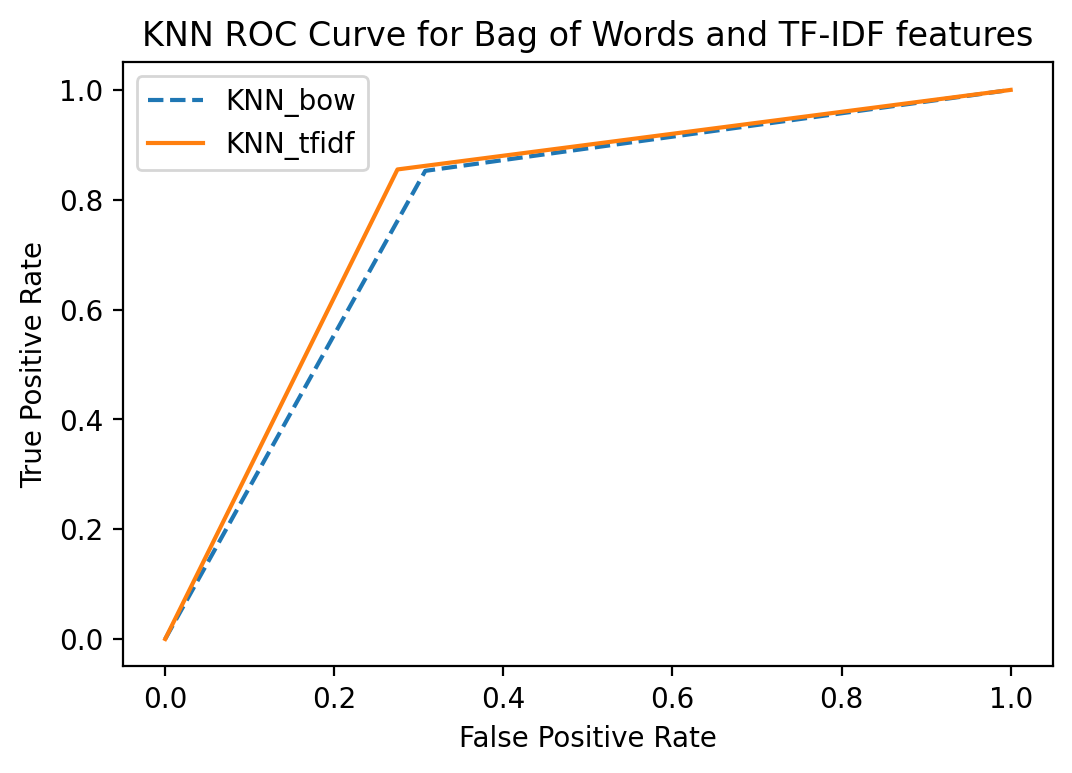

In [111]:
# ROC AUC score for Bag of Words and Tfidf features
knn_bow_roc_auc_score = roc_auc_score(y_test_sentiments, knn_bow_predictions)
knn_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, knn_tfidf_predictions)
print("knn_bow_roc_auc_score:", knn_bow_roc_auc_score)
print("knn_tfidf_roc_auc_score:", knn_tfidf_roc_auc_score)

# Calculating ROC curve
knn_fpr_bow, knn_tpr_bow, _ = roc_curve(y_test_sentiments, knn_bow_predictions)
knn_fpr_tfidf, knn_tpr_tfidf, _ = roc_curve(y_test_sentiments, knn_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(knn_fpr_bow, knn_tpr_bow, linestyle = '--', label = 'KNN_bow')
plt.plot(knn_fpr_tfidf, knn_tpr_tfidf, linestyle = '-', label = 'KNN_tfidf')
plt.title('KNN ROC Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/knn_ROC.png')

### Precision, Recall and F1-score of K-Nearest Neighbors Classifier model

In [112]:
# For Bag of Words
knn_bow_precision_score = precision_score(y_test_sentiments, knn_bow_predictions, average = 'macro')
knn_bow_recall_score = recall_score(y_test_sentiments, knn_bow_predictions, average = 'macro')
knn_bow_f1_score = f1_score(y_test_sentiments, knn_bow_predictions, average = 'macro')

print("knn_bow_precision_score:", knn_bow_precision_score)
print("knn_bow_recall_score:", knn_bow_recall_score)
print("knn_bow_f1_score:", knn_bow_f1_score)

knn_bow_precision_score: 0.7800272369426544
knn_bow_recall_score: 0.7724754174043948
knn_bow_f1_score: 0.7714053800776455


In [113]:
# For Tfidf features
knn_tfidf_precision_score = precision_score(y_test_sentiments, knn_tfidf_predictions, average = 'macro')
knn_tfidf_recall_score = recall_score(y_test_sentiments, knn_tfidf_predictions, average = 'macro')
knn_tfidf_f1_score = f1_score(y_test_sentiments, knn_tfidf_predictions, average = 'macro')

print("knn_tfidf_precision_score:", knn_tfidf_precision_score)
print("knn_tfidf_recall_score:", knn_tfidf_recall_score)
print("knn_tfidf_f1_score:", knn_tfidf_f1_score)

knn_tfidf_precision_score: 0.7955138123779555
knn_tfidf_recall_score: 0.7901934953722585
knn_tfidf_f1_score: 0.7896365686783484


### Printing the classification report of K-Nearest Neighbors Classifier model 

In [114]:
# Classification report for Bag of Words 
knn_bow_report = classification_report(y_test_sentiments, knn_bow_predictions, target_names = ['Positive', 'Negative'])
print(knn_bow_report)

              precision    recall  f1-score   support

    Positive       0.82      0.69      0.75      4961
    Negative       0.74      0.85      0.79      5039

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



In [115]:
# Classification report for Tfidf features
knn_tfidf_report = classification_report(y_test_sentiments, knn_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(knn_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.83      0.73      0.77      4961
    Negative       0.76      0.86      0.80      5039

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



### PR AUC

knn_bow_pr_auc_score: 0.8323704341689614
knn_tfidf_pr_auc_score: 0.8439133710513566


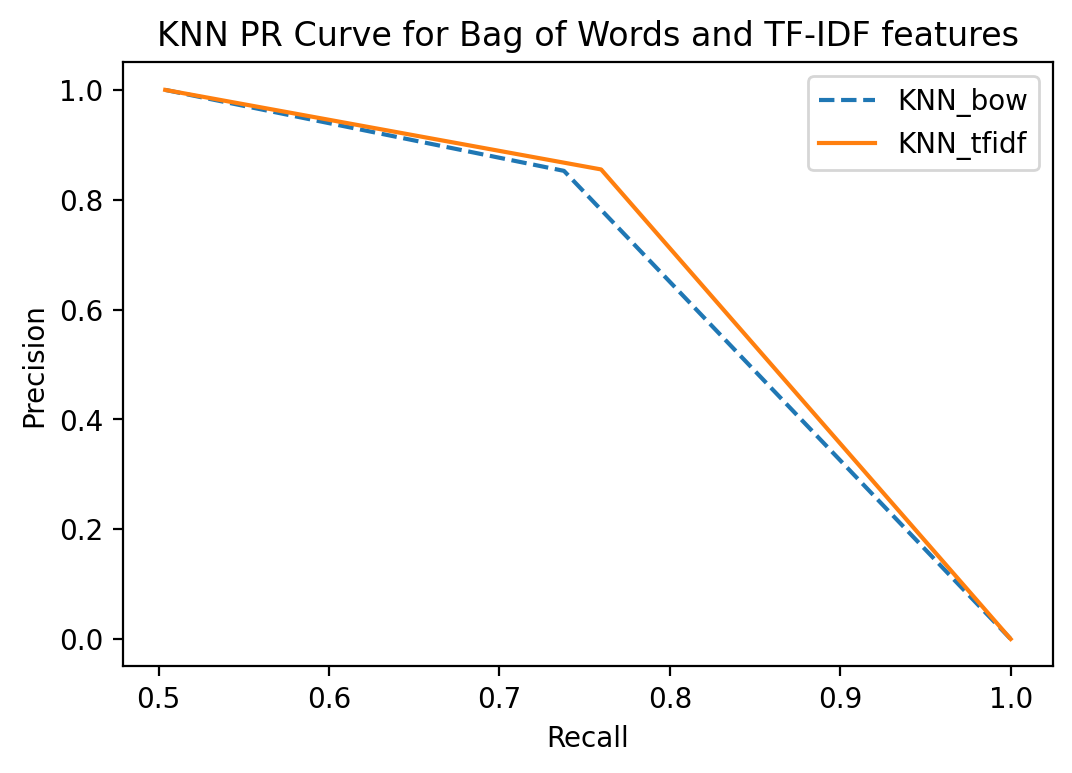

In [116]:
# Calculating PR curve for Bag of Words and Tfidf features
knn_precision_bow, knn_recall_bow, _ = precision_recall_curve(y_test_sentiments, knn_bow_predictions)
knn_precision_tfidf, knn_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, knn_tfidf_predictions)

# Calculating AUC score
knn_bow_pr_auc_score = auc(knn_recall_bow, knn_precision_bow)
knn_tfidf_pr_auc_score = auc(knn_recall_tfidf, knn_precision_tfidf)
print("knn_bow_pr_auc_score:", knn_bow_pr_auc_score)
print("knn_tfidf_pr_auc_score:", knn_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(knn_precision_bow, knn_recall_bow, linestyle = '--', label = 'KNN_bow')
plt.plot(knn_precision_tfidf, knn_recall_tfidf, linestyle = '-', label = 'KNN_tfidf')
plt.title('KNN PR Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/knn_PR.png')

### Confusion Matrix for K-Nearest Neighbors Classifier model

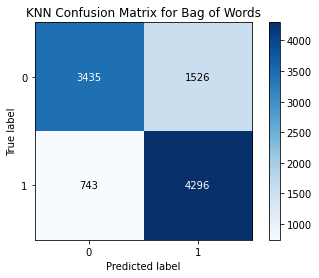

In [117]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, knn_bow_predictions)
plt.title('KNN Confusion Matrix for Bag of Words')
plt.savefig('graphs/knn_confusion_matrix_bow.png')

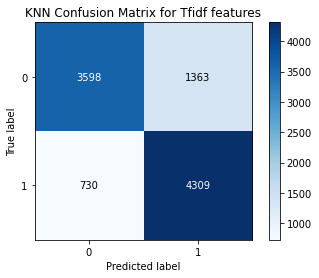

In [118]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, knn_tfidf_predictions)
plt.title('KNN Confusion Matrix for Tfidf features')
plt.savefig('graphs/knn_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [119]:
# For Bag of Words
ml_default_performance_metrics_df.loc['KNeighborsClassifierBow']['Training-time'] = time.time() - start_time_knn_bow
ml_default_performance_metrics_df.loc['KNeighborsClassifierBow']['Accuracy'] = knn_bow_score
ml_default_performance_metrics_df.loc['KNeighborsClassifierBow']['ROC-AUC-score'] = knn_bow_roc_auc_score
ml_default_performance_metrics_df.loc['KNeighborsClassifierBow']['F1-score'] = knn_bow_f1_score
ml_default_performance_metrics_df.loc['KNeighborsClassifierBow']['PR-AUC-score'] = knn_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['KNeighborsClassifierTfidf']['Training-time'] = time.time() - start_time_knn_tfidf
ml_default_performance_metrics_df.loc['KNeighborsClassifierTfidf']['Accuracy'] = knn_tfidf_score
ml_default_performance_metrics_df.loc['KNeighborsClassifierTfidf']['ROC-AUC-score'] = knn_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['KNeighborsClassifierTfidf']['F1-score'] = knn_tfidf_f1_score
ml_default_performance_metrics_df.loc['KNeighborsClassifierTfidf']['PR-AUC-score'] = knn_tfidf_pr_auc_score

## 7. Multinomial Naive Bayes Classifier model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model 

In [120]:
# Training the Multinomial Naive Bayes Classifier
mnb = MultinomialNB()

start_time_mnb_bow = time.time()

# Fitting the Multinomial Naive Bayes Classifier for Bag of Words
mnb_bow = mnb.fit(cv_train_reviews, y_train_sentiments)
print(mnb_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_mnb_bow)

start_time_mnb_tfidf = time.time()

# Fitting the Multinomial Naive Bayes Classifier for Tfidf features
mnb_tfidf = mnb.fit(tv_train_reviews, y_train_sentiments)
print(mnb_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_mnb_tfidf)

MultinomialNB()
Training-time for Bag of Words in seconds:  0.6183187961578369
MultinomialNB()
Training-time for TF-IDF features in seconds:  0.8366022109985352


## Multinomial Naive Bayes Classifier model performance on test data

In [121]:
# Predicting the model for Bag of Words
mnb_bow_predictions = mnb.predict(cv_test_reviews)
print(mnb_bow_predictions)

[1 1 0 ... 1 0 0]


In [122]:
# Predicting the model for Tfidf features
mnb_tfidf_predictions = mnb.predict(tv_test_reviews)
print(mnb_tfidf_predictions)

[1 1 0 ... 1 0 0]


### Accuracy of the Multinomial Naive Bayes Classifier model

In [123]:
# Accuracy score for Bag of Words
mnb_bow_score = accuracy_score(y_test_sentiments, mnb_bow_predictions)
print("mnb_bow_score:", mnb_bow_score)

mnb_bow_score: 0.8783


In [124]:
# Accuracy score for Tfidf features
mnb_tfidf_score = accuracy_score(y_test_sentiments, mnb_tfidf_predictions)
print("mnb_tfidf_score:", mnb_tfidf_score)

mnb_tfidf_score: 0.8903


### ROC AUC

mnb_bow_roc_auc_score: 0.8785523511250424
mnb_tfidf_roc_auc_score: 0.8903767905239355


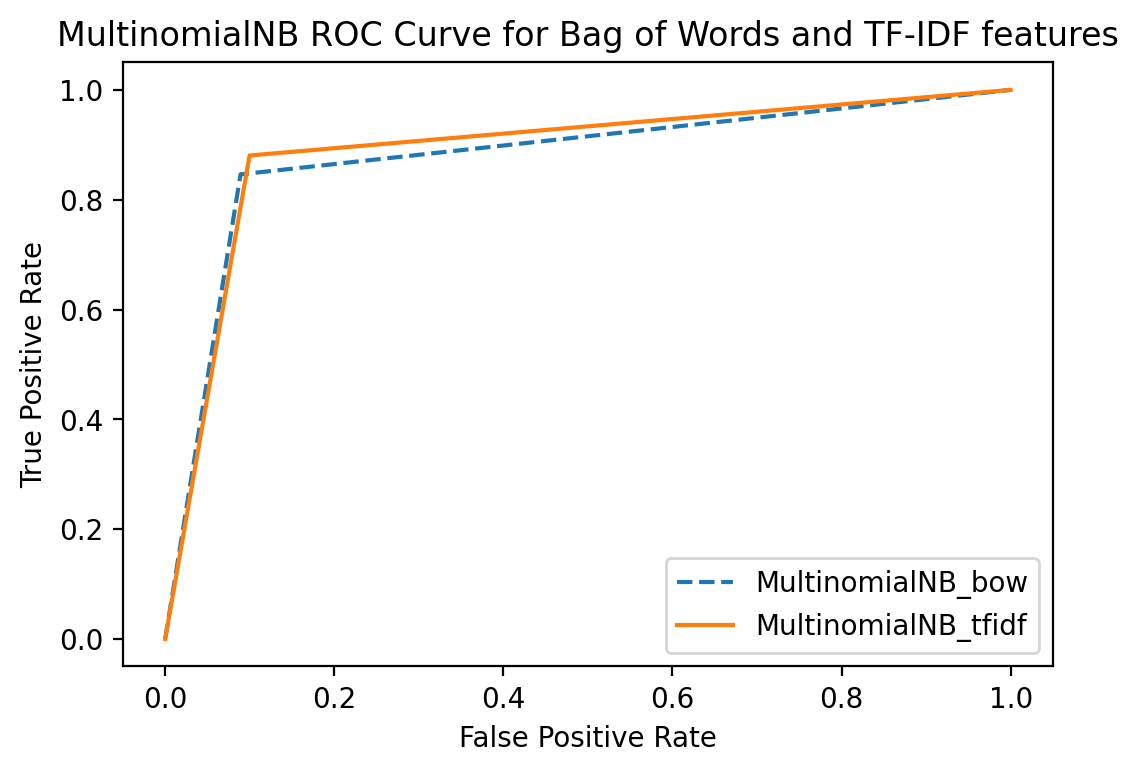

In [125]:
# ROC AUC score for Bag of Words and Tfidf features
mnb_bow_roc_auc_score = roc_auc_score(y_test_sentiments, mnb_bow_predictions)
mnb_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, mnb_tfidf_predictions)
print("mnb_bow_roc_auc_score:", mnb_bow_roc_auc_score)
print("mnb_tfidf_roc_auc_score:", mnb_tfidf_roc_auc_score)

# Calculating ROC curve
mnb_fpr_bow, mnb_tpr_bow, _ = roc_curve(y_test_sentiments, mnb_bow_predictions)
mnb_fpr_tfidf, mnb_tpr_tfidf, _ = roc_curve(y_test_sentiments, mnb_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(mnb_fpr_bow, mnb_tpr_bow, linestyle = '--', label = 'MultinomialNB_bow')
plt.plot(mnb_fpr_tfidf, mnb_tpr_tfidf, linestyle = '-', label = 'MultinomialNB_tfidf')
plt.title('MultinomialNB ROC Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/mnb_ROC.png')

### Precision, Recall and F1-score of Multinomial Naive Bayes Classifier model

In [126]:
# For Bag of Words
mnb_bow_precision_score = precision_score(y_test_sentiments, mnb_bow_predictions, average = 'macro')
mnb_bow_recall_score = recall_score(y_test_sentiments, mnb_bow_predictions, average = 'macro')
mnb_bow_f1_score = f1_score(y_test_sentiments, mnb_bow_predictions, average = 'macro')

print("mnb_bow_precision_score:", mnb_bow_precision_score)
print("mnb_bow_recall_score:", mnb_bow_recall_score)
print("mnb_bow_f1_score:", mnb_bow_f1_score)

mnb_bow_precision_score: 0.8798426030093487
mnb_bow_recall_score: 0.8785523511250424
mnb_bow_f1_score: 0.8782208130837077


In [127]:
# For Tfidf features
mnb_tfidf_precision_score = precision_score(y_test_sentiments, mnb_tfidf_predictions, average = 'macro')
mnb_tfidf_recall_score = recall_score(y_test_sentiments, mnb_tfidf_predictions, average = 'macro')
mnb_tfidf_f1_score = f1_score(y_test_sentiments, mnb_tfidf_predictions, average = 'macro')

print("mnb_tfidf_precision_score:", mnb_tfidf_precision_score)
print("mnb_tfidf_recall_score:", mnb_tfidf_recall_score)
print("mnb_tfidf_f1_score:", mnb_tfidf_f1_score)

mnb_tfidf_precision_score: 0.890425253054805
mnb_tfidf_recall_score: 0.8903767905239355
mnb_tfidf_f1_score: 0.8902990774152412


### Printing the classification report of Multinomial Naive Bayes Classifier model 

In [128]:
# Classification report for Bag of Words 
mnb_bow_report = classification_report(y_test_sentiments, mnb_bow_predictions, target_names = ['Positive', 'Negative'])
print(mnb_bow_report)

              precision    recall  f1-score   support

    Positive       0.85      0.91      0.88      4961
    Negative       0.91      0.85      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [129]:
# Classification report for Tfidf features
mnb_tfidf_report = classification_report(y_test_sentiments, mnb_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.88      0.90      0.89      4961
    Negative       0.90      0.88      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### PR AUC

mnb_bow_pr_auc_score: 0.9148884954262827
mnb_tfidf_pr_auc_score: 0.9201834440270996


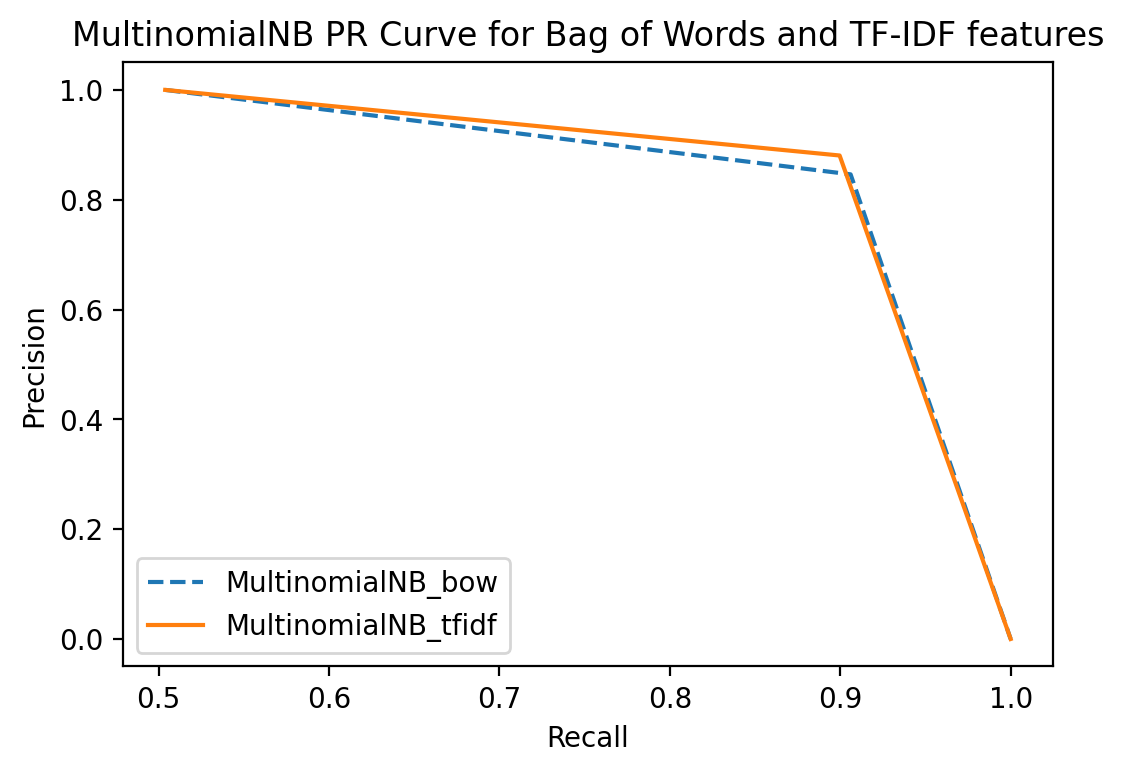

In [130]:
# Calculating PR curve for Bag of Words and Tfidf features
mnb_precision_bow, mnb_recall_bow, _ = precision_recall_curve(y_test_sentiments, mnb_bow_predictions)
mnb_precision_tfidf, mnb_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, mnb_tfidf_predictions)

# Calculating AUC score
mnb_bow_pr_auc_score = auc(mnb_recall_bow, mnb_precision_bow)
mnb_tfidf_pr_auc_score = auc(mnb_recall_tfidf, mnb_precision_tfidf)
print("mnb_bow_pr_auc_score:", mnb_bow_pr_auc_score)
print("mnb_tfidf_pr_auc_score:", mnb_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(mnb_precision_bow, mnb_recall_bow, linestyle = '--', label = 'MultinomialNB_bow')
plt.plot(mnb_precision_tfidf, mnb_recall_tfidf, linestyle = '-', label = 'MultinomialNB_tfidf')
plt.title('MultinomialNB PR Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/mnb_PR.png')

### Confusion Matrix for Multinomial Naive Bayes Classifier model

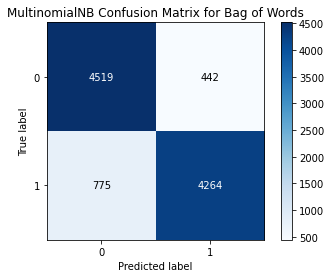

In [131]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, mnb_bow_predictions)
plt.title('MultinomialNB Confusion Matrix for Bag of Words')
plt.savefig('graphs/mnb_confusion_matrix_bow.png')

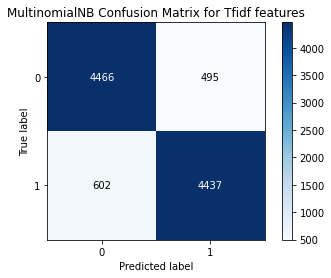

In [132]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, mnb_tfidf_predictions)
plt.title('MultinomialNB Confusion Matrix for Tfidf features')
plt.savefig('graphs/mnb_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [133]:
# For Bag of Words
ml_default_performance_metrics_df.loc['MultinomialNBbow']['Training-time'] = time.time() - start_time_mnb_bow
ml_default_performance_metrics_df.loc['MultinomialNBbow']['Accuracy'] = mnb_bow_score
ml_default_performance_metrics_df.loc['MultinomialNBbow']['ROC-AUC-score'] = mnb_bow_roc_auc_score
ml_default_performance_metrics_df.loc['MultinomialNBbow']['F1-score'] = mnb_bow_f1_score
ml_default_performance_metrics_df.loc['MultinomialNBbow']['PR-AUC-score'] = mnb_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['MultinomialNBtfidf']['Training-time'] = time.time() - start_time_mnb_tfidf
ml_default_performance_metrics_df.loc['MultinomialNBtfidf']['Accuracy'] = mnb_tfidf_score
ml_default_performance_metrics_df.loc['MultinomialNBtfidf']['ROC-AUC-score'] = mnb_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['MultinomialNBtfidf']['F1-score'] = mnb_tfidf_f1_score
ml_default_performance_metrics_df.loc['MultinomialNBtfidf']['PR-AUC-score'] = mnb_tfidf_pr_auc_score

## 8. Bernoulli Naive Bayes Classifier model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model 

In [134]:
# Training the Bernoulli Naive Bayes
bnb = BernoulliNB()

start_time_bnb_bow = time.time()

# Fitting the Bernoulli Naive Bayes Classifier for Bag of Words
bnb_bow = bnb.fit(cv_train_reviews, y_train_sentiments)
print(bnb_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_bnb_bow)

start_time_bnb_tfidf = time.time()

# Fitting the Bernoulli Naive Bayes Classifier for Tfidf features
bnb_tfidf = bnb.fit(tv_train_reviews, y_train_sentiments)
print(bnb_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_bnb_tfidf)

BernoulliNB()
Training-time for Bag of Words in seconds:  0.7011163234710693
BernoulliNB()
Training-time for TF-IDF features in seconds:  0.7271788120269775


## Bernoulli Naive Bayes Classifier model performance on test data

In [135]:
# Predicting the model for Bag of Words
bnb_bow_predictions = bnb.predict(cv_test_reviews)
print(bnb_bow_predictions)

[1 1 0 ... 0 0 0]


In [136]:
# Predicting the model for Tfidf features
bnb_tfidf_predictions = bnb.predict(tv_test_reviews)
print(bnb_tfidf_predictions)

[1 1 0 ... 0 0 0]


### Accuracy of the Bernoulli Naive Bayes Classifier model

In [137]:
# Accuracy score for Bag of Words
bnb_bow_score = accuracy_score(y_test_sentiments, bnb_bow_predictions)
print("bnb_bow_score:", bnb_bow_score)

bnb_bow_score: 0.8548


In [138]:
# Accuracy score for Tfidf features
bnb_tfidf_score = accuracy_score(y_test_sentiments, bnb_tfidf_predictions)
print("bnb_tfidf_score:", bnb_tfidf_score)

bnb_tfidf_score: 0.8548


### ROC AUC

bnb_bow_roc_auc_score: 0.8555306504847755
bnb_tfidf_roc_auc_score: 0.8555306504847755


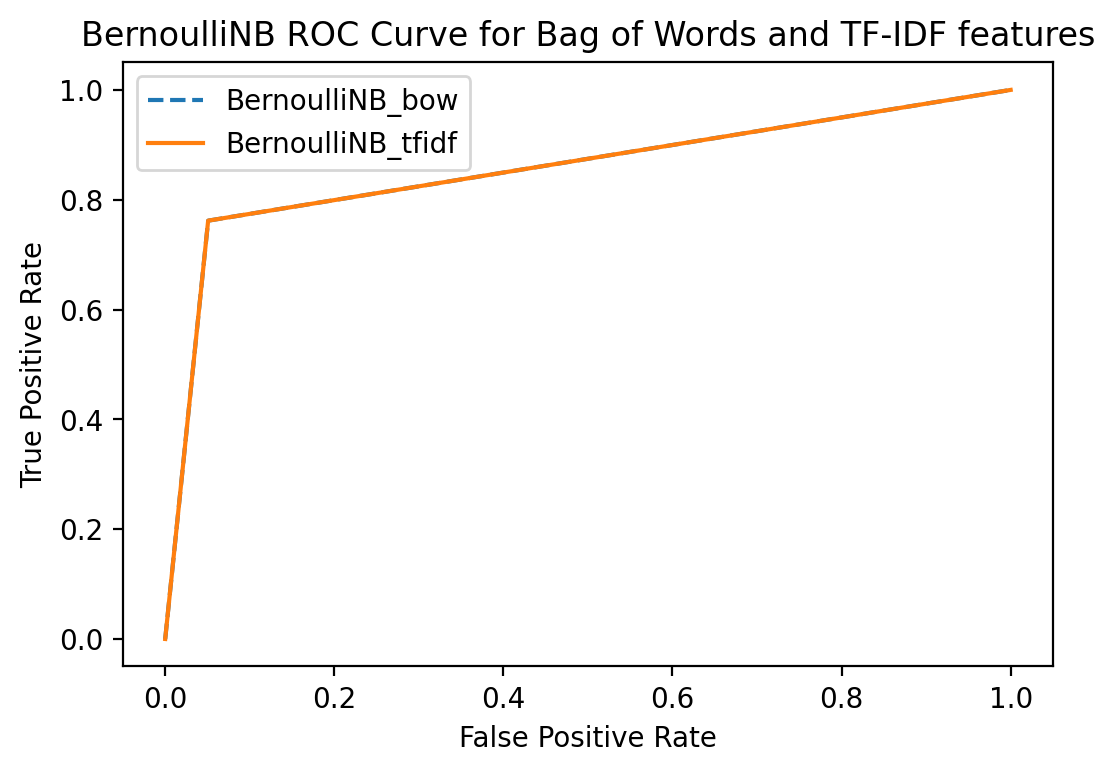

In [139]:
# ROC AUC score for Bag of Words and Tfidf features
bnb_bow_roc_auc_score = roc_auc_score(y_test_sentiments, bnb_bow_predictions)
bnb_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, bnb_tfidf_predictions)
print("bnb_bow_roc_auc_score:", bnb_bow_roc_auc_score)
print("bnb_tfidf_roc_auc_score:", bnb_tfidf_roc_auc_score)

# Calculating ROC curve
bnb_fpr_bow, bnb_tpr_bow, _ = roc_curve(y_test_sentiments, bnb_bow_predictions)
bnb_fpr_tfidf, bnb_tpr_tfidf, _ = roc_curve(y_test_sentiments, bnb_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(bnb_fpr_bow, bnb_tpr_bow, linestyle = '--', label = 'BernoulliNB_bow')
plt.plot(bnb_fpr_tfidf, bnb_tpr_tfidf, linestyle = '-', label = 'BernoulliNB_tfidf')
plt.title('BernoulliNB ROC Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/bnb_ROC.png')

### Precision, Recall and F1-score of Bernoulli Naive Bayes Classifier model

In [140]:
# For Bag of Words
bnb_bow_precision_score = precision_score(y_test_sentiments, bnb_bow_predictions, average = 'macro')
bnb_bow_recall_score = recall_score(y_test_sentiments, bnb_bow_predictions, average = 'macro')
bnb_bow_f1_score = f1_score(y_test_sentiments, bnb_bow_predictions, average = 'macro')

print("bnb_bow_precision_score:", bnb_bow_precision_score)
print("bnb_bow_recall_score:", bnb_bow_recall_score)
print("bnb_bow_f1_score:", bnb_bow_f1_score)

bnb_bow_precision_score: 0.8676606607365627
bnb_bow_recall_score: 0.8555306504847755
bnb_bow_f1_score: 0.8536925992839804


In [141]:
# For Tfidf features
bnb_tfidf_precision_score = precision_score(y_test_sentiments, bnb_tfidf_predictions, average = 'macro')
bnb_tfidf_recall_score = recall_score(y_test_sentiments, bnb_tfidf_predictions, average = 'macro')
bnb_tfidf_f1_score = f1_score(y_test_sentiments, bnb_tfidf_predictions, average = 'macro')

print("bnb_tfidf_precision_score:", bnb_tfidf_precision_score)
print("bnb_tfidf_recall_score:", bnb_tfidf_recall_score)
print("bnb_tfidf_f1_score:", bnb_tfidf_f1_score)

bnb_tfidf_precision_score: 0.8676606607365627
bnb_tfidf_recall_score: 0.8555306504847755
bnb_tfidf_f1_score: 0.8536925992839804


### Printing the classification report of Bernoulli Naive Bayes Classifier model 

In [142]:
# Classification report for Bag of Words 
bnb_bow_report = classification_report(y_test_sentiments, bnb_bow_predictions, target_names = ['Positive', 'Negative'])
print(bnb_bow_report)

              precision    recall  f1-score   support

    Positive       0.80      0.95      0.87      4961
    Negative       0.94      0.76      0.84      5039

    accuracy                           0.85     10000
   macro avg       0.87      0.86      0.85     10000
weighted avg       0.87      0.85      0.85     10000



In [143]:
# Classification report for Tfidf features
bnb_tfidf_report = classification_report(y_test_sentiments, bnb_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(bnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.80      0.95      0.87      4961
    Negative       0.94      0.76      0.84      5039

    accuracy                           0.85     10000
   macro avg       0.87      0.86      0.85     10000
weighted avg       0.87      0.85      0.85     10000



### PR AUC

bnb_bow_pr_auc_score: 0.9101294401347321
bnb_tfidf_pr_auc_score: 0.9101294401347321


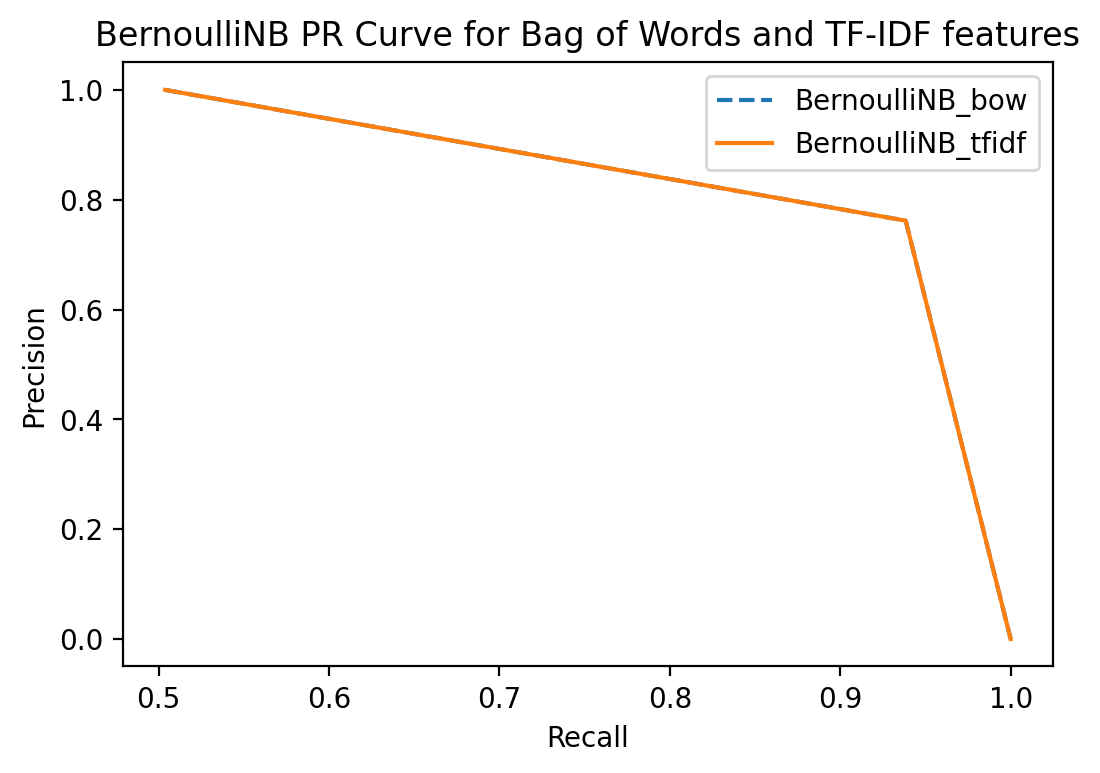

In [144]:
# Calculating PR curve for Bag of Words and Tfidf features
bnb_precision_bow, bnb_recall_bow, _ = precision_recall_curve(y_test_sentiments, bnb_bow_predictions)
bnb_precision_tfidf, bnb_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, bnb_tfidf_predictions)

# Calculating AUC score
bnb_bow_pr_auc_score = auc(bnb_recall_bow, bnb_precision_bow)
bnb_tfidf_pr_auc_score = auc(bnb_recall_tfidf, bnb_precision_tfidf)
print("bnb_bow_pr_auc_score:", bnb_bow_pr_auc_score)
print("bnb_tfidf_pr_auc_score:", bnb_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(bnb_precision_bow, bnb_recall_bow, linestyle = '--', label = 'BernoulliNB_bow')
plt.plot(bnb_precision_tfidf, bnb_recall_tfidf, linestyle = '-', label = 'BernoulliNB_tfidf')
plt.title('BernoulliNB PR Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/bnb_PR.png')

### Confusion Matrix for Bernoulli Naive Bayes Classifier model

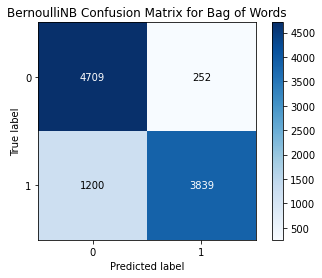

In [145]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, bnb_bow_predictions)
plt.title('BernoulliNB Confusion Matrix for Bag of Words')
plt.savefig('graphs/bnb_confusion_matrix_bow.png')

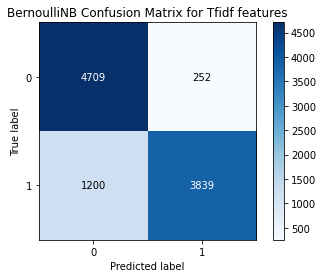

In [146]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, bnb_tfidf_predictions)
plt.title('BernoulliNB Confusion Matrix for Tfidf features')
plt.savefig('graphs/bnb_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [147]:
# For Bag of Words
ml_default_performance_metrics_df.loc['BernoulliNBbow']['Training-time'] = time.time() - start_time_bnb_bow
ml_default_performance_metrics_df.loc['BernoulliNBbow']['Accuracy'] = bnb_bow_score
ml_default_performance_metrics_df.loc['BernoulliNBbow']['ROC-AUC-score'] = bnb_bow_roc_auc_score
ml_default_performance_metrics_df.loc['BernoulliNBbow']['F1-score'] = bnb_bow_f1_score
ml_default_performance_metrics_df.loc['BernoulliNBbow']['PR-AUC-score'] = bnb_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['BernoulliNBtfidf']['Training-time'] = time.time() - start_time_bnb_tfidf
ml_default_performance_metrics_df.loc['BernoulliNBtfidf']['Accuracy'] = bnb_tfidf_score
ml_default_performance_metrics_df.loc['BernoulliNBtfidf']['ROC-AUC-score'] = bnb_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['BernoulliNBtfidf']['F1-score'] = bnb_tfidf_f1_score
ml_default_performance_metrics_df.loc['BernoulliNBtfidf']['PR-AUC-score'] = bnb_tfidf_pr_auc_score

## 9. Decision Tree Classifier model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model 

In [148]:
# Training the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state = 42)

start_time_dtc_bow = time.time()

# Fitting the Decision Tree Classifier for Bag of Words
dtc_bow = dtc.fit(cv_train_reviews, y_train_sentiments)
print(dtc_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_dtc_bow)

start_time_dtc_tfidf = time.time()

# Fitting the Decision Tree Classifier for Tfidf features
dtc_tfidf = dtc.fit(tv_train_reviews, y_train_sentiments)
print(dtc_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_dtc_tfidf)

DecisionTreeClassifier(random_state=42)
Training-time for Bag of Words in seconds:  1623.8213317394257
DecisionTreeClassifier(random_state=42)
Training-time for TF-IDF features in seconds:  1410.0847873687744


## Decision Tree Classifier model performance on test data

In [149]:
# Predicting the model for Bag of Words
dtc_bow_predictions = dtc.predict(cv_test_reviews)
print(dtc_bow_predictions)

[0 0 1 ... 0 0 0]


In [150]:
# Predicting the model for Tfidf features
dtc_tfidf_predictions = dtc.predict(tv_test_reviews)
print(dtc_tfidf_predictions)

[0 0 1 ... 1 0 0]


### Accuracy of the Decision Tree Classifier model

In [151]:
# Accuracy score for Bag of Words
dtc_bow_score = accuracy_score(y_test_sentiments, dtc_bow_predictions)
print("dtc_bow_score:", dtc_bow_score)

dtc_bow_score: 0.6117


In [152]:
# Accuracy score for Tfidf features
dtc_tfidf_score = accuracy_score(y_test_sentiments, dtc_tfidf_predictions)
print("dtc_tfidf_score:", dtc_tfidf_score)

dtc_tfidf_score: 0.683


### ROC AUC

dtc_bow_roc_auc_score: 0.6119642119026522
dtc_tfidf_roc_auc_score: 0.6831960056449835


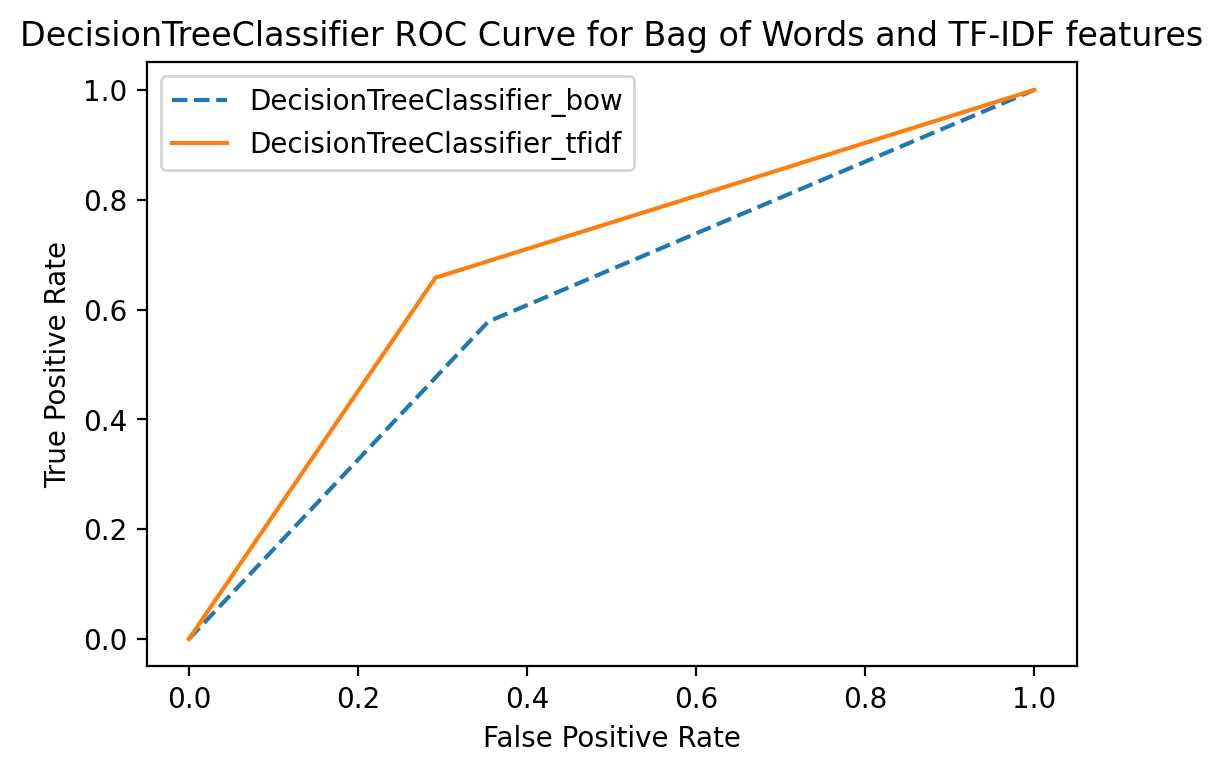

In [153]:
# ROC AUC score for Bag of Words and Tfidf features
dtc_bow_roc_auc_score = roc_auc_score(y_test_sentiments, dtc_bow_predictions)
dtc_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, dtc_tfidf_predictions)
print("dtc_bow_roc_auc_score:", dtc_bow_roc_auc_score)
print("dtc_tfidf_roc_auc_score:", dtc_tfidf_roc_auc_score)

# Calculating ROC curve
dtc_fpr_bow, dtc_tpr_bow, _ = roc_curve(y_test_sentiments, dtc_bow_predictions)
dtc_fpr_tfidf, dtc_tpr_tfidf, _ = roc_curve(y_test_sentiments, dtc_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(dtc_fpr_bow, dtc_tpr_bow, linestyle = '--', label = 'DecisionTreeClassifier_bow')
plt.plot(dtc_fpr_tfidf, dtc_tpr_tfidf, linestyle = '-', label = 'DecisionTreeClassifier_tfidf')
plt.title('DecisionTreeClassifier ROC Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/dtc_ROC.png')

### Precision, Recall and F1-score of Decision Tree Classifier model

In [154]:
# For Bag of Words
dtc_bow_precision_score = precision_score(y_test_sentiments, dtc_bow_predictions, average = 'macro')
dtc_bow_recall_score = recall_score(y_test_sentiments, dtc_bow_predictions, average = 'macro')
dtc_bow_f1_score = f1_score(y_test_sentiments, dtc_bow_predictions, average = 'macro')

print("dtc_bow_precision_score:", dtc_bow_precision_score)
print("dtc_bow_recall_score:", dtc_bow_recall_score)
print("dtc_bow_f1_score:", dtc_bow_f1_score)

dtc_bow_precision_score: 0.6124472200907152
dtc_bow_recall_score: 0.6119642119026522
dtc_bow_f1_score: 0.6113709049960597


In [155]:
# For Tfidf features
dtc_tfidf_precision_score = precision_score(y_test_sentiments, dtc_tfidf_predictions, average = 'macro')
dtc_tfidf_recall_score = recall_score(y_test_sentiments, dtc_tfidf_predictions, average = 'macro')
dtc_tfidf_f1_score = f1_score(y_test_sentiments, dtc_tfidf_predictions, average = 'macro')

print("dtc_tfidf_precision_score:", dtc_tfidf_precision_score)
print("dtc_tfidf_recall_score:", dtc_tfidf_recall_score)
print("dtc_tfidf_f1_score:", dtc_tfidf_f1_score)

dtc_tfidf_precision_score: 0.6835973592027624
dtc_tfidf_recall_score: 0.6831960056449835
dtc_tfidf_f1_score: 0.6828756745794622


### Printing the classification report of Decision Tree Classifier model 

In [156]:
# Classification report for Bag of Words 
dtc_bow_report = classification_report(y_test_sentiments, dtc_bow_predictions, target_names = ['Positive', 'Negative'])
print(dtc_bow_report)

              precision    recall  f1-score   support

    Positive       0.60      0.65      0.62      4961
    Negative       0.62      0.58      0.60      5039

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



In [157]:
# Classification report for Tfidf features
dtc_tfidf_report = classification_report(y_test_sentiments, dtc_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(dtc_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.67      0.71      0.69      4961
    Negative       0.70      0.66      0.68      5039

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



### PR AUC

dtc_bow_pr_auc_score: 0.7072298138332569
dtc_tfidf_pr_auc_score: 0.763283475414963


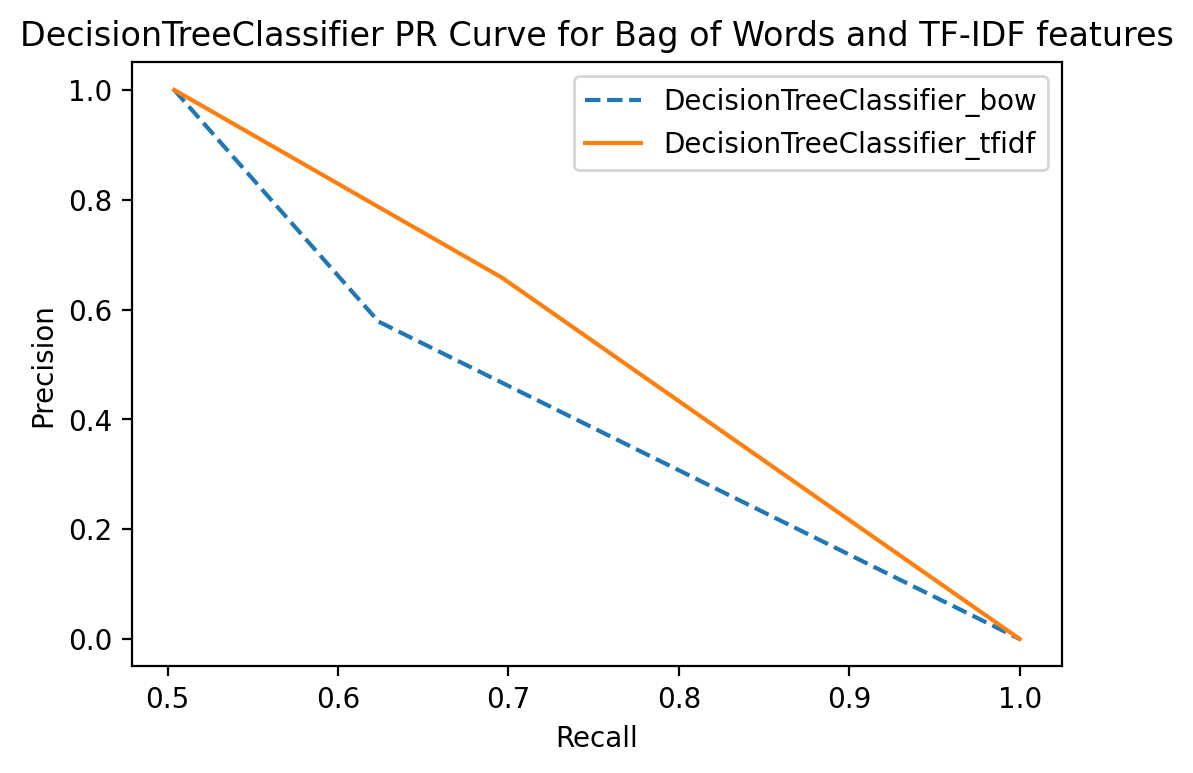

In [158]:
# Calculating PR curve for Bag of Words and Tfidf features
dtc_precision_bow, dtc_recall_bow, _ = precision_recall_curve(y_test_sentiments, dtc_bow_predictions)
dtc_precision_tfidf, dtc_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, dtc_tfidf_predictions)

# Calculating AUC score
dtc_bow_pr_auc_score = auc(dtc_recall_bow, dtc_precision_bow)
dtc_tfidf_pr_auc_score = auc(dtc_recall_tfidf, dtc_precision_tfidf)
print("dtc_bow_pr_auc_score:", dtc_bow_pr_auc_score)
print("dtc_tfidf_pr_auc_score:", dtc_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(dtc_precision_bow, dtc_recall_bow, linestyle = '--', label = 'DecisionTreeClassifier_bow')
plt.plot(dtc_precision_tfidf, dtc_recall_tfidf, linestyle = '-', label = 'DecisionTreeClassifier_tfidf')
plt.title('DecisionTreeClassifier PR Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/dtc_PR.png')

### Confusion Matrix for Decision Tree Classifier model

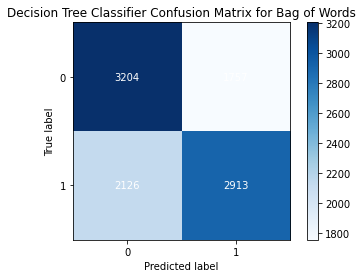

In [159]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, dtc_bow_predictions)
plt.title('DecisionTreeClassifier Confusion Matrix for Bag of Words')
plt.savefig('graphs/dtc_confusion_matrix_bow.png')

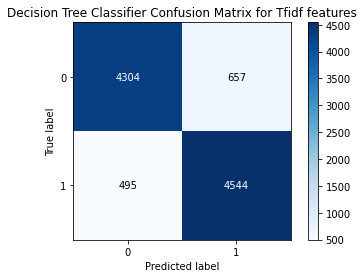

In [160]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, sgdc_tfidf_predictions)
plt.title('DecisionTreeClassifier Confusion Matrix for Tfidf features')
plt.savefig('graphs/sgdc_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [161]:
# For Bag of Words
ml_default_performance_metrics_df.loc['DecisionTreeClassifierBow']['Training-time'] = time.time() - start_time_dtc_bow
ml_default_performance_metrics_df.loc['DecisionTreeClassifierBow']['Accuracy'] = dtc_bow_score
ml_default_performance_metrics_df.loc['DecisionTreeClassifierBow']['ROC-AUC-score'] = dtc_bow_roc_auc_score
ml_default_performance_metrics_df.loc['DecisionTreeClassifierBow']['F1-score'] = dtc_bow_f1_score
ml_default_performance_metrics_df.loc['DecisionTreeClassifierBow']['PR-AUC-score'] = dtc_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['DecisionTreeClassifierTfidf']['Training-time'] = time.time() - start_time_dtc_tfidf
ml_default_performance_metrics_df.loc['DecisionTreeClassifierTfidf']['Accuracy'] = dtc_tfidf_score
ml_default_performance_metrics_df.loc['DecisionTreeClassifierTfidf']['ROC-AUC-score'] = dtc_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['DecisionTreeClassifierTfidf']['F1-score'] = dtc_tfidf_f1_score
ml_default_performance_metrics_df.loc['DecisionTreeClassifierTfidf']['PR-AUC-score'] = dtc_tfidf_pr_auc_score

In [162]:
## 10. AdaBoost Classifier model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model

In [163]:
# Training the AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators = 100, random_state = 42)

start_time_ada_bow = time.time()

# Fitting the AdaBoost Classifier for Bag of Words
ada_bow = ada.fit(cv_train_reviews, y_train_sentiments)
print(ada_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_ada_bow)

start_time_ada_tfidf = time.time()

# Fitting the AdaBoost Classifier for Tfidf features
ada_tfidf = ada.fit(tv_train_reviews, y_train_sentiments)
print(ada_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_ada_tfidf)

AdaBoostClassifier(n_estimators=100, random_state=42)
Training-time for Bag of Words in seconds:  462.9636855125427
AdaBoostClassifier(n_estimators=100, random_state=42)
Training-time for TF-IDF features in seconds:  499.1393873691559


## AdaBoost Classifier model performance on test data

In [164]:
# Predicting the model for Bag of Words
ada_bow_predictions = ada.predict(cv_test_reviews)
print(ada_bow_predictions)

[1 1 0 ... 1 0 1]


In [165]:
# Predicting the model for Tfidf features
ada_tfidf_predictions = ada.predict(tv_test_reviews)
print(ada_tfidf_predictions)

[1 1 0 ... 1 0 1]


### Accuracy of the AdaBoost Classifier model

In [166]:
# Accuracy score for Bag of Words
ada_bow_score = accuracy_score(y_test_sentiments, ada_bow_predictions)
print("ada_bow_score:", ada_bow_score)

ada_bow_score: 0.8334


In [167]:
# Accuracy score for Tfidf features
ada_tfidf_score = accuracy_score(y_test_sentiments, ada_tfidf_predictions)
print("ada_tfidf_score:", ada_tfidf_score)

ada_tfidf_score: 0.8352


### ROC AUC

ada_bow_roc_auc_score: 0.8332853370799079
ada_tfidf_roc_auc_score: 0.8350714057443255


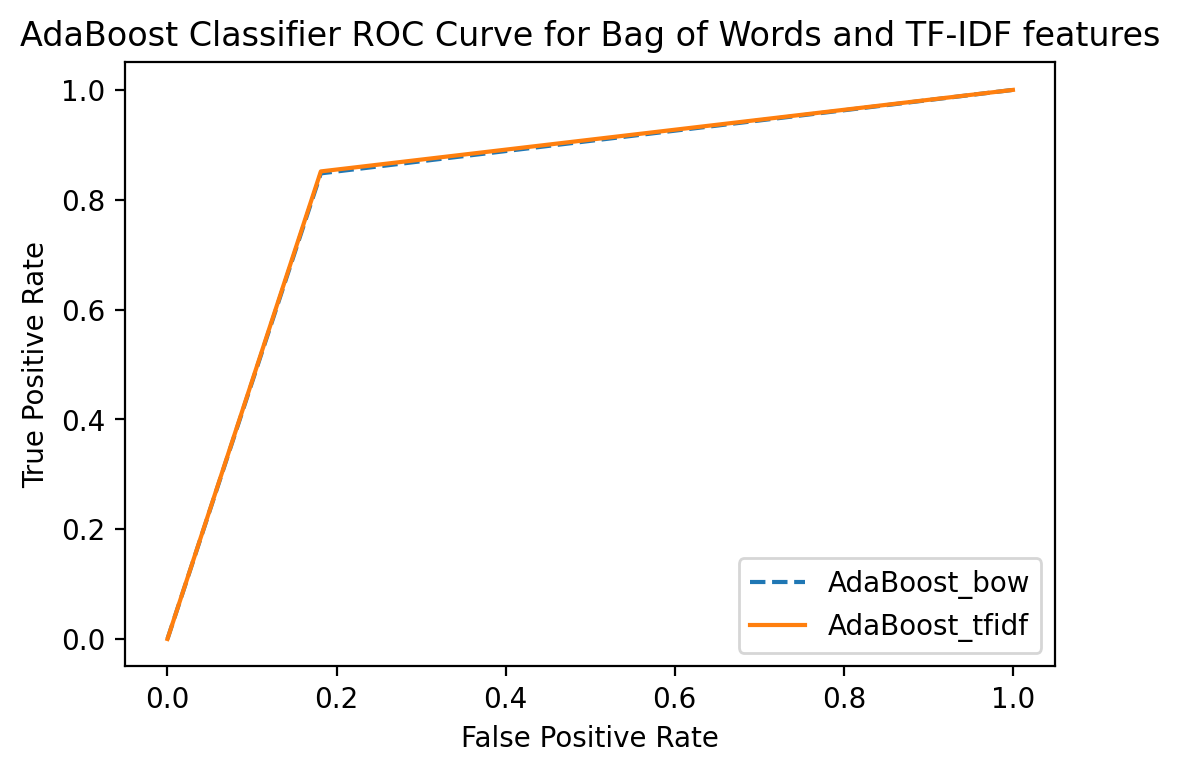

In [168]:
# ROC AUC score for Bag of Words and Tfidf features
ada_bow_roc_auc_score = roc_auc_score(y_test_sentiments, ada_bow_predictions)
ada_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, ada_tfidf_predictions)
print("ada_bow_roc_auc_score:", ada_bow_roc_auc_score)
print("ada_tfidf_roc_auc_score:", ada_tfidf_roc_auc_score)

# Calculating ROC curve
ada_fpr_bow, ada_tpr_bow, _ = roc_curve(y_test_sentiments, ada_bow_predictions)
ada_fpr_tfidf, ada_tpr_tfidf, _ = roc_curve(y_test_sentiments, ada_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(ada_fpr_bow, ada_tpr_bow, linestyle = '--', label = 'AdaBoost_bow')
plt.plot(ada_fpr_tfidf, ada_tpr_tfidf, linestyle = '-', label = 'AdaBoost_tfidf')
plt.title('AdaBoostClassifier ROC Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/ada_ROC.png')

### Precision, Recall and F1-score of AdaBoost Classifier model

In [169]:
# For Bag of Words
ada_bow_precision_score = precision_score(y_test_sentiments, ada_bow_predictions, average = 'macro')
ada_bow_recall_score = recall_score(y_test_sentiments, ada_bow_predictions, average = 'macro')
ada_bow_f1_score = f1_score(y_test_sentiments, ada_bow_predictions, average = 'macro')

print("ada_bow_precision_score:", ada_bow_precision_score)
print("ada_bow_recall_score:", ada_bow_recall_score)
print("ada_bow_f1_score:", ada_bow_f1_score)

ada_bow_precision_score: 0.8336645098045576
ada_bow_recall_score: 0.8332853370799079
ada_bow_f1_score: 0.8333250896282824


In [170]:
# For Tfidf features
ada_tfidf_precision_score = precision_score(y_test_sentiments, ada_tfidf_predictions, average = 'macro')
ada_tfidf_recall_score = recall_score(y_test_sentiments, ada_tfidf_predictions, average = 'macro')
ada_tfidf_f1_score = f1_score(y_test_sentiments, ada_tfidf_predictions, average = 'macro')

print("ada_tfidf_precision_score:", ada_tfidf_precision_score)
print("ada_tfidf_recall_score:", ada_tfidf_recall_score)
print("ada_tfidf_f1_score:", ada_tfidf_f1_score)

ada_tfidf_precision_score: 0.8355406543444456
ada_tfidf_recall_score: 0.8350714057443255
ada_tfidf_f1_score: 0.835112774657794


### Printing the classification report of AdaBoost Classifier model 

In [171]:
# Classification report for Bag of Words 
ada_bow_report = classification_report(y_test_sentiments, ada_bow_predictions, target_names = ['Positive', 'Negative'])
print(ada_bow_report)

              precision    recall  f1-score   support

    Positive       0.84      0.82      0.83      4961
    Negative       0.83      0.85      0.84      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [172]:
# Classification report for Tfidf features
ada_tfidf_report = classification_report(y_test_sentiments, ada_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(ada_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.84      0.82      0.83      4961
    Negative       0.83      0.85      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### PR AUC

ada_bow_pr_auc_score: 0.8753027146080022
ada_tfidf_pr_auc_score: 0.8764904250640037


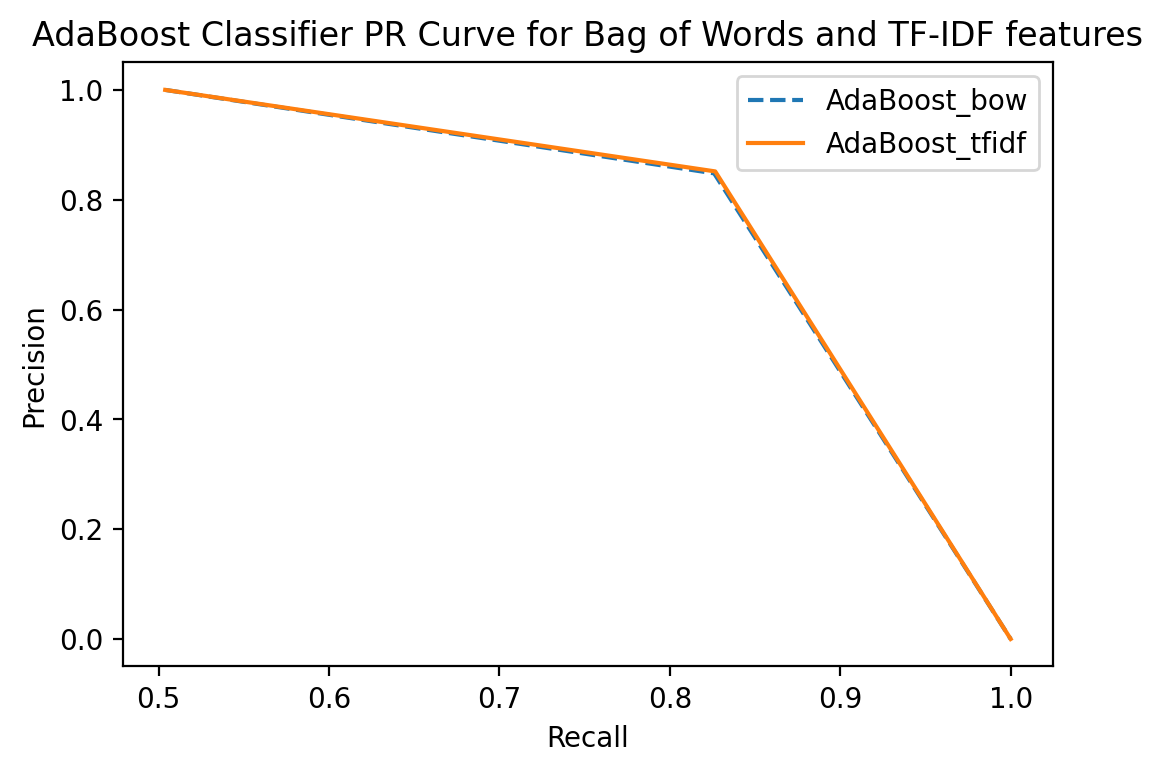

In [173]:
# Calculating PR curve for Bag of Words and Tfidf features
ada_precision_bow, ada_recall_bow, _ = precision_recall_curve(y_test_sentiments, ada_bow_predictions)
ada_precision_tfidf, ada_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, ada_tfidf_predictions)

# Calculating AUC score
ada_bow_pr_auc_score = auc(ada_recall_bow, ada_precision_bow)
ada_tfidf_pr_auc_score = auc(ada_recall_tfidf, ada_precision_tfidf)
print("ada_bow_pr_auc_score:", ada_bow_pr_auc_score)
print("ada_tfidf_pr_auc_score:", ada_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(ada_precision_bow, ada_recall_bow, linestyle = '--', label = 'AdaBoost_bow')
plt.plot(ada_precision_tfidf, ada_recall_tfidf, linestyle = '-', label = 'AdaBoost_tfidf')
plt.title('AdaBoostClassifier PR Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/ada_PR.png')

### Confusion Matrix for AdaBoost Classifier model

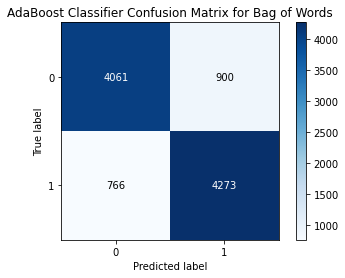

In [174]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, ada_bow_predictions)
plt.title('AdaBoostClassifier Confusion Matrix for Bag of Words')
plt.savefig('graphs/ada_confusion_matrix_bow.png')

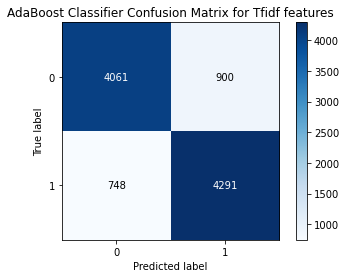

In [175]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, ada_tfidf_predictions)
plt.title('AdaBoostClassifier Confusion Matrix for Tfidf features')
plt.savefig('graphs/ada_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [176]:
# For Bag of Words
ml_default_performance_metrics_df.loc['AdaBoostClassifierBow']['Training-time'] = time.time() - start_time_ada_bow
ml_default_performance_metrics_df.loc['AdaBoostClassifierBow']['Accuracy'] = ada_bow_score
ml_default_performance_metrics_df.loc['AdaBoostClassifierBow']['ROC-AUC-score'] = ada_bow_roc_auc_score
ml_default_performance_metrics_df.loc['AdaBoostClassifierBow']['F1-score'] = ada_bow_f1_score
ml_default_performance_metrics_df.loc['AdaBoostClassifierBow']['PR-AUC-score'] = ada_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['AdaBoostClassifierTfidf']['Training-time'] = time.time() - start_time_ada_tfidf
ml_default_performance_metrics_df.loc['AdaBoostClassifierTfidf']['Accuracy'] = ada_tfidf_score
ml_default_performance_metrics_df.loc['AdaBoostClassifierTfidf']['ROC-AUC-score'] = ada_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['AdaBoostClassifierTfidf']['F1-score'] = ada_tfidf_f1_score
ml_default_performance_metrics_df.loc['AdaBoostClassifierTfidf']['PR-AUC-score'] = ada_tfidf_pr_auc_score

## 11. Extra Trees Classifier model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model

In [177]:
# Training the Extra Trees Classifier
etc = ExtraTreesClassifier(n_estimators = 100, random_state = 42)

start_time_etc_bow = time.time()

# Fitting the SGDC for Bag of Words
etc_bow = etc.fit(cv_train_reviews, y_train_sentiments)
print(etc_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_etc_bow)

start_time_etc_tfidf = time.time()

# Fitting the SGDC for Tfidf features
etc_tfidf = etc.fit(tv_train_reviews, y_train_sentiments)
print(etc_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_etc_tfidf)

ExtraTreesClassifier(random_state=42)
Training-time for Bag of Words in seconds:  3831.252076148987
ExtraTreesClassifier(random_state=42)
Training-time for TF-IDF features in seconds:  3767.282984972


## Extra Trees Classifier model performance on test data

In [178]:
# Predicting the model for Bag of Words
etc_bow_predictions = etc.predict(cv_test_reviews)
print(etc_bow_predictions)

[1 1 0 ... 1 0 0]


In [179]:
# Predicting the model for Tfidf features
etc_tfidf_predictions = etc.predict(tv_test_reviews)
print(etc_tfidf_predictions)

[1 1 0 ... 1 0 1]


### Accuracy of the Extra Trees Classifier model

In [180]:
# Accuracy score for Bag of Words
etc_bow_score = accuracy_score(y_test_sentiments, etc_bow_predictions)
print("etc_bow_score:", etc_bow_score)

etc_bow_score: 0.8638


In [181]:
# Accuracy score for Tfidf features
etc_tfidf_score = accuracy_score(y_test_sentiments, etc_tfidf_predictions)
print("etc_tfidf_score:", etc_tfidf_score)

etc_tfidf_score: 0.8719


### ROC AUC 

etc_bow_roc_auc_score: 0.8637137083420156
etc_tfidf_roc_auc_score: 0.8718212216031223


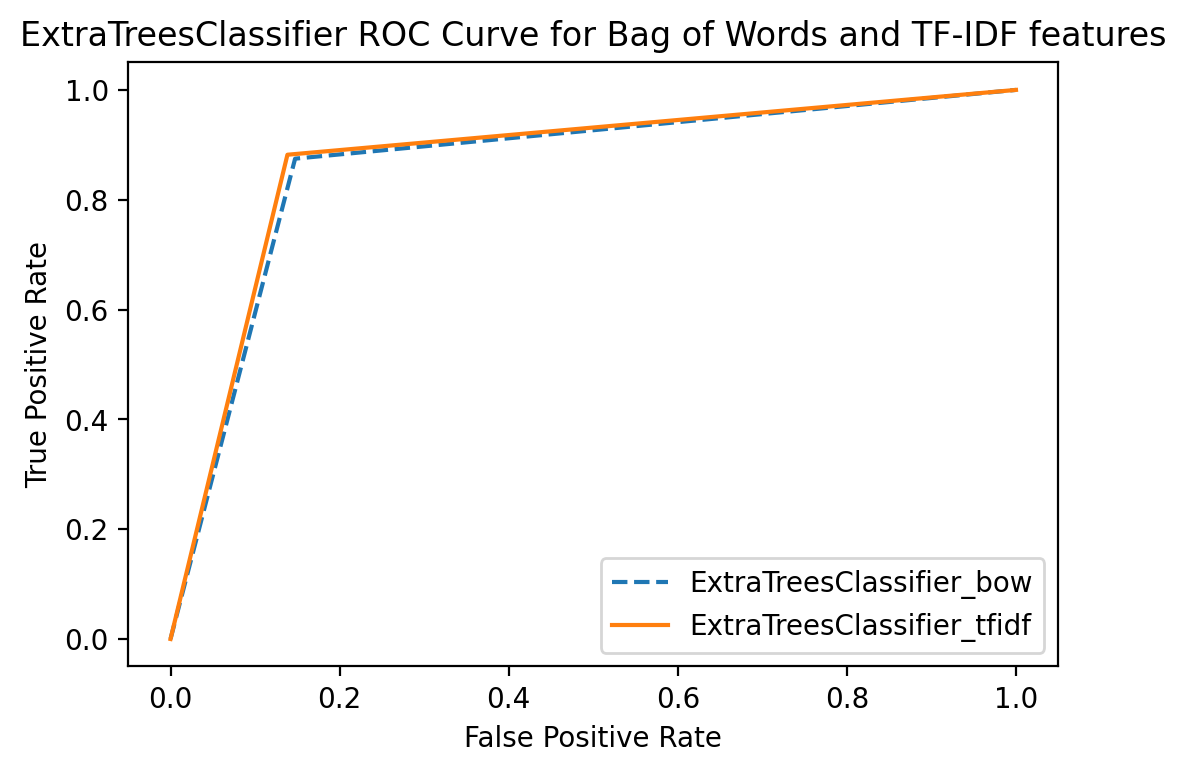

In [182]:
# ROC AUC score for Bag of Words and Tfidf features
etc_bow_roc_auc_score = roc_auc_score(y_test_sentiments, etc_bow_predictions)
etc_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, etc_tfidf_predictions)
print("etc_bow_roc_auc_score:", etc_bow_roc_auc_score)
print("etc_tfidf_roc_auc_score:", etc_tfidf_roc_auc_score)

# Calculating ROC curve
etc_fpr_bow, etc_tpr_bow, _ = roc_curve(y_test_sentiments, etc_bow_predictions)
etc_fpr_tfidf, etc_tpr_tfidf, _ = roc_curve(y_test_sentiments, etc_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(etc_fpr_bow, etc_tpr_bow, linestyle = '--', label = 'ExtraTreesClassifier_bow')
plt.plot(etc_fpr_tfidf, etc_tpr_tfidf, linestyle = '-', label = 'ExtraTreesClassifier_tfidf')
plt.title('ExtraTreesClassifier ROC Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/etc_ROC.png')

### Precision, Recall and F1-score of Extra Trees Classifier model

In [183]:
etc_bow_precision_score = precision_score(y_test_sentiments, etc_bow_predictions, average = 'macro')
etc_bow_recall_score = recall_score(y_test_sentiments, etc_bow_predictions, average = 'macro')
etc_bow_f1_score = f1_score(y_test_sentiments, etc_bow_predictions, average = 'macro')

print("etc_bow_precision_score:", etc_bow_precision_score)
print("etc_bow_recall_score:", etc_bow_recall_score)
print("etc_bow_f1_score:", etc_bow_f1_score)

etc_bow_precision_score: 0.8639728727950109
etc_bow_recall_score: 0.8637137083420156
etc_bow_f1_score: 0.8637568327148775


In [184]:
# For Tfidf features
etc_tfidf_precision_score = precision_score(y_test_sentiments, etc_tfidf_predictions, average = 'macro')
etc_tfidf_recall_score = recall_score(y_test_sentiments, etc_tfidf_predictions, average = 'macro')
etc_tfidf_f1_score = f1_score(y_test_sentiments, etc_tfidf_predictions, average = 'macro')

print("etc_tfidf_precision_score:", etc_tfidf_precision_score)
print("etc_tfidf_recall_score:", etc_tfidf_recall_score)
print("etc_tfidf_f1_score:", etc_tfidf_f1_score)

etc_tfidf_precision_score: 0.8720501058715693
etc_tfidf_recall_score: 0.8718212216031223
etc_tfidf_f1_score: 0.8718634029065041


### Printing the classification report of Extra Trees Classifier model 

In [185]:
# Classification report for Bag of Words 
etc_bow_report = classification_report(y_test_sentiments, etc_bow_predictions, target_names = ['Positive', 'Negative'])
print(etc_bow_report)

              precision    recall  f1-score   support

    Positive       0.87      0.85      0.86      4961
    Negative       0.86      0.87      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [186]:
# Classification report for Tfidf features
etc_tfidf_report = classification_report(y_test_sentiments, etc_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(etc_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.88      0.86      0.87      4961
    Negative       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### PR AUC

etc_bow_pr_auc_score: 0.8978155841741287
etc_tfidf_pr_auc_score: 0.9038489095967632


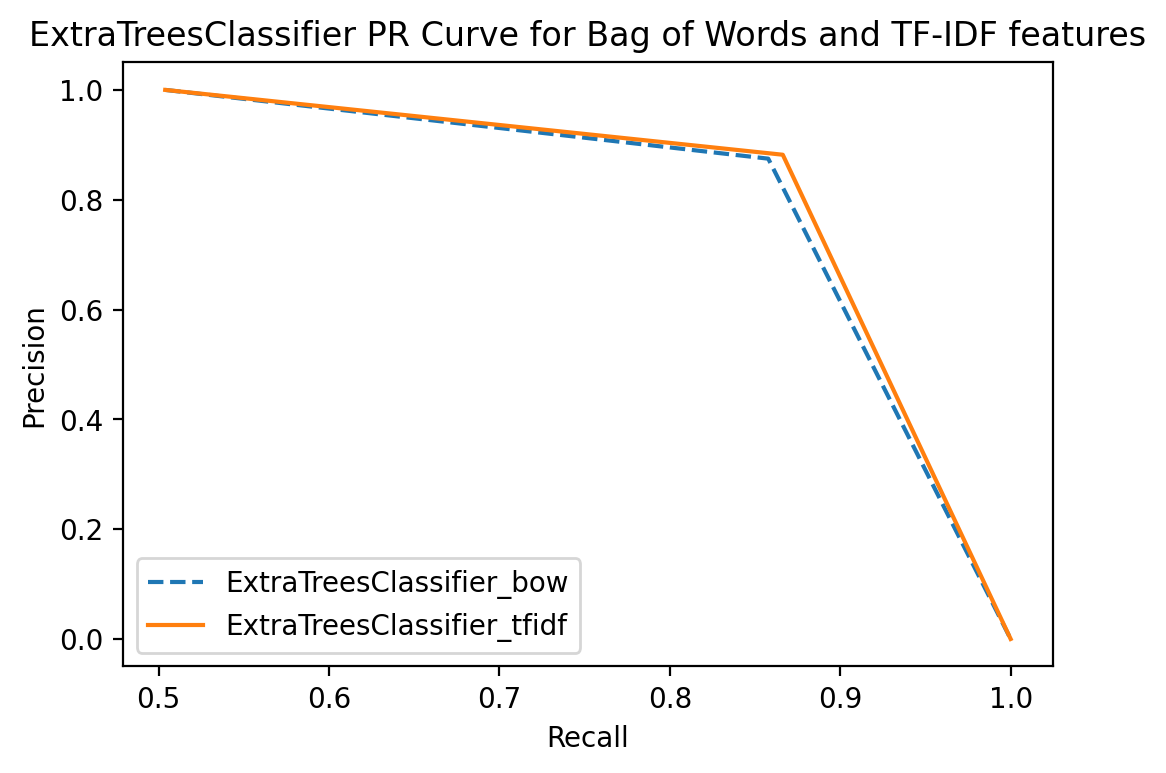

In [187]:
# Calculating PR curve for Bag of Words and Tfidf features
etc_precision_bow, etc_recall_bow, _ = precision_recall_curve(y_test_sentiments, etc_bow_predictions)
etc_precision_tfidf, etc_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, etc_tfidf_predictions)

# Calculating AUC score
etc_bow_pr_auc_score = auc(etc_recall_bow, etc_precision_bow)
etc_tfidf_pr_auc_score = auc(etc_recall_tfidf, etc_precision_tfidf)
print("etc_bow_pr_auc_score:", etc_bow_pr_auc_score)
print("etc_tfidf_pr_auc_score:", etc_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(etc_precision_bow, etc_recall_bow, linestyle = '--', label = 'ExtraTreesClassifier_bow')
plt.plot(etc_precision_tfidf, etc_recall_tfidf, linestyle = '-', label = 'ExtraTreesClassifier_tfidf')
plt.title('ExtraTreesClassifier PR Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/etc_PR.png')

### Confusion Matrix for Extra Trees Classifier model

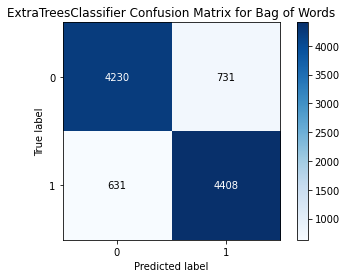

In [188]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, etc_bow_predictions)
plt.title('ExtraTreesClassifier Confusion Matrix for Bag of Words')
plt.savefig('graphs/etc_confusion_matrix_bow.png')

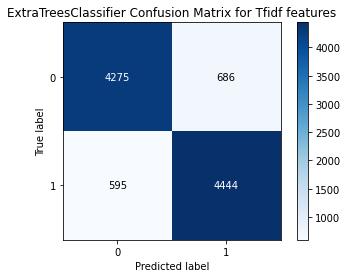

In [189]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, etc_tfidf_predictions)
plt.title('ExtraTreesClassifier Confusion Matrix for Tfidf features')
plt.savefig('graphs/etc_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [190]:
# For Bag of Words
ml_default_performance_metrics_df.loc['ExtraTreesClassifierBow']['Training-time'] = time.time() - start_time_etc_bow
ml_default_performance_metrics_df.loc['ExtraTreesClassifierBow']['Accuracy'] = etc_bow_score
ml_default_performance_metrics_df.loc['ExtraTreesClassifierBow']['ROC-AUC-score'] = etc_bow_roc_auc_score
ml_default_performance_metrics_df.loc['ExtraTreesClassifierBow']['F1-score'] = etc_bow_f1_score
ml_default_performance_metrics_df.loc['ExtraTreesClassifierBow']['PR-AUC-score'] = etc_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['ExtraTreesClassifierTfidf']['Training-time'] = time.time() - start_time_etc_tfidf
ml_default_performance_metrics_df.loc['ExtraTreesClassifierTfidf']['Accuracy'] = etc_tfidf_score
ml_default_performance_metrics_df.loc['ExtraTreesClassifierTfidf']['ROC-AUC-score'] = etc_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['ExtraTreesClassifierTfidf']['F1-score'] = etc_tfidf_f1_score
ml_default_performance_metrics_df.loc['ExtraTreesClassifierTfidf']['PR-AUC-score'] = etc_tfidf_pr_auc_score

## 12. Gradient Boosting Classifier model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model

In [191]:
# Training the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(loss = 'deviance', n_estimators = 100, random_state = 42)

start_time_gbc_bow = time.time()

# Fitting the SGDC for Bag of Words
gbc_bow = gbc.fit(cv_train_reviews, y_train_sentiments)
print(gbc_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_gbc_bow)

start_time_gbc_tfidf = time.time()

# Fitting the SGDC for Tfidf features
gbc_tfidf = gbc.fit(tv_train_reviews, y_train_sentiments)
print(gbc_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_gbc_tfidf)

GradientBoostingClassifier(random_state=42)
Training-time for Bag of Words in seconds:  1590.2935228347778
GradientBoostingClassifier(random_state=42)
Training-time for TF-IDF features in seconds:  1632.616247177124


## Gradient Boosting Classifier model performance on test data

In [192]:
# Predicting the model for Bag of Words
gbc_bow_predictions = gbc.predict(cv_test_reviews)
print(gbc_bow_predictions)

[1 0 0 ... 1 0 1]


In [193]:
# Predicting the model for Tfidf features
gbc_tfidf_predictions = gbc.predict(tv_test_reviews)
print(gbc_tfidf_predictions)

[1 0 0 ... 1 0 1]


### Accuracy of the Stochastic Gradient Descent model

In [194]:
# Accuracy score for Bag of Words
gbc_bow_score = accuracy_score(y_test_sentiments, gbc_bow_predictions)
print("gbc_bow_score:", gbc_bow_score)

gbc_bow_score: 0.8057


In [195]:
# Accuracy score for Tfidf features
gbc_tfidf_score = accuracy_score(y_test_sentiments, gbc_tfidf_predictions)
print("gbc_tfidf_score:", gbc_tfidf_score)

gbc_tfidf_score: 0.8085


### ROC AUC

gbc_bow_roc_auc_score: 0.8053738189431444
gbc_tfidf_roc_auc_score: 0.8082098714885815


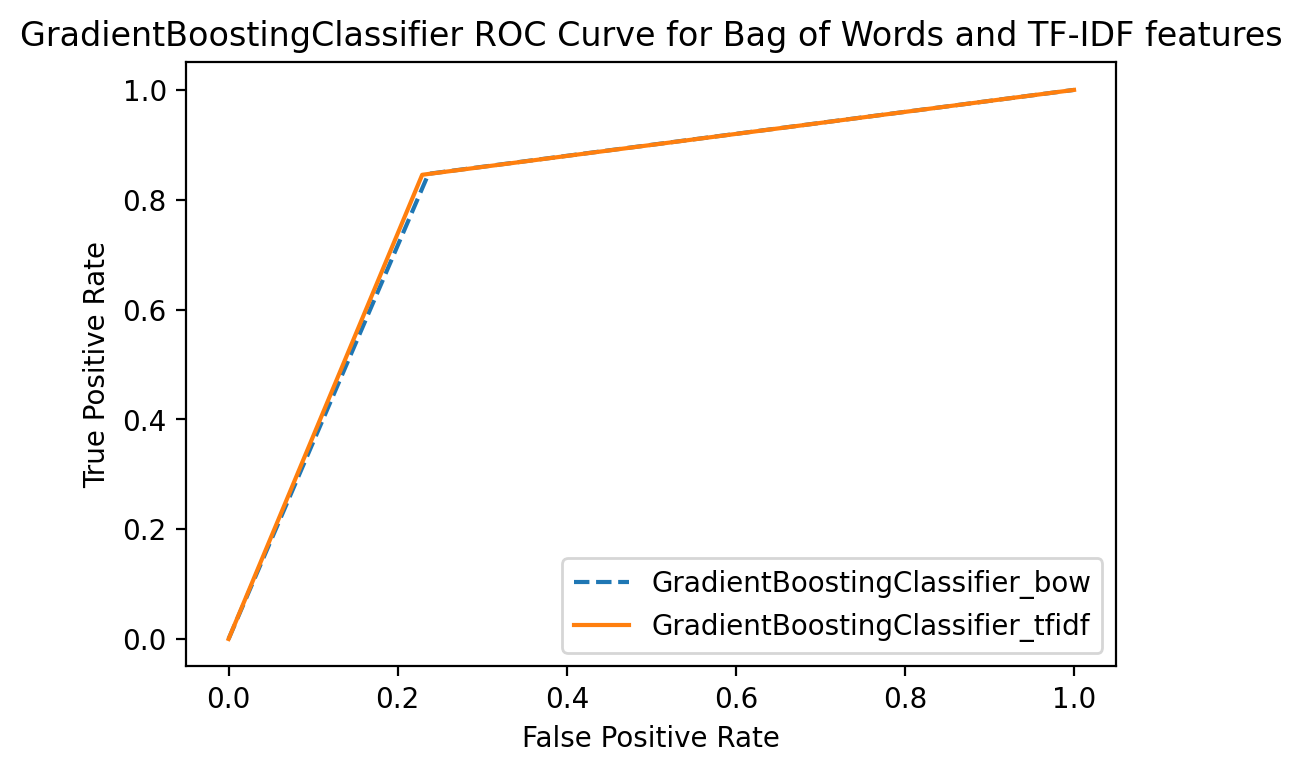

In [196]:
# ROC AUC score for Bag of Words and Tfidf features
gbc_bow_roc_auc_score = roc_auc_score(y_test_sentiments, gbc_bow_predictions)
gbc_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, gbc_tfidf_predictions)
print("gbc_bow_roc_auc_score:", gbc_bow_roc_auc_score)
print("gbc_tfidf_roc_auc_score:", gbc_tfidf_roc_auc_score)

# Calculating ROC curve
gbc_fpr_bow, gbc_tpr_bow, _ = roc_curve(y_test_sentiments, gbc_bow_predictions)
gbc_fpr_tfidf, gbc_tpr_tfidf, _ = roc_curve(y_test_sentiments, gbc_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(gbc_fpr_bow, gbc_tpr_bow, linestyle = '--', label = 'GradientBoostingClassifier_bow')
plt.plot(gbc_fpr_tfidf, gbc_tpr_tfidf, linestyle = '-', label = 'GradientBoostingClassifier_tfidf')
plt.title('GradientBoostingClassifier ROC Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/gbc_ROC.png')

### Precision, Recall and F1-score of Logistic Regression model

In [197]:
gbc_bow_precision_score = precision_score(y_test_sentiments, gbc_bow_predictions, average = 'macro')
gbc_bow_recall_score = recall_score(y_test_sentiments, gbc_bow_predictions, average = 'macro')
gbc_bow_f1_score = f1_score(y_test_sentiments, gbc_bow_predictions, average = 'macro')

print("gbc_bow_precision_score:", gbc_bow_precision_score)
print("gbc_bow_recall_score:", gbc_bow_recall_score)
print("gbc_bow_f1_score:", gbc_bow_f1_score)

gbc_bow_precision_score: 0.8077602509466375
gbc_bow_recall_score: 0.8053738189431445
gbc_bow_f1_score: 0.8052494231178196


In [198]:
# For Tfidf features
gbc_tfidf_precision_score = precision_score(y_test_sentiments, gbc_tfidf_predictions, average = 'macro')
gbc_tfidf_recall_score = recall_score(y_test_sentiments, gbc_tfidf_predictions, average = 'macro')
gbc_tfidf_f1_score = f1_score(y_test_sentiments, gbc_tfidf_predictions, average = 'macro')

print("gbc_tfidf_precision_score:", gbc_tfidf_precision_score)
print("gbc_tfidf_recall_score:", gbc_tfidf_recall_score)
print("gbc_tfidf_f1_score:", gbc_tfidf_f1_score)

gbc_tfidf_precision_score: 0.8101364945813709
gbc_tfidf_recall_score: 0.8082098714885814
gbc_tfidf_f1_score: 0.8081369471382223


### Printing the classification report of Gradient Boosting Classifier model 

In [199]:
# Classification report for Bag of Words 
gbc_bow_report = classification_report(y_test_sentiments, gbc_bow_predictions, target_names = ['Positive', 'Negative'])
print(gbc_bow_report)

              precision    recall  f1-score   support

    Positive       0.83      0.76      0.80      4961
    Negative       0.78      0.85      0.81      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [200]:
# Classification report for Tfidf features
gbc_tfidf_report = classification_report(y_test_sentiments, gbc_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(gbc_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.83      0.77      0.80      4961
    Negative       0.79      0.85      0.82      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



### PR AUC

gbc_bow_pr_auc_score: 0.8543230739591714
gbc_tfidf_pr_auc_score: 0.8563897593507483


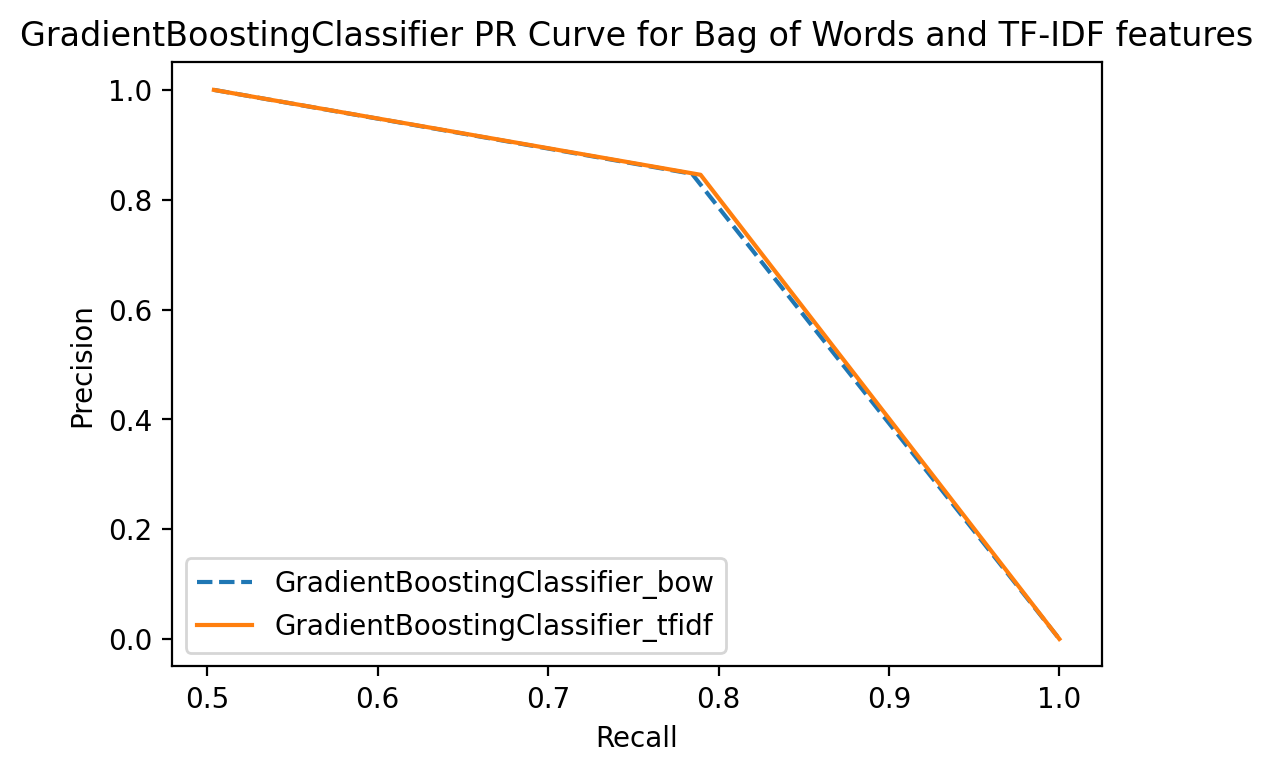

In [201]:
# Calculating PR curve for Bag of Words and Tfidf features
gbc_precision_bow, gbc_recall_bow, _ = precision_recall_curve(y_test_sentiments, gbc_bow_predictions)
gbc_precision_tfidf, gbc_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, gbc_tfidf_predictions)

# Calculating AUC score
gbc_bow_pr_auc_score = auc(gbc_recall_bow, gbc_precision_bow)
gbc_tfidf_pr_auc_score = auc(gbc_recall_tfidf, gbc_precision_tfidf)
print("gbc_bow_pr_auc_score:", gbc_bow_pr_auc_score)
print("gbc_tfidf_pr_auc_score:", gbc_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(gbc_precision_bow, gbc_recall_bow, linestyle = '--', label = 'GradientBoostingClassifier_bow')
plt.plot(gbc_precision_tfidf, gbc_recall_tfidf, linestyle = '-', label = 'GradientBoostingClassifier_tfidf')
plt.title('GradientBoostingClassifier PR Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/gbc_PR.png')

### Confusion Matrix for Gradient Boosting Classifier model

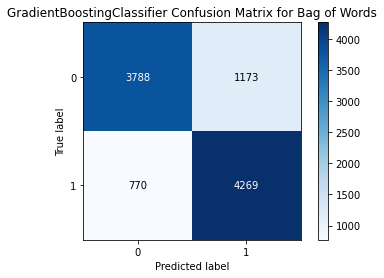

In [202]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, gbc_bow_predictions)
plt.title('GradientBoostingClassifier Confusion Matrix for Bag of Words')
plt.savefig('graphs/gbc_confusion_matrix_bow.png')

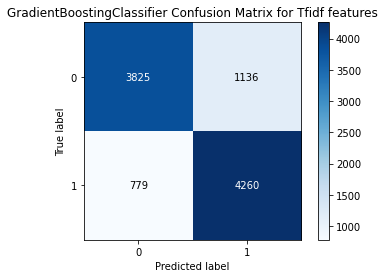

In [203]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, gbc_tfidf_predictions)
plt.title('GradientBoostingClassifier Confusion Matrix for Tfidf features')
plt.savefig('graphs/gbc_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [204]:
# For Bag of Words
ml_default_performance_metrics_df.loc['GradientBoostingClassifierBow']['Training-time'] = time.time() - start_time_gbc_bow
ml_default_performance_metrics_df.loc['GradientBoostingClassifierBow']['Accuracy'] = gbc_bow_score
ml_default_performance_metrics_df.loc['GradientBoostingClassifierBow']['ROC-AUC-score'] = gbc_bow_roc_auc_score
ml_default_performance_metrics_df.loc['GradientBoostingClassifierBow']['F1-score'] = gbc_bow_f1_score
ml_default_performance_metrics_df.loc['GradientBoostingClassifierBow']['PR-AUC-score'] = gbc_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['GradientBoostingClassifierTfidf']['Training-time'] = time.time() - start_time_gbc_tfidf
ml_default_performance_metrics_df.loc['GradientBoostingClassifierTfidf']['Accuracy'] = gbc_tfidf_score
ml_default_performance_metrics_df.loc['GradientBoostingClassifierTfidf']['ROC-AUC-score'] = gbc_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['GradientBoostingClassifierTfidf']['F1-score'] = gbc_tfidf_f1_score
ml_default_performance_metrics_df.loc['GradientBoostingClassifierTfidf']['PR-AUC-score'] = gbc_tfidf_pr_auc_score

## 13. Random Forest Classifier model for both Bag of Words and TF-IDF train and test dataset
### Training and fitting the model 

In [205]:
# Training the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)

start_time_rfc_bow = time.time()

# Fitting the Random Forest Classifier for Bag of Words
rfc_bow = rfc.fit(cv_train_reviews, y_train_sentiments)
print(rfc_bow)
print("Training-time for Bag of Words in seconds: ", time.time() - start_time_rfc_bow)

start_time_rfc_tfidf = time.time()

# Fitting the Random Forest Classifier for Tfidf features
rfc_tfidf = rfc.fit(tv_train_reviews, y_train_sentiments)
print(rfc_tfidf)
print("Training-time for TF-IDF features in seconds: ", time.time() - start_time_rfc_tfidf)

RandomForestClassifier(n_jobs=-1, random_state=42)
Training-time for Bag of Words in seconds:  977.4545443058014
RandomForestClassifier(n_jobs=-1, random_state=42)
Training-time for TF-IDF features in seconds:  825.2792365550995


## Random Forest Classifier model performance on test data

In [206]:
# Predicting the model for Bag of Words
rfc_bow_predictions = rfc.predict(cv_test_reviews)
print(rfc_bow_predictions)

[0 1 0 ... 1 0 1]


In [207]:
# Predicting the model for Tfidf features
rfc_tfidf_predictions = rfc.predict(tv_test_reviews)
print(rfc_tfidf_predictions)

[0 0 0 ... 1 0 1]


### Accuracy of the Random Forest Classifier model

In [208]:
# Accuracy score for Bag of Words
rfc_bow_score = accuracy_score(y_test_sentiments, rfc_bow_predictions)
print("rfc_bow_score:", rfc_bow_score)

rfc_bow_score: 0.8413


In [209]:
# Accuracy score for Tfidf features
rfc_tfidf_score = accuracy_score(y_test_sentiments, rfc_tfidf_predictions)
print("rfc_tfidf_score:", rfc_tfidf_score)

rfc_tfidf_score: 0.8533


### ROC AUC 

rfc_bow_roc_auc_score: 0.8412146795011007
rfc_tfidf_roc_auc_score: 0.8532996547509951


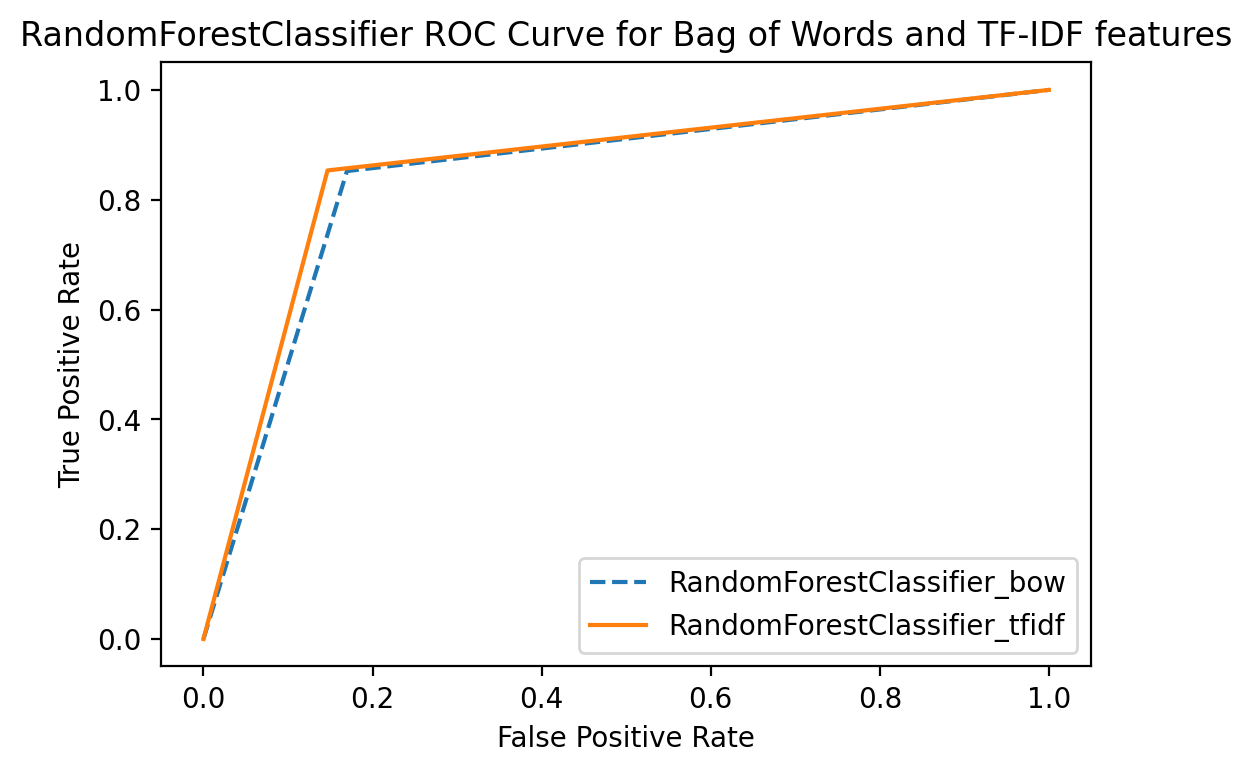

In [210]:
# ROC AUC score for Bag of Words and Tfidf features
rfc_bow_roc_auc_score = roc_auc_score(y_test_sentiments, rfc_bow_predictions)
rfc_tfidf_roc_auc_score = roc_auc_score(y_test_sentiments, rfc_tfidf_predictions)
print("rfc_bow_roc_auc_score:", rfc_bow_roc_auc_score)
print("rfc_tfidf_roc_auc_score:", rfc_tfidf_roc_auc_score)

# Calculating ROC curve
rfc_fpr_bow, rfc_tpr_bow, _ = roc_curve(y_test_sentiments, rfc_bow_predictions)
rfc_fpr_tfidf, rfc_tpr_tfidf, _ = roc_curve(y_test_sentiments, rfc_tfidf_predictions)

# Plot the ROC curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(rfc_fpr_bow, rfc_tpr_bow, linestyle = '--', label = 'RandomForestClassifier_bow')
plt.plot(rfc_fpr_tfidf, rfc_tpr_tfidf, linestyle = '-', label = 'RandomForestClassifier_tfidf')
plt.title('RandomForestClassifier ROC Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show the legend
plt.legend()

fig.savefig('graphs/rfc_ROC.png')

### Precision, Recall and F1-score of Random Forest Classifier model

In [211]:
# For Bag of Words
rfc_bow_precision_score = precision_score(y_test_sentiments, rfc_bow_predictions, average = 'macro')
rfc_bow_recall_score = recall_score(y_test_sentiments, rfc_bow_predictions, average = 'macro')
rfc_bow_f1_score = f1_score(y_test_sentiments, rfc_bow_predictions, average = 'macro')

print("rfc_bow_precision_score:", rfc_bow_precision_score)
print("rfc_bow_recall_score:", rfc_bow_recall_score)
print("rfc_bow_f1_score:", rfc_bow_f1_score)

rfc_bow_precision_score: 0.84144653580505
rfc_bow_recall_score: 0.8412146795011008
rfc_bow_f1_score: 0.8412513832361161


In [212]:
# For Tfidf features
rfc_tfidf_precision_score = precision_score(y_test_sentiments, rfc_tfidf_predictions, average = 'macro')
rfc_tfidf_recall_score = recall_score(y_test_sentiments, rfc_tfidf_predictions, average = 'macro')
rfc_tfidf_f1_score = f1_score(y_test_sentiments, rfc_tfidf_predictions, average = 'macro')

print("rfc_tfidf_precision_score:", rfc_tfidf_precision_score)
print("rfc_tfidf_recall_score:", rfc_tfidf_recall_score)
print("rfc_tfidf_f1_score:", rfc_tfidf_f1_score)

rfc_tfidf_precision_score: 0.8532892391505398
rfc_tfidf_recall_score: 0.853299654750995
rfc_tfidf_f1_score: 0.8532934143413697


### Printing the classification report of Random Forest Classifier model 

In [213]:
# Classification report for Bag of Words 
rfc_bow_report = classification_report(y_test_sentiments, rfc_bow_predictions, target_names = ['Positive', 'Negative'])
print(rfc_bow_report)

              precision    recall  f1-score   support

    Positive       0.85      0.83      0.84      4961
    Negative       0.84      0.85      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [214]:
# Classification report for Tfidf features
rfc_tfidf_report = classification_report(y_test_sentiments, rfc_tfidf_predictions, target_names = ['Positive', 'Negative'])
print(rfc_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.85      0.85      0.85      4961
    Negative       0.86      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### PR AUC

rfc_bow_pr_auc_score: 0.8813561975160724
rfc_tfidf_pr_auc_score: 0.891227368427617


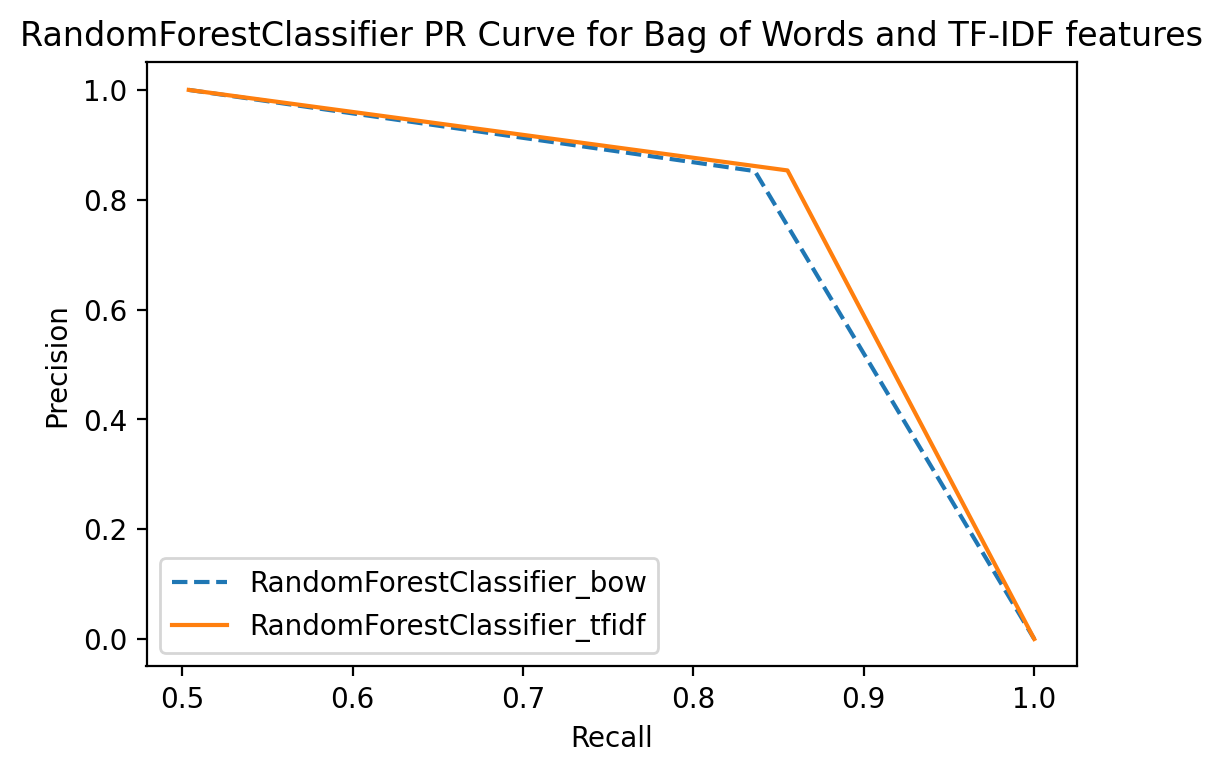

In [215]:
# Calculating PR curve for Bag of Words and Tfidf features
rfc_precision_bow, rfc_recall_bow, _ = precision_recall_curve(y_test_sentiments, rfc_bow_predictions)
rfc_precision_tfidf, rfc_recall_tfidf, _ = precision_recall_curve(y_test_sentiments, rfc_tfidf_predictions)

# Calculating AUC score
rfc_bow_pr_auc_score = auc(rfc_recall_bow, rfc_precision_bow)
rfc_tfidf_pr_auc_score = auc(rfc_recall_tfidf, rfc_precision_tfidf)
print("rfc_bow_pr_auc_score:", rfc_bow_pr_auc_score)
print("rfc_tfidf_pr_auc_score:", rfc_tfidf_pr_auc_score)

# Plot the PR curve for Bag of Words and Tfidf features
fig = plt.figure(dpi = 200)
plt.plot(rfc_precision_bow, rfc_recall_bow, linestyle = '--', label = 'RandomForestClassifier_bow')
plt.plot(rfc_precision_tfidf, rfc_recall_tfidf, linestyle = '-', label = 'RandomForestClassifier_tfidf')
plt.title('RandomForestClassifier PR Curve for Bag of Words and TF-IDF features')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

fig.savefig('graphs/rfc_PR.png')

### Confusion Matrix for Random Forest Classifier model

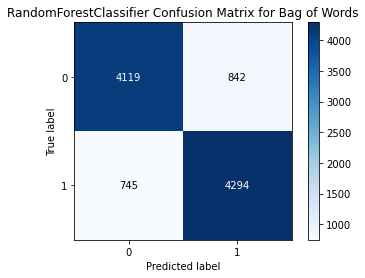

In [216]:
# Confusion matrix for Bag of Words
skplt.metrics.plot_confusion_matrix(y_test_sentiments, rfc_bow_predictions)
plt.title('RandomForestClassifier Confusion Matrix for Bag of Words')
plt.savefig('graphs/rfc_confusion_matrix_bow.png')

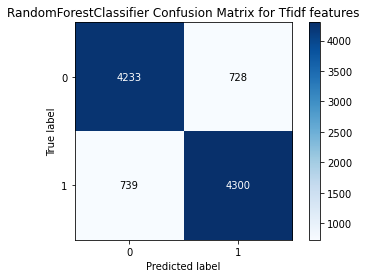

In [217]:
# Confusion matrix for Tfidf features
skplt.metrics.plot_confusion_matrix(y_test_sentiments, rfc_tfidf_predictions)
plt.title('RandomForestClassifier Confusion Matrix for Tfidf features')
plt.savefig('graphs/rfc_confusion_matrix_tfidf.png')

### Loading the results of evaluation metrics into our dataframe

In [218]:
# For Bag of Words
ml_default_performance_metrics_df.loc['RandomForestClassifierBow']['Training-time'] = time.time() - start_time_rfc_bow
ml_default_performance_metrics_df.loc['RandomForestClassifierBow']['Accuracy'] = rfc_bow_score
ml_default_performance_metrics_df.loc['RandomForestClassifierBow']['ROC-AUC-score'] = rfc_bow_roc_auc_score
ml_default_performance_metrics_df.loc['RandomForestClassifierBow']['F1-score'] = rfc_bow_f1_score
ml_default_performance_metrics_df.loc['RandomForestClassifierBow']['PR-AUC-score'] = rfc_bow_pr_auc_score

# For TF-IDF features
ml_default_performance_metrics_df.loc['RandomForestClassifierTfidf']['Training-time'] = time.time() - start_time_rfc_tfidf
ml_default_performance_metrics_df.loc['RandomForestClassifierTfidf']['Accuracy'] = rfc_tfidf_score
ml_default_performance_metrics_df.loc['RandomForestClassifierTfidf']['ROC-AUC-score'] = rfc_tfidf_roc_auc_score
ml_default_performance_metrics_df.loc['RandomForestClassifierTfidf']['F1-score'] = rfc_tfidf_f1_score
ml_default_performance_metrics_df.loc['RandomForestClassifierTfidf']['PR-AUC-score'] = rfc_tfidf_pr_auc_score

### Dropping LinearDiscriminantAnalysis and QuadraticDiscriminantAnalysis models from the dataframe
These classifiers cannot take sparse matrix as input for X_test. 

In [222]:
ml_default_performance_metrics_df = ml_default_performance_metrics_df.drop(['LinearDiscriminantAnalysisBow', 'LinearDiscriminantAnalysisTfidf', 'QuadraticDiscriminantAnalysisBow', 'QuadraticDiscriminantAnalysisTfidf'])

### Summary of results of Evaluation Metrics for all models used so far

In [223]:
ml_default_performance_metrics_df

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LogisticRegressionBow,298.272027,0.8583,0.858298,0.858293,0.894922
LogisticRegressionTfidf,90.783251,0.8852,0.88509,0.885149,0.91311
SGDClassifierBow,5.139201,0.8595,0.859665,0.85947,0.898572
SGDClassifierTfidf,3.372983,0.8848,0.884667,0.884734,0.912472
SVCbow,163.760995,0.4961,0.5,0.331595,0.894922
SVCtfidf,122.15058,0.7522,0.752041,0.75203,0.816121
NuSVCbow,3964.969529,0.5039,0.5,0.335062,0.75195
NuSVCtfidf,2380.969147,0.8495,0.849312,0.849358,0.886304
LinearSVCbow,36.721645,0.8828,0.88257,0.882645,0.909742
LinearSVCtfidf,5.79379,0.9033,0.903164,0.903242,0.925853


### Dividing our dataframe into Bag of Words and TF-IDF as Feature Extraction

In [227]:
ml_default_performance_metrics_df_bow = ml_default_performance_metrics_df.loc[['LogisticRegressionBow', 'SGDClassifierBow', 'SVCbow', 'NuSVCbow', 'LinearSVCbow', 'KNeighborsClassifierBow', 'MultinomialNBbow', 'BernoulliNBbow', 'DecisionTreeClassifierBow', 'AdaBoostClassifierBow', 'ExtraTreesClassifierBow', 'GradientBoostingClassifierBow', 'RandomForestClassifierBow']]
ml_default_performance_metrics_df_tfidf = ml_default_performance_metrics_df.loc[['LogisticRegressionTfidf', 'SGDClassifierTfidf', 'SVCtfidf', 'NuSVCtfidf', 'LinearSVCtfidf', 'KNeighborsClassifierTfidf', 'MultinomialNBtfidf', 'BernoulliNBtfidf', 'DecisionTreeClassifierTfidf', 'AdaBoostClassifierTfidf', 'ExtraTreesClassifierTfidf', 'GradientBoostingClassifierTfidf', 'RandomForestClassifierTfidf']]

In [228]:
# Bag of Words Dataframe
ml_default_performance_metrics_df_bow

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LogisticRegressionBow,298.272027,0.8583,0.858298,0.858293,0.894922
SGDClassifierBow,5.139201,0.8595,0.859665,0.85947,0.898572
SVCbow,163.760995,0.4961,0.5,0.331595,0.894922
NuSVCbow,3964.969529,0.5039,0.5,0.335062,0.75195
LinearSVCbow,36.721645,0.8828,0.88257,0.882645,0.909742
KNeighborsClassifierBow,66.799335,0.7731,0.772475,0.771405,0.83237
MultinomialNBbow,3.15133,0.8783,0.878552,0.878221,0.914888
BernoulliNBbow,3.856239,0.8548,0.855531,0.853693,0.910129
DecisionTreeClassifierBow,3035.695337,0.6117,0.611964,0.611371,0.70723
AdaBoostClassifierBow,975.117593,0.8334,0.833285,0.833325,0.875303


In [229]:
# TF-IDF Dataframe
ml_default_performance_metrics_df_tfidf

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LogisticRegressionTfidf,90.783251,0.8852,0.88509,0.885149,0.91311
SGDClassifierTfidf,3.372983,0.8848,0.884667,0.884734,0.912472
SVCtfidf,122.15058,0.7522,0.752041,0.75203,0.816121
NuSVCtfidf,2380.969147,0.8495,0.849312,0.849358,0.886304
LinearSVCtfidf,5.79379,0.9033,0.903164,0.903242,0.925853
KNeighborsClassifierTfidf,66.758479,0.7907,0.790193,0.789637,0.843913
MultinomialNBtfidf,2.532441,0.8903,0.890377,0.890299,0.920183
BernoulliNBtfidf,3.156091,0.8548,0.855531,0.853693,0.910129
DecisionTreeClassifierTfidf,1411.875999,0.683,0.683196,0.682876,0.763283
AdaBoostClassifierTfidf,512.153907,0.8352,0.835071,0.835113,0.87649


### Summarizing ML models based on their accuracy score

In [230]:
ml_default_performance_metrics_df.sort_values(by = "Accuracy", ascending = False)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LinearSVCtfidf,5.79379,0.9033,0.903164,0.903242,0.925853
MultinomialNBtfidf,2.532441,0.8903,0.890377,0.890299,0.920183
LogisticRegressionTfidf,90.783251,0.8852,0.88509,0.885149,0.91311
SGDClassifierTfidf,3.372983,0.8848,0.884667,0.884734,0.912472
LinearSVCbow,36.721645,0.8828,0.88257,0.882645,0.909742
MultinomialNBbow,3.15133,0.8783,0.878552,0.878221,0.914888
ExtraTreesClassifierTfidf,3783.568272,0.8719,0.871821,0.871863,0.903849
ExtraTreesClassifierBow,7614.815355,0.8638,0.863714,0.863757,0.897816
SGDClassifierBow,5.139201,0.8595,0.859665,0.85947,0.898572
LogisticRegressionBow,298.272027,0.8583,0.858298,0.858293,0.894922


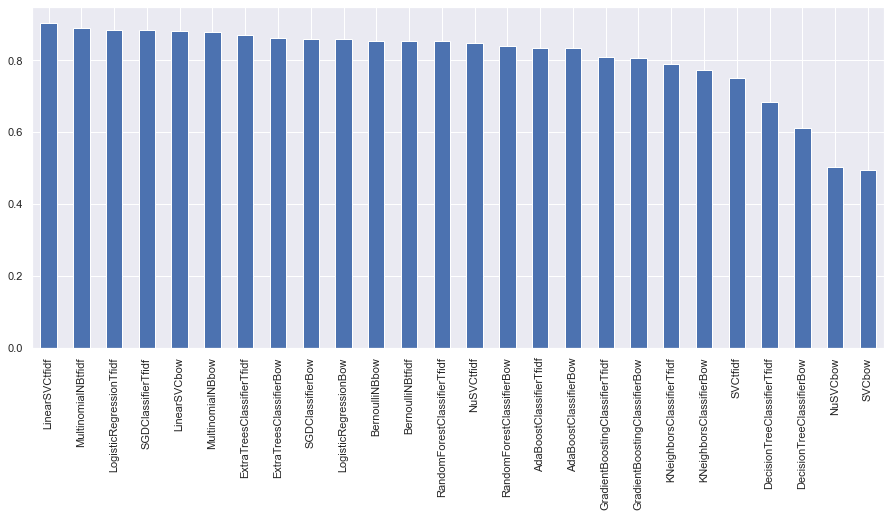

In [238]:
# Plotting above results
import seaborn as sns

sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df.sort_values(by = "Accuracy", ascending = False).Accuracy.plot(kind = "bar")
plt.savefig('graphs/metrics_by_accuracy.png')

### Summarizing ML models based on their accuracy score with Bag of Words as Feature Extraction

In [239]:
ml_default_performance_metrics_df_bow.sort_values(by = "Accuracy", ascending = False)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LinearSVCbow,36.721645,0.8828,0.88257,0.882645,0.909742
MultinomialNBbow,3.15133,0.8783,0.878552,0.878221,0.914888
ExtraTreesClassifierBow,7614.815355,0.8638,0.863714,0.863757,0.897816
SGDClassifierBow,5.139201,0.8595,0.859665,0.85947,0.898572
LogisticRegressionBow,298.272027,0.8583,0.858298,0.858293,0.894922
BernoulliNBbow,3.856239,0.8548,0.855531,0.853693,0.910129
RandomForestClassifierBow,2013.443535,0.8413,0.841215,0.841251,0.881356
AdaBoostClassifierBow,975.117593,0.8334,0.833285,0.833325,0.875303
GradientBoostingClassifierBow,6127.361067,0.8057,0.805374,0.805249,0.854323
KNeighborsClassifierBow,66.799335,0.7731,0.772475,0.771405,0.83237


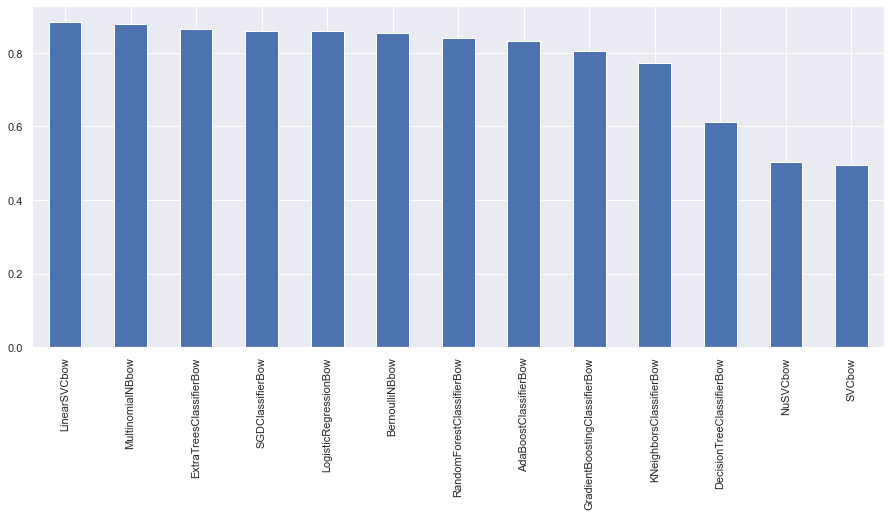

In [240]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df_bow.sort_values(by = "Accuracy", ascending = False).Accuracy.plot(kind = "bar")
plt.savefig('graphs/bow_metrics_by_accuracy.png')

### Summarizing ML models based on their accuracy score with TF-IDF as Feature Extraction

In [241]:
ml_default_performance_metrics_df_tfidf.sort_values(by = "Accuracy", ascending = False)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LinearSVCtfidf,5.79379,0.9033,0.903164,0.903242,0.925853
MultinomialNBtfidf,2.532441,0.8903,0.890377,0.890299,0.920183
LogisticRegressionTfidf,90.783251,0.8852,0.88509,0.885149,0.91311
SGDClassifierTfidf,3.372983,0.8848,0.884667,0.884734,0.912472
ExtraTreesClassifierTfidf,3783.568272,0.8719,0.871821,0.871863,0.903849
BernoulliNBtfidf,3.156091,0.8548,0.855531,0.853693,0.910129
RandomForestClassifierTfidf,1035.98999,0.8533,0.8533,0.853293,0.891227
NuSVCtfidf,2380.969147,0.8495,0.849312,0.849358,0.886304
AdaBoostClassifierTfidf,512.153907,0.8352,0.835071,0.835113,0.87649
GradientBoostingClassifierTfidf,4537.073526,0.8085,0.80821,0.808137,0.85639


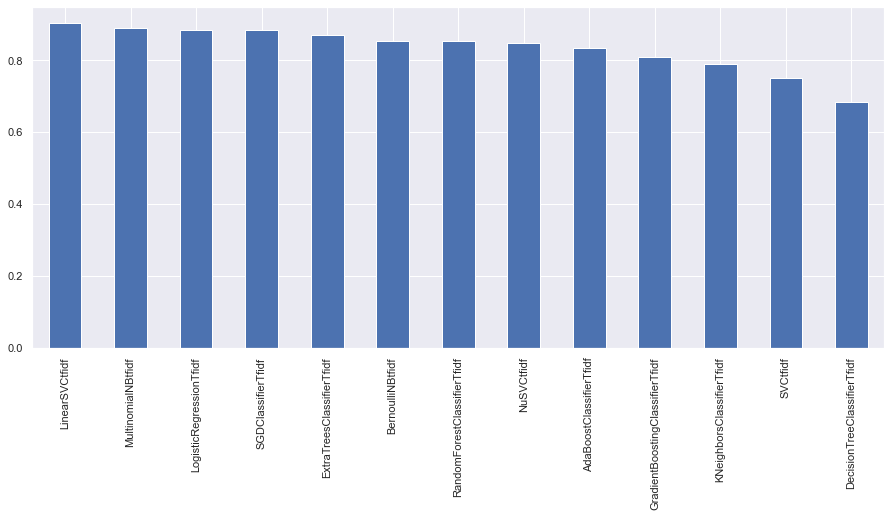

In [242]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df_tfidf.sort_values(by = "Accuracy", ascending = False).Accuracy.plot(kind = "bar")
plt.savefig('graphs/tfidf_metrics_by_accuracy.png')

### Summarizing ML models based on their F1-score

In [243]:
ml_default_performance_metrics_df.sort_values(by = "F1-score", ascending = False)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LinearSVCtfidf,5.79379,0.9033,0.903164,0.903242,0.925853
MultinomialNBtfidf,2.532441,0.8903,0.890377,0.890299,0.920183
LogisticRegressionTfidf,90.783251,0.8852,0.88509,0.885149,0.91311
SGDClassifierTfidf,3.372983,0.8848,0.884667,0.884734,0.912472
LinearSVCbow,36.721645,0.8828,0.88257,0.882645,0.909742
MultinomialNBbow,3.15133,0.8783,0.878552,0.878221,0.914888
ExtraTreesClassifierTfidf,3783.568272,0.8719,0.871821,0.871863,0.903849
ExtraTreesClassifierBow,7614.815355,0.8638,0.863714,0.863757,0.897816
SGDClassifierBow,5.139201,0.8595,0.859665,0.85947,0.898572
LogisticRegressionBow,298.272027,0.8583,0.858298,0.858293,0.894922


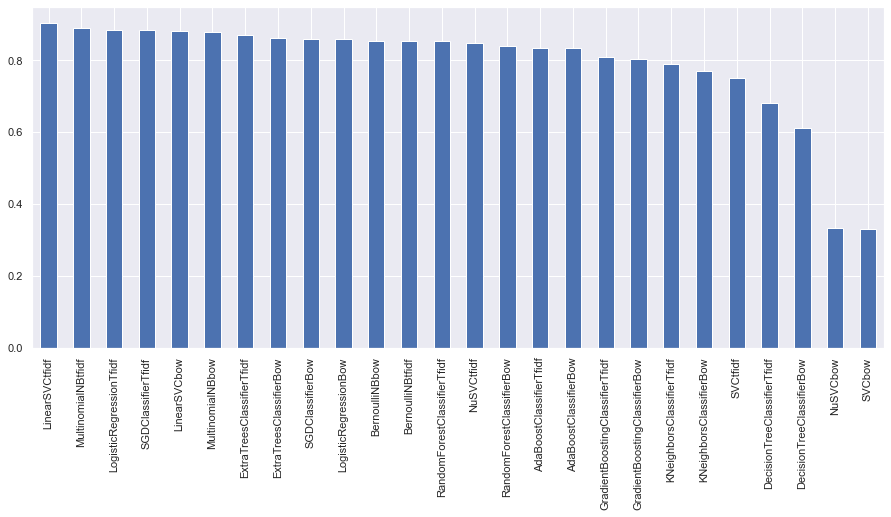

In [246]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df.sort_values(by = "F1-score", ascending = False)["F1-score"].plot(kind = "bar")
plt.savefig('graphs/metrics_by_f1Score.png')

### Summarizing ML models based on their F1-score with Bag of Words as Feature Extraction

In [247]:
ml_default_performance_metrics_df_bow.sort_values(by = "F1-score", ascending = False)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LinearSVCbow,36.721645,0.8828,0.88257,0.882645,0.909742
MultinomialNBbow,3.15133,0.8783,0.878552,0.878221,0.914888
ExtraTreesClassifierBow,7614.815355,0.8638,0.863714,0.863757,0.897816
SGDClassifierBow,5.139201,0.8595,0.859665,0.85947,0.898572
LogisticRegressionBow,298.272027,0.8583,0.858298,0.858293,0.894922
BernoulliNBbow,3.856239,0.8548,0.855531,0.853693,0.910129
RandomForestClassifierBow,2013.443535,0.8413,0.841215,0.841251,0.881356
AdaBoostClassifierBow,975.117593,0.8334,0.833285,0.833325,0.875303
GradientBoostingClassifierBow,6127.361067,0.8057,0.805374,0.805249,0.854323
KNeighborsClassifierBow,66.799335,0.7731,0.772475,0.771405,0.83237


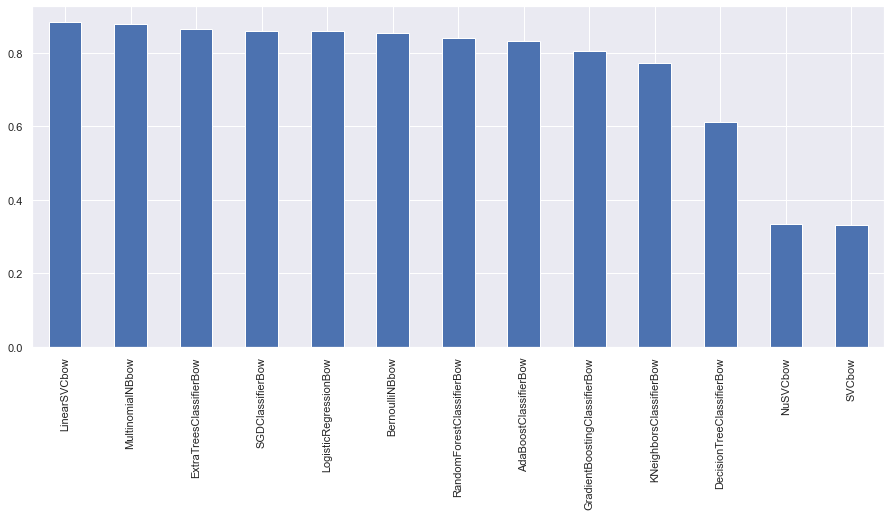

In [248]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df_bow.sort_values(by = "F1-score", ascending = False)["F1-score"].plot(kind = "bar")
plt.savefig('graphs/bow_metrics_by_f1Score.png')

### Summarizing ML models based on their accuracy score with TF-IDF as Feature Extraction

In [249]:
ml_default_performance_metrics_df_tfidf.sort_values(by = "F1-score", ascending = False)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LinearSVCtfidf,5.79379,0.9033,0.903164,0.903242,0.925853
MultinomialNBtfidf,2.532441,0.8903,0.890377,0.890299,0.920183
LogisticRegressionTfidf,90.783251,0.8852,0.88509,0.885149,0.91311
SGDClassifierTfidf,3.372983,0.8848,0.884667,0.884734,0.912472
ExtraTreesClassifierTfidf,3783.568272,0.8719,0.871821,0.871863,0.903849
BernoulliNBtfidf,3.156091,0.8548,0.855531,0.853693,0.910129
RandomForestClassifierTfidf,1035.98999,0.8533,0.8533,0.853293,0.891227
NuSVCtfidf,2380.969147,0.8495,0.849312,0.849358,0.886304
AdaBoostClassifierTfidf,512.153907,0.8352,0.835071,0.835113,0.87649
GradientBoostingClassifierTfidf,4537.073526,0.8085,0.80821,0.808137,0.85639


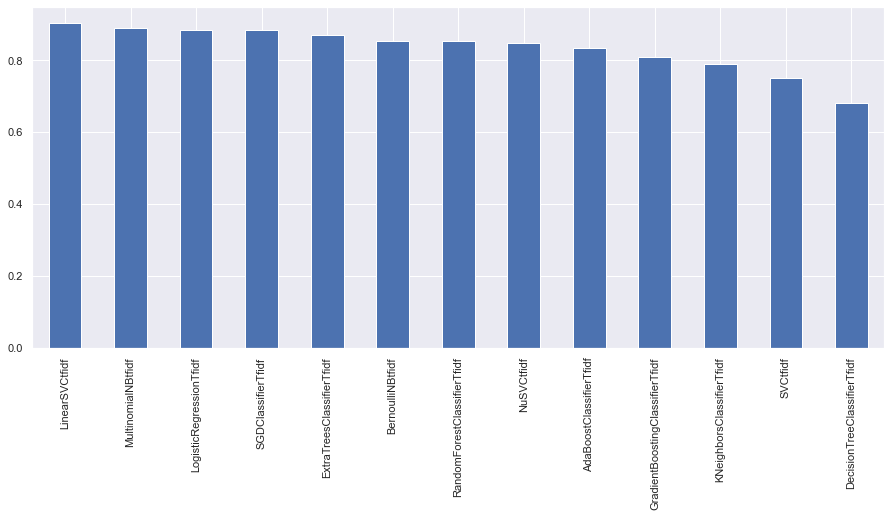

In [250]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df_tfidf.sort_values(by = "F1-score", ascending = False)["F1-score"].plot(kind = "bar")
plt.savefig('graphs/tfidf_metrics_by_f1Score.png')

### Summarizing ML models based on their ROC AUC score

In [251]:
ml_default_performance_metrics_df.sort_values(by = "ROC-AUC-score", ascending = False)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LinearSVCtfidf,5.79379,0.9033,0.903164,0.903242,0.925853
MultinomialNBtfidf,2.532441,0.8903,0.890377,0.890299,0.920183
LogisticRegressionTfidf,90.783251,0.8852,0.88509,0.885149,0.91311
SGDClassifierTfidf,3.372983,0.8848,0.884667,0.884734,0.912472
LinearSVCbow,36.721645,0.8828,0.88257,0.882645,0.909742
MultinomialNBbow,3.15133,0.8783,0.878552,0.878221,0.914888
ExtraTreesClassifierTfidf,3783.568272,0.8719,0.871821,0.871863,0.903849
ExtraTreesClassifierBow,7614.815355,0.8638,0.863714,0.863757,0.897816
SGDClassifierBow,5.139201,0.8595,0.859665,0.85947,0.898572
LogisticRegressionBow,298.272027,0.8583,0.858298,0.858293,0.894922


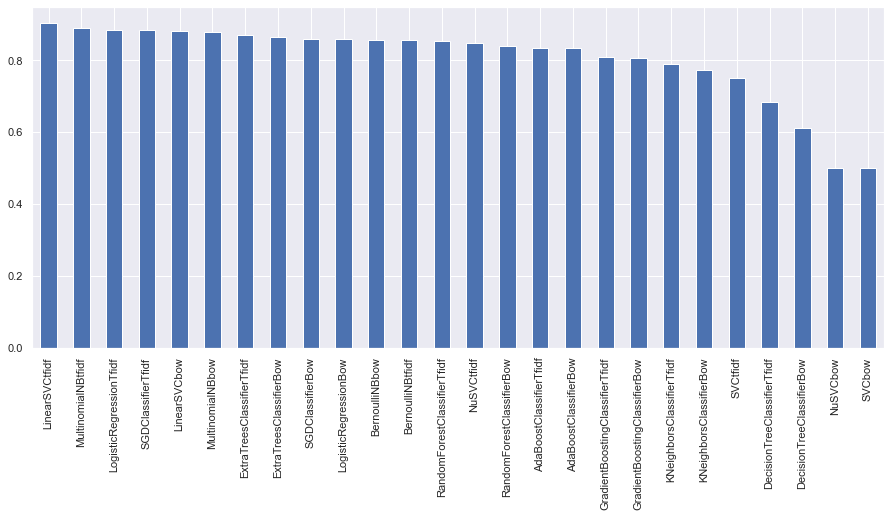

In [252]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df.sort_values(by = "ROC-AUC-score", ascending = False)["ROC-AUC-score"].plot(kind = "bar")
plt.savefig('graphs/metrics_by_roc_auc.png')

### Summarizing ML models based on their ROC AUC score with Bag of Words as Feature Extraction

In [253]:
ml_default_performance_metrics_df_bow.sort_values(by = "ROC-AUC-score", ascending = False)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LinearSVCbow,36.721645,0.8828,0.88257,0.882645,0.909742
MultinomialNBbow,3.15133,0.8783,0.878552,0.878221,0.914888
ExtraTreesClassifierBow,7614.815355,0.8638,0.863714,0.863757,0.897816
SGDClassifierBow,5.139201,0.8595,0.859665,0.85947,0.898572
LogisticRegressionBow,298.272027,0.8583,0.858298,0.858293,0.894922
BernoulliNBbow,3.856239,0.8548,0.855531,0.853693,0.910129
RandomForestClassifierBow,2013.443535,0.8413,0.841215,0.841251,0.881356
AdaBoostClassifierBow,975.117593,0.8334,0.833285,0.833325,0.875303
GradientBoostingClassifierBow,6127.361067,0.8057,0.805374,0.805249,0.854323
KNeighborsClassifierBow,66.799335,0.7731,0.772475,0.771405,0.83237


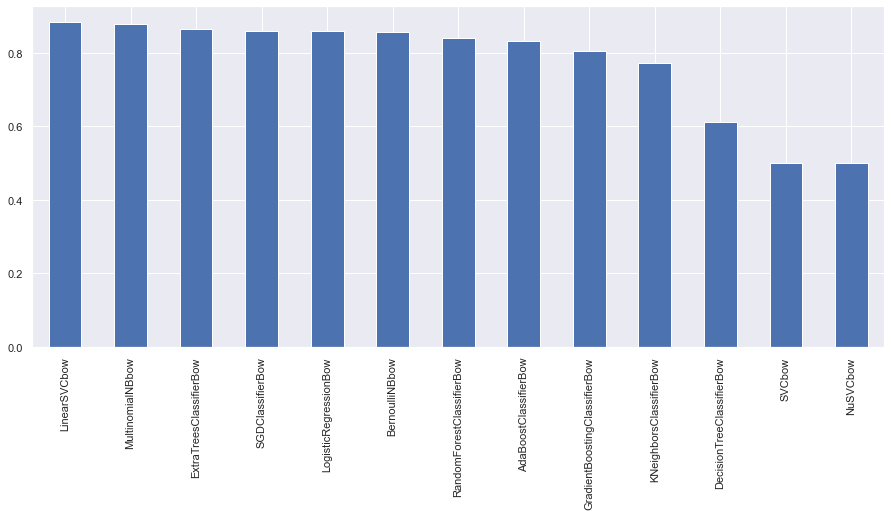

In [254]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df_bow.sort_values(by = "ROC-AUC-score", ascending = False)["ROC-AUC-score"].plot(kind = "bar")
plt.savefig('graphs/bow_metrics_by_roc_auc.png')

### Summarizing ML models based on their ROC AUC score with TF-IDF as Feature Extraction

In [255]:
ml_default_performance_metrics_df_tfidf.sort_values(by = "ROC-AUC-score", ascending = False)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LinearSVCtfidf,5.79379,0.9033,0.903164,0.903242,0.925853
MultinomialNBtfidf,2.532441,0.8903,0.890377,0.890299,0.920183
LogisticRegressionTfidf,90.783251,0.8852,0.88509,0.885149,0.91311
SGDClassifierTfidf,3.372983,0.8848,0.884667,0.884734,0.912472
ExtraTreesClassifierTfidf,3783.568272,0.8719,0.871821,0.871863,0.903849
BernoulliNBtfidf,3.156091,0.8548,0.855531,0.853693,0.910129
RandomForestClassifierTfidf,1035.98999,0.8533,0.8533,0.853293,0.891227
NuSVCtfidf,2380.969147,0.8495,0.849312,0.849358,0.886304
AdaBoostClassifierTfidf,512.153907,0.8352,0.835071,0.835113,0.87649
GradientBoostingClassifierTfidf,4537.073526,0.8085,0.80821,0.808137,0.85639


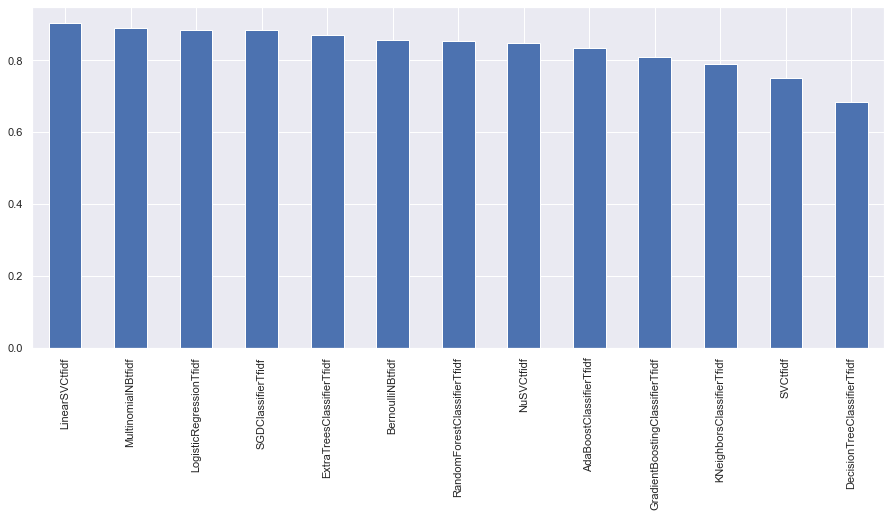

In [256]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df_tfidf.sort_values(by = "ROC-AUC-score", ascending = False)["ROC-AUC-score"].plot(kind = "bar")
plt.savefig('graphs/tfidf_metrics_by_roc_auc.png')

### Summarizing ML models based on their PR AUC score

In [257]:
ml_default_performance_metrics_df.sort_values(by = "PR-AUC-score", ascending = False)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LinearSVCtfidf,5.79379,0.9033,0.903164,0.903242,0.925853
MultinomialNBtfidf,2.532441,0.8903,0.890377,0.890299,0.920183
MultinomialNBbow,3.15133,0.8783,0.878552,0.878221,0.914888
LogisticRegressionTfidf,90.783251,0.8852,0.88509,0.885149,0.91311
SGDClassifierTfidf,3.372983,0.8848,0.884667,0.884734,0.912472
BernoulliNBtfidf,3.156091,0.8548,0.855531,0.853693,0.910129
BernoulliNBbow,3.856239,0.8548,0.855531,0.853693,0.910129
LinearSVCbow,36.721645,0.8828,0.88257,0.882645,0.909742
ExtraTreesClassifierTfidf,3783.568272,0.8719,0.871821,0.871863,0.903849
SGDClassifierBow,5.139201,0.8595,0.859665,0.85947,0.898572


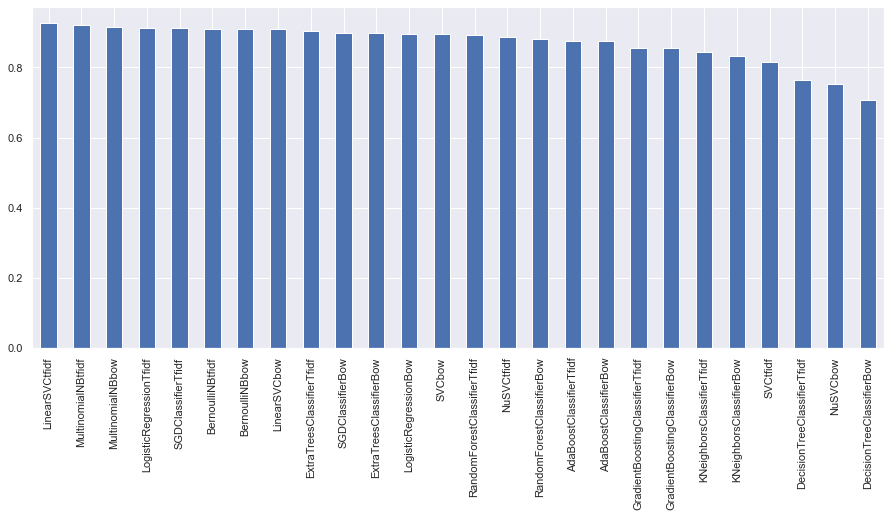

In [258]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df.sort_values(by = "PR-AUC-score", ascending = False)["PR-AUC-score"].plot(kind = "bar")
plt.savefig('graphs/metrics_by_pr_auc.png')

### Summarizing ML models based on their PR AUC score with Bag of Words as Feature Extraction

In [259]:
ml_default_performance_metrics_df_bow.sort_values(by = "PR-AUC-score", ascending = False)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
MultinomialNBbow,3.15133,0.8783,0.878552,0.878221,0.914888
BernoulliNBbow,3.856239,0.8548,0.855531,0.853693,0.910129
LinearSVCbow,36.721645,0.8828,0.88257,0.882645,0.909742
SGDClassifierBow,5.139201,0.8595,0.859665,0.85947,0.898572
ExtraTreesClassifierBow,7614.815355,0.8638,0.863714,0.863757,0.897816
LogisticRegressionBow,298.272027,0.8583,0.858298,0.858293,0.894922
SVCbow,163.760995,0.4961,0.5,0.331595,0.894922
RandomForestClassifierBow,2013.443535,0.8413,0.841215,0.841251,0.881356
AdaBoostClassifierBow,975.117593,0.8334,0.833285,0.833325,0.875303
GradientBoostingClassifierBow,6127.361067,0.8057,0.805374,0.805249,0.854323


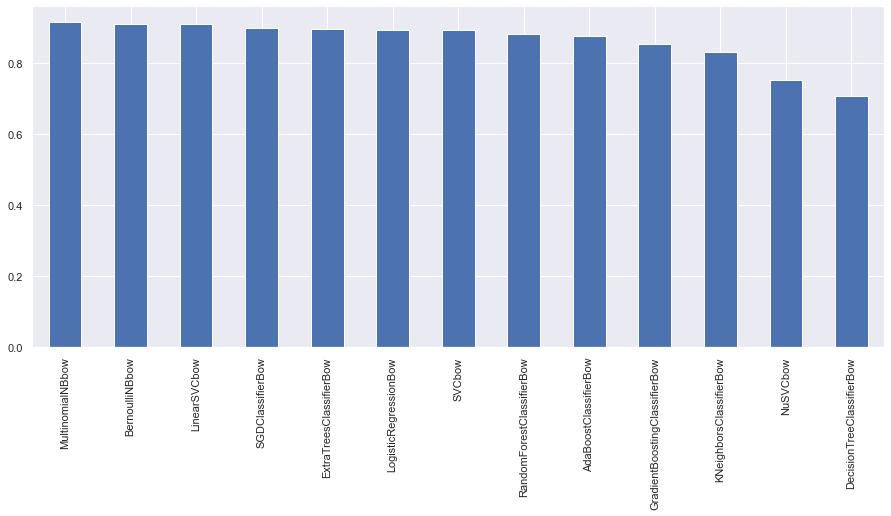

In [260]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df_bow.sort_values(by = "PR-AUC-score", ascending = False)["PR-AUC-score"].plot(kind = "bar")
plt.savefig('graphs/bow_metrics_by_pr_auc.png')

### Summarizing ML models based on their PR AUC score with TF-IDF as Feature Extraction

In [261]:
ml_default_performance_metrics_df_tfidf.sort_values(by = "PR-AUC-score", ascending = False)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
LinearSVCtfidf,5.79379,0.9033,0.903164,0.903242,0.925853
MultinomialNBtfidf,2.532441,0.8903,0.890377,0.890299,0.920183
LogisticRegressionTfidf,90.783251,0.8852,0.88509,0.885149,0.91311
SGDClassifierTfidf,3.372983,0.8848,0.884667,0.884734,0.912472
BernoulliNBtfidf,3.156091,0.8548,0.855531,0.853693,0.910129
ExtraTreesClassifierTfidf,3783.568272,0.8719,0.871821,0.871863,0.903849
RandomForestClassifierTfidf,1035.98999,0.8533,0.8533,0.853293,0.891227
NuSVCtfidf,2380.969147,0.8495,0.849312,0.849358,0.886304
AdaBoostClassifierTfidf,512.153907,0.8352,0.835071,0.835113,0.87649
GradientBoostingClassifierTfidf,4537.073526,0.8085,0.80821,0.808137,0.85639


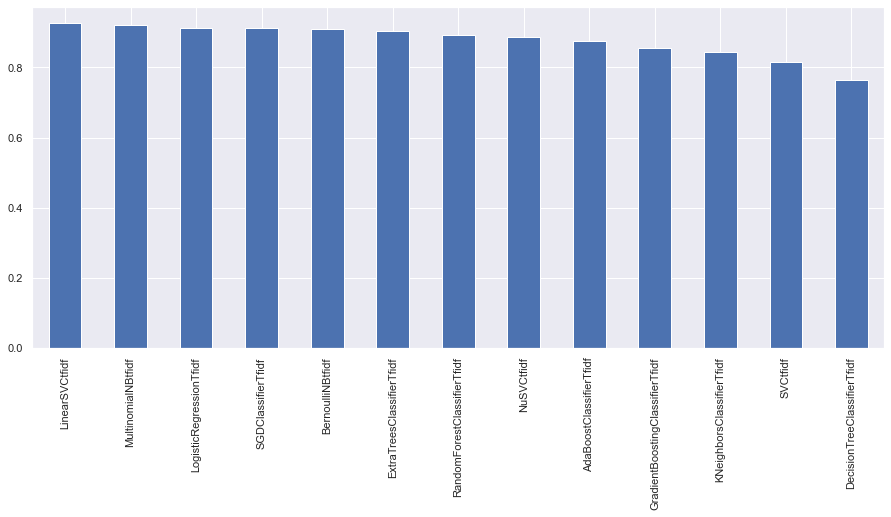

In [262]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df_tfidf.sort_values(by = "PR-AUC-score", ascending = False)["PR-AUC-score"].plot(kind = "bar")
plt.savefig('graphs/tfidf_metrics_by_pr_auc.png')

### Summarizing ML models based on their Training-time

In [263]:
ml_default_performance_metrics_df.sort_values(by = "Training-time", ascending = True)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
MultinomialNBtfidf,2.532441,0.8903,0.890377,0.890299,0.920183
MultinomialNBbow,3.15133,0.8783,0.878552,0.878221,0.914888
BernoulliNBtfidf,3.156091,0.8548,0.855531,0.853693,0.910129
SGDClassifierTfidf,3.372983,0.8848,0.884667,0.884734,0.912472
BernoulliNBbow,3.856239,0.8548,0.855531,0.853693,0.910129
SGDClassifierBow,5.139201,0.8595,0.859665,0.85947,0.898572
LinearSVCtfidf,5.79379,0.9033,0.903164,0.903242,0.925853
LinearSVCbow,36.721645,0.8828,0.88257,0.882645,0.909742
KNeighborsClassifierTfidf,66.758479,0.7907,0.790193,0.789637,0.843913
KNeighborsClassifierBow,66.799335,0.7731,0.772475,0.771405,0.83237


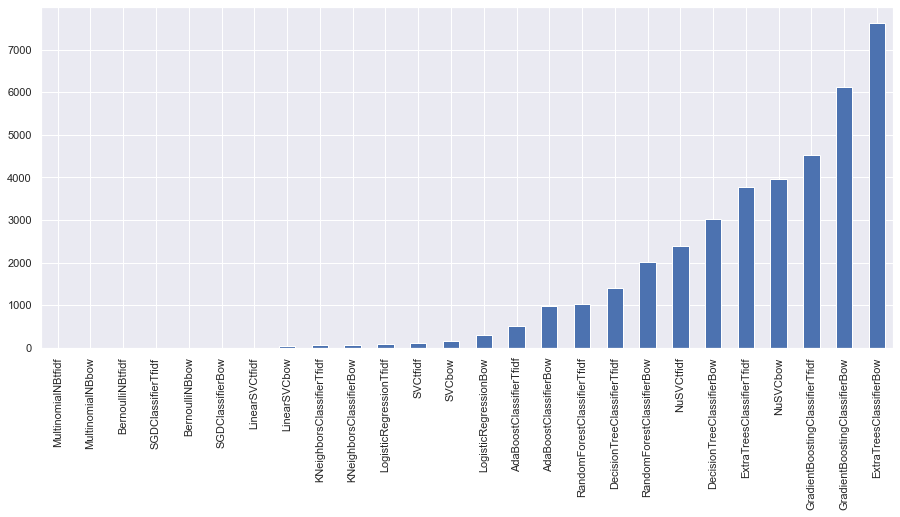

In [265]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df.sort_values(by = "Training-time", ascending = True)["Training-time"].plot(kind = "bar")
plt.savefig('graphs/metrics_by_training_time.png')

### Summarizing ML models based on their Training-time with Bag of Words as Feature Extraction

In [266]:
ml_default_performance_metrics_df_bow.sort_values(by = "Training-time", ascending = True)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
MultinomialNBbow,3.15133,0.8783,0.878552,0.878221,0.914888
BernoulliNBbow,3.856239,0.8548,0.855531,0.853693,0.910129
SGDClassifierBow,5.139201,0.8595,0.859665,0.85947,0.898572
LinearSVCbow,36.721645,0.8828,0.88257,0.882645,0.909742
KNeighborsClassifierBow,66.799335,0.7731,0.772475,0.771405,0.83237
SVCbow,163.760995,0.4961,0.5,0.331595,0.894922
LogisticRegressionBow,298.272027,0.8583,0.858298,0.858293,0.894922
AdaBoostClassifierBow,975.117593,0.8334,0.833285,0.833325,0.875303
RandomForestClassifierBow,2013.443535,0.8413,0.841215,0.841251,0.881356
DecisionTreeClassifierBow,3035.695337,0.6117,0.611964,0.611371,0.70723


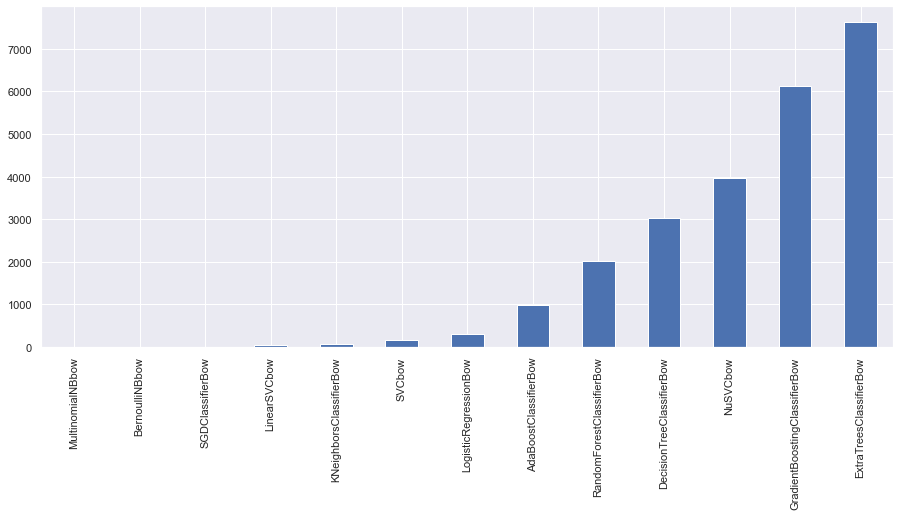

In [269]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df_bow.sort_values(by = "Training-time", ascending = True)["Training-time"].plot(kind = "bar")
plt.savefig('graphs/bow_metrics_by_training_time.png')

### Summarizing ML models based on their Training-time with TF-IDF as Feature Extraction

In [270]:
ml_default_performance_metrics_df_tfidf.sort_values(by = "Training-time", ascending = True)

,Training-time,Accuracy,ROC-AUC-score,F1-score,PR-AUC-score
MultinomialNBtfidf,2.532441,0.8903,0.890377,0.890299,0.920183
BernoulliNBtfidf,3.156091,0.8548,0.855531,0.853693,0.910129
SGDClassifierTfidf,3.372983,0.8848,0.884667,0.884734,0.912472
LinearSVCtfidf,5.79379,0.9033,0.903164,0.903242,0.925853
KNeighborsClassifierTfidf,66.758479,0.7907,0.790193,0.789637,0.843913
LogisticRegressionTfidf,90.783251,0.8852,0.88509,0.885149,0.91311
SVCtfidf,122.15058,0.7522,0.752041,0.75203,0.816121
AdaBoostClassifierTfidf,512.153907,0.8352,0.835071,0.835113,0.87649
RandomForestClassifierTfidf,1035.98999,0.8533,0.8533,0.853293,0.891227
DecisionTreeClassifierTfidf,1411.875999,0.683,0.683196,0.682876,0.763283


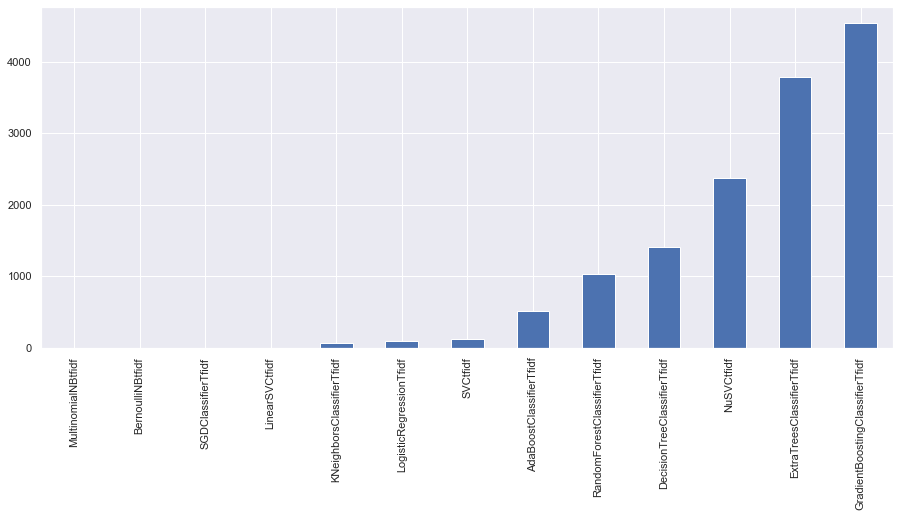

In [272]:
# Plotting above results
sns.set(rc = {'figure.figsize':(15.27, 6.27)})
ml_default_performance_metrics_df_tfidf.sort_values(by = "Training-time", ascending = True)["Training-time"].plot(kind = "bar")
plt.savefig('graphs/tfidf_metrics_by_training_time.png')

## Top ML models with high Accuracy and low Training-time 
1. LinearSVC
2. MultinomialNB
3. LogisticRegression
4. SGDClassifier
5. BernoulliNB